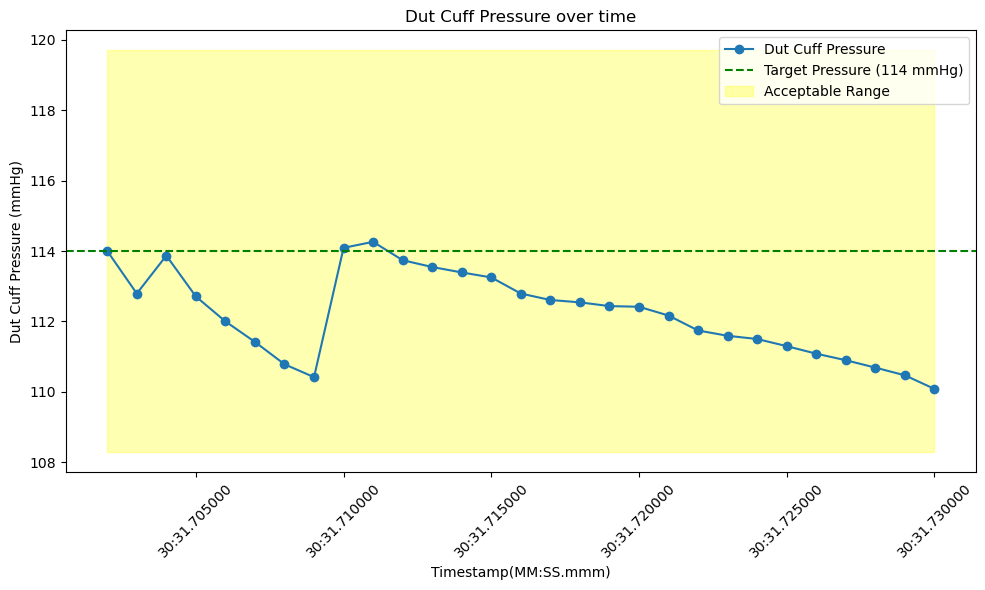

In [62]:
import re
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Simulate reading the log data (you can replace this with actual log file reading)
log_data = """

01:27:34.809	INFO	Host request: Start venous stasis mode (target pressure = 114 mmHg)	
01:27:40.039	INFO	NIBP SPM reached the target pressure	
01:30:31.702	DEBUG	Dut cuff pressure: 117 mmHg	
01:30:31.702	DEBUG	Dut cuff pressure: 117 mmHg	
01:30:31.702	DEBUG	Dut cuff pressure: 115 mmHg	
01:30:31.702	DEBUG	Dut cuff pressure: 115 mmHg	
01:30:31.702	DEBUG	Dut cuff pressure: 114 mmHg	
01:30:31.702	DEBUG	Dut cuff pressure: 114 mmHg	
01:30:31.702	DEBUG	Dut cuff pressure: 113 mmHg	
01:30:31.702	DEBUG	Dut cuff pressure: 114 mmHg	
01:30:31.702	DEBUG	Dut cuff pressure: 113 mmHg	
01:30:31.702	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.702	DEBUG	Dut cuff pressure: 113 mmHg	
01:30:31.702	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.703	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.703	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.703	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.703	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.703	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.703	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.703	DEBUG	Dut cuff pressure: 110 mmHg	
01:30:31.703	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.703	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.703	DEBUG	Dut cuff pressure: 110 mmHg	
01:30:31.703	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.703	DEBUG	Dut cuff pressure: 110 mmHg	
01:30:31.703	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.703	DEBUG	Dut cuff pressure: 110 mmHg	
01:30:31.703	DEBUG	Dut cuff pressure: 115 mmHg	
01:30:31.703	DEBUG	Dut cuff pressure: 117 mmHg	
01:30:31.703	DEBUG	Dut cuff pressure: 115 mmHg	
01:30:31.703	DEBUG	Dut cuff pressure: 116 mmHg	
01:30:31.703	DEBUG	Dut cuff pressure: 116 mmHg	
01:30:31.703	DEBUG	Dut cuff pressure: 115 mmHg	
01:30:31.703	DEBUG	Dut cuff pressure: 116 mmHg	
01:30:31.703	DEBUG	Dut cuff pressure: 115 mmHg	
01:30:31.703	DEBUG	Dut cuff pressure: 114 mmHg	
01:30:31.703	DEBUG	Dut cuff pressure: 115 mmHg	
01:30:31.704	DEBUG	Dut cuff pressure: 114 mmHg	
01:30:31.704	DEBUG	Dut cuff pressure: 115 mmHg	
01:30:31.704	DEBUG	Dut cuff pressure: 114 mmHg	
01:30:31.704	DEBUG	Dut cuff pressure: 114 mmHg	
01:30:31.704	DEBUG	Dut cuff pressure: 115 mmHg	
01:30:31.704	DEBUG	Dut cuff pressure: 114 mmHg	
01:30:31.704	DEBUG	Dut cuff pressure: 115 mmHg	
01:30:31.704	DEBUG	Dut cuff pressure: 114 mmHg	
01:30:31.704	DEBUG	Dut cuff pressure: 114 mmHg	
01:30:31.704	DEBUG	Dut cuff pressure: 114 mmHg	
01:30:31.704	DEBUG	Dut cuff pressure: 113 mmHg	
01:30:31.704	DEBUG	Dut cuff pressure: 115 mmHg	
01:30:31.704	DEBUG	Dut cuff pressure: 113 mmHg	
01:30:31.704	DEBUG	Dut cuff pressure: 114 mmHg	
01:30:31.704	DEBUG	Dut cuff pressure: 114 mmHg	
01:30:31.704	DEBUG	Dut cuff pressure: 113 mmHg	
01:30:31.704	DEBUG	Dut cuff pressure: 114 mmHg	
01:30:31.704	DEBUG	Dut cuff pressure: 113 mmHg	
01:30:31.704	DEBUG	Dut cuff pressure: 114 mmHg	
01:30:31.704	DEBUG	Dut cuff pressure: 113 mmHg	
01:30:31.704	DEBUG	Dut cuff pressure: 114 mmHg	
01:30:31.704	DEBUG	Dut cuff pressure: 113 mmHg	
01:30:31.704	DEBUG	Dut cuff pressure: 113 mmHg	
01:30:31.705	DEBUG	Dut cuff pressure: 113 mmHg	
01:30:31.705	DEBUG	Dut cuff pressure: 114 mmHg	
01:30:31.705	DEBUG	Dut cuff pressure: 113 mmHg	
01:30:31.705	DEBUG	Dut cuff pressure: 114 mmHg	
01:30:31.705	DEBUG	Dut cuff pressure: 113 mmHg	
01:30:31.705	DEBUG	Dut cuff pressure: 113 mmHg	
01:30:31.705	DEBUG	Dut cuff pressure: 113 mmHg	
01:30:31.705	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.705	DEBUG	Dut cuff pressure: 114 mmHg	
01:30:31.705	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.705	DEBUG	Dut cuff pressure: 113 mmHg	
01:30:31.705	DEBUG	Dut cuff pressure: 113 mmHg	
01:30:31.705	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.705	DEBUG	Dut cuff pressure: 113 mmHg	
01:30:31.705	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.705	DEBUG	Dut cuff pressure: 113 mmHg	
01:30:31.705	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.705	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.705	DEBUG	Dut cuff pressure: 113 mmHg	
01:30:31.705	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.705	DEBUG	Dut cuff pressure: 113 mmHg	
01:30:31.705	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.705	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.705	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.706	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.706	DEBUG	Dut cuff pressure: 113 mmHg	
01:30:31.706	DEBUG	Dut cuff pressure: 113 mmHg	
01:30:31.706	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.706	DEBUG	Dut cuff pressure: 113 mmHg	
01:30:31.706	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.706	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.706	DEBUG	Dut cuff pressure: 113 mmHg	
01:30:31.706	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.706	DEBUG	Dut cuff pressure: 113 mmHg	
01:30:31.706	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.706	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.706	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.706	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.706	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.706	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.706	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.706	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.706	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.706	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.706	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.706	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.707	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.707	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.707	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.707	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.707	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.707	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.707	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.707	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.707	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.707	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.707	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.707	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.707	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.707	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.707	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.707	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.707	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.707	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.707	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.707	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.707	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.707	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.707	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.707	DEBUG	Dut cuff pressure: 110 mmHg	
01:30:31.708	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.708	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.708	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.708	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.708	DEBUG	Dut cuff pressure: 110 mmHg	
01:30:31.708	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.708	DEBUG	Dut cuff pressure: 110 mmHg	
01:30:31.708	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.708	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.708	DEBUG	Dut cuff pressure: 110 mmHg	
01:30:31.708	DEBUG	Dut cuff pressure: 110 mmHg	
01:30:31.708	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.708	DEBUG	Dut cuff pressure: 110 mmHg	
01:30:31.708	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.708	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.708	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.708	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.708	DEBUG	Dut cuff pressure: 110 mmHg	
01:30:31.708	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.708	DEBUG	Dut cuff pressure: 110 mmHg	
01:30:31.708	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.708	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.708	DEBUG	Dut cuff pressure: 110 mmHg	
01:30:31.709	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.709	DEBUG	Dut cuff pressure: 110 mmHg	
01:30:31.709	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.709	DEBUG	Dut cuff pressure: 110 mmHg	
01:30:31.709	DEBUG	Dut cuff pressure: 110 mmHg	
01:30:31.709	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.709	DEBUG	Dut cuff pressure: 110 mmHg	
01:30:31.709	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.709	DEBUG	Dut cuff pressure: 110 mmHg	
01:30:31.709	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.709	DEBUG	Dut cuff pressure: 110 mmHg	
01:30:31.709	DEBUG	Dut cuff pressure: 110 mmHg	
01:30:31.709	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.709	DEBUG	Dut cuff pressure: 110 mmHg	
01:30:31.709	DEBUG	Dut cuff pressure: 110 mmHg	
01:30:31.709	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.709	DEBUG	Dut cuff pressure: 110 mmHg	
01:30:31.709	DEBUG	Dut cuff pressure: 110 mmHg	
01:30:31.709	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.709	DEBUG	Dut cuff pressure: 110 mmHg	
01:30:31.709	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.709	DEBUG	Dut cuff pressure: 110 mmHg	
01:30:31.709	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.709	DEBUG	Dut cuff pressure: 110 mmHg	
01:30:31.710	DEBUG	Dut cuff pressure: 110 mmHg	
01:30:31.710	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.710	DEBUG	Dut cuff pressure: 110 mmHg	
01:30:31.710	DEBUG	Dut cuff pressure: 117 mmHg	
01:30:31.710	DEBUG	Dut cuff pressure: 115 mmHg	
01:30:31.710	DEBUG	Dut cuff pressure: 115 mmHg	
01:30:31.710	DEBUG	Dut cuff pressure: 115 mmHg	
01:30:31.710	DEBUG	Dut cuff pressure: 114 mmHg	
01:30:31.710	DEBUG	Dut cuff pressure: 115 mmHg	
01:30:31.710	DEBUG	Dut cuff pressure: 114 mmHg	
01:30:31.710	DEBUG	Dut cuff pressure: 115 mmHg	
01:30:31.710	DEBUG	Dut cuff pressure: 115 mmHg	
01:30:31.710	DEBUG	Dut cuff pressure: 114 mmHg	
01:30:31.710	DEBUG	Dut cuff pressure: 115 mmHg	
01:30:31.710	DEBUG	Dut cuff pressure: 114 mmHg	
01:30:31.710	DEBUG	Dut cuff pressure: 115 mmHg	
01:30:31.710	DEBUG	Dut cuff pressure: 114 mmHg	
01:30:31.710	DEBUG	Dut cuff pressure: 114 mmHg	
01:30:31.710	DEBUG	Dut cuff pressure: 114 mmHg	
01:30:31.710	DEBUG	Dut cuff pressure: 115 mmHg	
01:30:31.710	DEBUG	Dut cuff pressure: 114 mmHg	
01:30:31.710	DEBUG	Dut cuff pressure: 115 mmHg	
01:30:31.711	DEBUG	Dut cuff pressure: 114 mmHg	
01:30:31.711	DEBUG	Dut cuff pressure: 115 mmHg	
01:30:31.711	DEBUG	Dut cuff pressure: 114 mmHg	
01:30:31.711	DEBUG	Dut cuff pressure: 114 mmHg	
01:30:31.711	DEBUG	Dut cuff pressure: 115 mmHg	
01:30:31.711	DEBUG	Dut cuff pressure: 114 mmHg	
01:30:31.711	DEBUG	Dut cuff pressure: 115 mmHg	
01:30:31.711	DEBUG	Dut cuff pressure: 114 mmHg	
01:30:31.711	DEBUG	Dut cuff pressure: 114 mmHg	
01:30:31.711	DEBUG	Dut cuff pressure: 115 mmHg	
01:30:31.711	DEBUG	Dut cuff pressure: 114 mmHg	
01:30:31.711	DEBUG	Dut cuff pressure: 115 mmHg	
01:30:31.711	DEBUG	Dut cuff pressure: 114 mmHg	
01:30:31.711	DEBUG	Dut cuff pressure: 114 mmHg	
01:30:31.711	DEBUG	Dut cuff pressure: 114 mmHg	
01:30:31.711	DEBUG	Dut cuff pressure: 114 mmHg	
01:30:31.711	DEBUG	Dut cuff pressure: 115 mmHg	
01:30:31.711	DEBUG	Dut cuff pressure: 113 mmHg	
01:30:31.711	DEBUG	Dut cuff pressure: 115 mmHg	
01:30:31.711	DEBUG	Dut cuff pressure: 114 mmHg	
01:30:31.711	DEBUG	Dut cuff pressure: 114 mmHg	
01:30:31.711	DEBUG	Dut cuff pressure: 114 mmHg	
01:30:31.711	DEBUG	Dut cuff pressure: 114 mmHg	
01:30:31.712	DEBUG	Dut cuff pressure: 113 mmHg	
01:30:31.712	DEBUG	Dut cuff pressure: 115 mmHg	
01:30:31.712	DEBUG	Dut cuff pressure: 114 mmHg	
01:30:31.712	DEBUG	Dut cuff pressure: 114 mmHg	
01:30:31.712	DEBUG	Dut cuff pressure: 114 mmHg	
01:30:31.712	DEBUG	Dut cuff pressure: 113 mmHg	
01:30:31.712	DEBUG	Dut cuff pressure: 115 mmHg	
01:30:31.712	DEBUG	Dut cuff pressure: 113 mmHg	
01:30:31.712	DEBUG	Dut cuff pressure: 114 mmHg	
01:30:31.712	DEBUG	Dut cuff pressure: 114 mmHg	
01:30:31.712	DEBUG	Dut cuff pressure: 114 mmHg	
01:30:31.712	DEBUG	Dut cuff pressure: 114 mmHg	
01:30:31.712	DEBUG	Dut cuff pressure: 113 mmHg	
01:30:31.712	DEBUG	Dut cuff pressure: 114 mmHg	
01:30:31.712	DEBUG	Dut cuff pressure: 113 mmHg	
01:30:31.712	DEBUG	Dut cuff pressure: 114 mmHg	
01:30:31.712	DEBUG	Dut cuff pressure: 114 mmHg	
01:30:31.712	DEBUG	Dut cuff pressure: 113 mmHg	
01:30:31.712	DEBUG	Dut cuff pressure: 114 mmHg	
01:30:31.712	DEBUG	Dut cuff pressure: 113 mmHg	
01:30:31.712	DEBUG	Dut cuff pressure: 114 mmHg	
01:30:31.712	DEBUG	Dut cuff pressure: 114 mmHg	
01:30:31.712	DEBUG	Dut cuff pressure: 113 mmHg	
01:30:31.713	DEBUG	Dut cuff pressure: 114 mmHg	
01:30:31.713	DEBUG	Dut cuff pressure: 113 mmHg	
01:30:31.713	DEBUG	Dut cuff pressure: 114 mmHg	
01:30:31.713	DEBUG	Dut cuff pressure: 114 mmHg	
01:30:31.713	DEBUG	Dut cuff pressure: 113 mmHg	
01:30:31.713	DEBUG	Dut cuff pressure: 114 mmHg	
01:30:31.713	DEBUG	Dut cuff pressure: 114 mmHg	
01:30:31.713	DEBUG	Dut cuff pressure: 113 mmHg	
01:30:31.713	DEBUG	Dut cuff pressure: 114 mmHg	
01:30:31.713	DEBUG	Dut cuff pressure: 113 mmHg	
01:30:31.713	DEBUG	Dut cuff pressure: 114 mmHg	
01:30:31.713	DEBUG	Dut cuff pressure: 114 mmHg	
01:30:31.713	DEBUG	Dut cuff pressure: 113 mmHg	
01:30:31.713	DEBUG	Dut cuff pressure: 114 mmHg	
01:30:31.713	DEBUG	Dut cuff pressure: 113 mmHg	
01:30:31.713	DEBUG	Dut cuff pressure: 114 mmHg	
01:30:31.713	DEBUG	Dut cuff pressure: 113 mmHg	
01:30:31.713	DEBUG	Dut cuff pressure: 113 mmHg	
01:30:31.713	DEBUG	Dut cuff pressure: 114 mmHg	
01:30:31.713	DEBUG	Dut cuff pressure: 113 mmHg	
01:30:31.713	DEBUG	Dut cuff pressure: 114 mmHg	
01:30:31.713	DEBUG	Dut cuff pressure: 113 mmHg	
01:30:31.714	DEBUG	Dut cuff pressure: 114 mmHg	
01:30:31.714	DEBUG	Dut cuff pressure: 113 mmHg	
01:30:31.714	DEBUG	Dut cuff pressure: 113 mmHg	
01:30:31.714	DEBUG	Dut cuff pressure: 114 mmHg	
01:30:31.714	DEBUG	Dut cuff pressure: 113 mmHg	
01:30:31.714	DEBUG	Dut cuff pressure: 114 mmHg	
01:30:31.714	DEBUG	Dut cuff pressure: 113 mmHg	
01:30:31.714	DEBUG	Dut cuff pressure: 113 mmHg	
01:30:31.714	DEBUG	Dut cuff pressure: 113 mmHg	
01:30:31.714	DEBUG	Dut cuff pressure: 114 mmHg	
01:30:31.714	DEBUG	Dut cuff pressure: 113 mmHg	
01:30:31.714	DEBUG	Dut cuff pressure: 114 mmHg	
01:30:31.714	DEBUG	Dut cuff pressure: 113 mmHg	
01:30:31.714	DEBUG	Dut cuff pressure: 114 mmHg	
01:30:31.714	DEBUG	Dut cuff pressure: 113 mmHg	
01:30:31.714	DEBUG	Dut cuff pressure: 113 mmHg	
01:30:31.714	DEBUG	Dut cuff pressure: 114 mmHg	
01:30:31.714	DEBUG	Dut cuff pressure: 113 mmHg	
01:30:31.714	DEBUG	Dut cuff pressure: 114 mmHg	
01:30:31.714	DEBUG	Dut cuff pressure: 113 mmHg	
01:30:31.714	DEBUG	Dut cuff pressure: 113 mmHg	
01:30:31.714	DEBUG	Dut cuff pressure: 114 mmHg	
01:30:31.714	DEBUG	Dut cuff pressure: 113 mmHg	
01:30:31.715	DEBUG	Dut cuff pressure: 114 mmHg	
01:30:31.715	DEBUG	Dut cuff pressure: 113 mmHg	
01:30:31.715	DEBUG	Dut cuff pressure: 114 mmHg	
01:30:31.715	DEBUG	Dut cuff pressure: 113 mmHg	
01:30:31.715	DEBUG	Dut cuff pressure: 113 mmHg	
01:30:31.715	DEBUG	Dut cuff pressure: 114 mmHg	
01:30:31.715	DEBUG	Dut cuff pressure: 113 mmHg	
01:30:31.715	DEBUG	Dut cuff pressure: 114 mmHg	
01:30:31.715	DEBUG	Dut cuff pressure: 113 mmHg	
01:30:31.715	DEBUG	Dut cuff pressure: 113 mmHg	
01:30:31.715	DEBUG	Dut cuff pressure: 113 mmHg	
01:30:31.715	DEBUG	Dut cuff pressure: 113 mmHg	
01:30:31.715	DEBUG	Dut cuff pressure: 113 mmHg	
01:30:31.715	DEBUG	Dut cuff pressure: 114 mmHg	
01:30:31.715	DEBUG	Dut cuff pressure: 113 mmHg	
01:30:31.715	DEBUG	Dut cuff pressure: 113 mmHg	
01:30:31.715	DEBUG	Dut cuff pressure: 113 mmHg	
01:30:31.715	DEBUG	Dut cuff pressure: 113 mmHg	
01:30:31.715	DEBUG	Dut cuff pressure: 114 mmHg	
01:30:31.715	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.715	DEBUG	Dut cuff pressure: 114 mmHg	
01:30:31.715	DEBUG	Dut cuff pressure: 113 mmHg	
01:30:31.715	DEBUG	Dut cuff pressure: 113 mmHg	
01:30:31.715	DEBUG	Dut cuff pressure: 113 mmHg	
01:30:31.716	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.716	DEBUG	Dut cuff pressure: 114 mmHg	
01:30:31.716	DEBUG	Dut cuff pressure: 113 mmHg	
01:30:31.716	DEBUG	Dut cuff pressure: 113 mmHg	
01:30:31.716	DEBUG	Dut cuff pressure: 113 mmHg	
01:30:31.716	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.716	DEBUG	Dut cuff pressure: 114 mmHg	
01:30:31.716	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.716	DEBUG	Dut cuff pressure: 114 mmHg	
01:30:31.716	DEBUG	Dut cuff pressure: 113 mmHg	
01:30:31.716	DEBUG	Dut cuff pressure: 113 mmHg	
01:30:31.716	DEBUG	Dut cuff pressure: 113 mmHg	
01:30:31.716	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.716	DEBUG	Dut cuff pressure: 113 mmHg	
01:30:31.716	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.716	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.716	DEBUG	Dut cuff pressure: 113 mmHg	
01:30:31.716	DEBUG	Dut cuff pressure: 113 mmHg	
01:30:31.716	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.716	DEBUG	Dut cuff pressure: 113 mmHg	
01:30:31.716	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.716	DEBUG	Dut cuff pressure: 113 mmHg	
01:30:31.716	DEBUG	Dut cuff pressure: 113 mmHg	
01:30:31.716	DEBUG	Dut cuff pressure: 113 mmHg	
01:30:31.717	DEBUG	Dut cuff pressure: 113 mmHg	
01:30:31.717	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.717	DEBUG	Dut cuff pressure: 113 mmHg	
01:30:31.717	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.717	DEBUG	Dut cuff pressure: 113 mmHg	
01:30:31.717	DEBUG	Dut cuff pressure: 113 mmHg	
01:30:31.717	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.717	DEBUG	Dut cuff pressure: 113 mmHg	
01:30:31.717	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.717	DEBUG	Dut cuff pressure: 113 mmHg	
01:30:31.717	DEBUG	Dut cuff pressure: 113 mmHg	
01:30:31.717	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.717	DEBUG	Dut cuff pressure: 113 mmHg	
01:30:31.717	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.717	DEBUG	Dut cuff pressure: 113 mmHg	
01:30:31.717	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.717	DEBUG	Dut cuff pressure: 113 mmHg	
01:30:31.717	DEBUG	Dut cuff pressure: 113 mmHg	
01:30:31.717	DEBUG	Dut cuff pressure: 113 mmHg	
01:30:31.717	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.717	DEBUG	Dut cuff pressure: 113 mmHg	
01:30:31.717	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.717	DEBUG	Dut cuff pressure: 113 mmHg	
01:30:31.718	DEBUG	Dut cuff pressure: 113 mmHg	
01:30:31.718	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.718	DEBUG	Dut cuff pressure: 113 mmHg	
01:30:31.718	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.718	DEBUG	Dut cuff pressure: 113 mmHg	
01:30:31.718	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.718	DEBUG	Dut cuff pressure: 113 mmHg	
01:30:31.718	DEBUG	Dut cuff pressure: 113 mmHg	
01:30:31.718	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.718	DEBUG	Dut cuff pressure: 113 mmHg	
01:30:31.718	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.718	DEBUG	Dut cuff pressure: 113 mmHg	
01:30:31.718	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.718	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.718	DEBUG	Dut cuff pressure: 113 mmHg	
01:30:31.718	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.718	DEBUG	Dut cuff pressure: 113 mmHg	
01:30:31.718	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.718	DEBUG	Dut cuff pressure: 113 mmHg	
01:30:31.718	DEBUG	Dut cuff pressure: 113 mmHg	
01:30:31.718	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.718	DEBUG	Dut cuff pressure: 113 mmHg	
01:30:31.718	DEBUG	Dut cuff pressure: 113 mmHg	
01:30:31.718	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.719	DEBUG	Dut cuff pressure: 113 mmHg	
01:30:31.719	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.719	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.719	DEBUG	Dut cuff pressure: 113 mmHg	
01:30:31.719	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.719	DEBUG	Dut cuff pressure: 113 mmHg	
01:30:31.719	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.719	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.719	DEBUG	Dut cuff pressure: 113 mmHg	
01:30:31.719	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.719	DEBUG	Dut cuff pressure: 113 mmHg	
01:30:31.719	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.719	DEBUG	Dut cuff pressure: 113 mmHg	
01:30:31.719	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.719	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.719	DEBUG	Dut cuff pressure: 113 mmHg	
01:30:31.719	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.719	DEBUG	Dut cuff pressure: 113 mmHg	
01:30:31.719	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.719	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.719	DEBUG	Dut cuff pressure: 113 mmHg	
01:30:31.719	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.719	DEBUG	Dut cuff pressure: 113 mmHg	
01:30:31.720	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.720	DEBUG	Dut cuff pressure: 113 mmHg	
01:30:31.720	DEBUG	Dut cuff pressure: 113 mmHg	
01:30:31.720	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.720	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.720	DEBUG	Dut cuff pressure: 113 mmHg	
01:30:31.720	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.720	DEBUG	Dut cuff pressure: 113 mmHg	
01:30:31.720	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.720	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.720	DEBUG	Dut cuff pressure: 113 mmHg	
01:30:31.720	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.720	DEBUG	Dut cuff pressure: 113 mmHg	
01:30:31.720	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.720	DEBUG	Dut cuff pressure: 113 mmHg	
01:30:31.720	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.720	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.720	DEBUG	Dut cuff pressure: 113 mmHg	
01:30:31.720	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.720	DEBUG	Dut cuff pressure: 113 mmHg	
01:30:31.720	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.720	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.720	DEBUG	Dut cuff pressure: 113 mmHg	
01:30:31.720	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.721	DEBUG	Dut cuff pressure: 113 mmHg	
01:30:31.721	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.721	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.721	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.721	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.721	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.721	DEBUG	Dut cuff pressure: 113 mmHg	
01:30:31.721	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.721	DEBUG	Dut cuff pressure: 113 mmHg	
01:30:31.721	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.721	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.721	DEBUG	Dut cuff pressure: 113 mmHg	
01:30:31.721	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.721	DEBUG	Dut cuff pressure: 113 mmHg	
01:30:31.721	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.721	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.721	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.721	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.721	DEBUG	Dut cuff pressure: 113 mmHg	
01:30:31.721	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.721	DEBUG	Dut cuff pressure: 113 mmHg	
01:30:31.721	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.721	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.721	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.722	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.722	DEBUG	Dut cuff pressure: 113 mmHg	
01:30:31.722	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.722	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.722	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.722	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.722	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.722	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.722	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.722	DEBUG	Dut cuff pressure: 113 mmHg	
01:30:31.722	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.722	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.722	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.722	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.722	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.722	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.722	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.722	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.722	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.722	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.722	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.722	DEBUG	Dut cuff pressure: 113 mmHg	
01:30:31.722	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.722	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.722	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.722	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.722	DEBUG	Dut cuff pressure: 113 mmHg	
01:30:31.722	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.722	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.722	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.722	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.722	DEBUG	Dut cuff pressure: 113 mmHg	
01:30:31.722	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.722	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.722	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.723	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.723	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.723	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.723	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.723	DEBUG	Dut cuff pressure: 113 mmHg	
01:30:31.723	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.723	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.723	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.723	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.723	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.723	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.723	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.723	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.723	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.723	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.723	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.723	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.723	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.723	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.723	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.723	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.723	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.723	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.723	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.723	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.723	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.723	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.723	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.723	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.723	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.723	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.723	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.723	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.723	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.723	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.723	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.723	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.723	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.723	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.723	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.723	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.723	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.723	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.723	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.723	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.723	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.723	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.723	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.723	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.724	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.724	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.724	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.724	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.724	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.724	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.724	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.724	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.724	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.724	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.724	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.724	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.724	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.724	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.724	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.724	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.724	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.724	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.724	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.724	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.724	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.724	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.724	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.724	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.724	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.724	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.724	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.724	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.724	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.724	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.724	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.724	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.724	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.724	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.724	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.724	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.724	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.724	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.724	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.724	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.724	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.724	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.724	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.724	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.724	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.724	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.724	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.724	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.725	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.725	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.725	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.725	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.725	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.725	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.725	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.725	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.725	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.725	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.725	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.725	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.725	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.725	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.725	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.725	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.725	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.725	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.725	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.725	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.725	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.725	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.725	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.725	DEBUG	Dut cuff pressure: 110 mmHg	
01:30:31.725	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.725	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.725	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.725	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.725	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.725	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.725	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.725	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.725	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.725	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.725	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.725	DEBUG	Dut cuff pressure: 110 mmHg	
01:30:31.725	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.725	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.725	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.725	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.725	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.725	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.725	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.725	DEBUG	Dut cuff pressure: 110 mmHg	
01:30:31.725	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.725	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.725	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.726	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.726	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.726	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.726	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.726	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.726	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.726	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.726	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.726	DEBUG	Dut cuff pressure: 110 mmHg	
01:30:31.726	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.726	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.726	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.726	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.726	DEBUG	Dut cuff pressure: 110 mmHg	
01:30:31.726	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.726	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.726	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.726	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.726	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.726	DEBUG	Dut cuff pressure: 110 mmHg	
01:30:31.726	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.726	DEBUG	Dut cuff pressure: 110 mmHg	
01:30:31.726	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.726	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.726	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.726	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.726	DEBUG	Dut cuff pressure: 110 mmHg	
01:30:31.726	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.726	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.726	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.726	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.726	DEBUG	Dut cuff pressure: 110 mmHg	
01:30:31.726	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.726	DEBUG	Dut cuff pressure: 110 mmHg	
01:30:31.726	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.726	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.726	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.726	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.726	DEBUG	Dut cuff pressure: 110 mmHg	
01:30:31.726	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.726	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.726	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.726	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.726	DEBUG	Dut cuff pressure: 110 mmHg	
01:30:31.726	DEBUG	Dut cuff pressure: 110 mmHg	
01:30:31.726	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.726	DEBUG	Dut cuff pressure: 110 mmHg	
01:30:31.726	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.727	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.727	DEBUG	Dut cuff pressure: 110 mmHg	
01:30:31.727	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.727	DEBUG	Dut cuff pressure: 110 mmHg	
01:30:31.727	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.727	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.727	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.727	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.727	DEBUG	Dut cuff pressure: 110 mmHg	
01:30:31.727	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.727	DEBUG	Dut cuff pressure: 110 mmHg	
01:30:31.727	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.727	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.727	DEBUG	Dut cuff pressure: 110 mmHg	
01:30:31.727	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.727	DEBUG	Dut cuff pressure: 110 mmHg	
01:30:31.727	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.727	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.727	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.727	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.727	DEBUG	Dut cuff pressure: 110 mmHg	
01:30:31.727	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.727	DEBUG	Dut cuff pressure: 110 mmHg	
01:30:31.727	DEBUG	Dut cuff pressure: 110 mmHg	
01:30:31.727	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.727	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.727	DEBUG	Dut cuff pressure: 110 mmHg	
01:30:31.727	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.727	DEBUG	Dut cuff pressure: 110 mmHg	
01:30:31.727	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.727	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.727	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.727	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.727	DEBUG	Dut cuff pressure: 110 mmHg	
01:30:31.727	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.727	DEBUG	Dut cuff pressure: 110 mmHg	
01:30:31.727	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.727	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.727	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.727	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.727	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.727	DEBUG	Dut cuff pressure: 110 mmHg	
01:30:31.727	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.727	DEBUG	Dut cuff pressure: 110 mmHg	
01:30:31.727	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.727	DEBUG	Dut cuff pressure: 110 mmHg	
01:30:31.727	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.727	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.727	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.728	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.728	DEBUG	Dut cuff pressure: 110 mmHg	
01:30:31.728	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.728	DEBUG	Dut cuff pressure: 110 mmHg	
01:30:31.728	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.728	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.728	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.728	DEBUG	Dut cuff pressure: 110 mmHg	
01:30:31.728	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.728	DEBUG	Dut cuff pressure: 110 mmHg	
01:30:31.728	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.728	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.728	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.728	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.728	DEBUG	Dut cuff pressure: 110 mmHg	
01:30:31.728	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.728	DEBUG	Dut cuff pressure: 110 mmHg	
01:30:31.728	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.728	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.728	DEBUG	Dut cuff pressure: 110 mmHg	
01:30:31.728	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.728	DEBUG	Dut cuff pressure: 110 mmHg	
01:30:31.728	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.728	DEBUG	Dut cuff pressure: 110 mmHg	
01:30:31.728	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.728	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.728	DEBUG	Dut cuff pressure: 110 mmHg	
01:30:31.728	DEBUG	Dut cuff pressure: 112 mmHg	
01:30:31.728	DEBUG	Dut cuff pressure: 110 mmHg	
01:30:31.728	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.728	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.728	DEBUG	Dut cuff pressure: 110 mmHg	
01:30:31.728	DEBUG	Dut cuff pressure: 110 mmHg	
01:30:31.728	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.728	DEBUG	Dut cuff pressure: 110 mmHg	
01:30:31.728	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.728	DEBUG	Dut cuff pressure: 110 mmHg	
01:30:31.728	DEBUG	Dut cuff pressure: 110 mmHg	
01:30:31.728	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.728	DEBUG	Dut cuff pressure: 110 mmHg	
01:30:31.728	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.728	DEBUG	Dut cuff pressure: 110 mmHg	
01:30:31.728	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.728	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.728	DEBUG	Dut cuff pressure: 110 mmHg	
01:30:31.728	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.728	DEBUG	Dut cuff pressure: 110 mmHg	
01:30:31.728	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.729	DEBUG	Dut cuff pressure: 110 mmHg	
01:30:31.729	DEBUG	Dut cuff pressure: 110 mmHg	
01:30:31.729	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.729	DEBUG	Dut cuff pressure: 110 mmHg	
01:30:31.729	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.729	DEBUG	Dut cuff pressure: 110 mmHg	
01:30:31.729	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.729	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.729	DEBUG	Dut cuff pressure: 110 mmHg	
01:30:31.729	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.729	DEBUG	Dut cuff pressure: 110 mmHg	
01:30:31.729	DEBUG	Dut cuff pressure: 110 mmHg	
01:30:31.729	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.729	DEBUG	Dut cuff pressure: 110 mmHg	
01:30:31.729	DEBUG	Dut cuff pressure: 110 mmHg	
01:30:31.729	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.729	DEBUG	Dut cuff pressure: 110 mmHg	
01:30:31.729	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.729	DEBUG	Dut cuff pressure: 110 mmHg	
01:30:31.729	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.729	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.729	DEBUG	Dut cuff pressure: 110 mmHg	
01:30:31.729	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.729	DEBUG	Dut cuff pressure: 110 mmHg	
01:30:31.729	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.729	DEBUG	Dut cuff pressure: 110 mmHg	
01:30:31.729	DEBUG	Dut cuff pressure: 110 mmHg	
01:30:31.729	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.729	DEBUG	Dut cuff pressure: 110 mmHg	
01:30:31.729	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.729	DEBUG	Dut cuff pressure: 110 mmHg	
01:30:31.729	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.729	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.729	DEBUG	Dut cuff pressure: 110 mmHg	
01:30:31.729	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.729	DEBUG	Dut cuff pressure: 110 mmHg	
01:30:31.729	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.729	DEBUG	Dut cuff pressure: 110 mmHg	
01:30:31.729	DEBUG	Dut cuff pressure: 110 mmHg	
01:30:31.729	DEBUG	Dut cuff pressure: 110 mmHg	
01:30:31.729	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.729	DEBUG	Dut cuff pressure: 110 mmHg	
01:30:31.729	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.729	DEBUG	Dut cuff pressure: 110 mmHg	
01:30:31.729	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.729	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.729	DEBUG	Dut cuff pressure: 110 mmHg	
01:30:31.729	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.729	DEBUG	Dut cuff pressure: 110 mmHg	
01:30:31.730	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.730	DEBUG	Dut cuff pressure: 110 mmHg	
01:30:31.730	DEBUG	Dut cuff pressure: 110 mmHg	
01:30:31.730	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.730	DEBUG	Dut cuff pressure: 110 mmHg	
01:30:31.730	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.730	DEBUG	Dut cuff pressure: 110 mmHg	
01:30:31.730	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.730	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.730	DEBUG	Dut cuff pressure: 110 mmHg	
01:30:31.730	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.730	DEBUG	Dut cuff pressure: 110 mmHg	
01:30:31.730	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.730	DEBUG	Dut cuff pressure: 110 mmHg	
01:30:31.730	DEBUG	Dut cuff pressure: 110 mmHg	
01:30:31.730	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.730	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.730	DEBUG	Dut cuff pressure: 110 mmHg	
01:30:31.730	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.730	DEBUG	Dut cuff pressure: 110 mmHg	
01:30:31.730	DEBUG	Dut cuff pressure: 110 mmHg	
01:30:31.730	DEBUG	Dut cuff pressure: 111 mmHg	
01:30:31.730	DEBUG	Dut cuff pressure: 110 mmHg	
01:30:31.730	DEBUG	Dut cuff pressure: 101 mmHg	
01:30:31.730	INFO	EXPECTED RESULT: With ADULT patient, NIBP SPM maintains host-defined venous stasis cuff pressure 114 mmHg (± 5.70 mmHg); and stops venous stasis and sends error DeterminationTimeout after 175 ± 3 seconds in venous stasis mode.	
01:30:31.730	INFO	OBSERVED RESULT: With ADULT patient, NIBP SPM maintained cuff pressure at 114 ± 5.70 mmHg; and stopped venous stasis and sent error DeterminationTimeout after 175 seconds in venous stasis mode.	
01:30:31.730	INFO	EXPECTED RESULT: With ADULT patient after stasis timeout, NIBP SPM deflates the cuff to at least 15 mmHg in 30 seconds.	
01:30:31.730	INFO	OBSERVED RESULT: With ADULT patient after stasis timeout, NIBP SPM deflated the cuff to 14 mmHg in 1.40 seconds.	

"""

# Regular expression pattern to extract timestamp and cuff pressure
pattern = r"(\d{2}:\d{2}:\d{2}\.\d{3})\s+DEBUG\s+Dut cuff pressure:\s+(\d+)\s*mmHg"

# Find all matches in the log data
matches = re.findall(pattern, log_data)

# Create a DataFrame from the matches
timestamps, pressures = zip(*matches)
df = pd.DataFrame({
    'timestamp': [datetime.strptime(ts, '%H:%M:%S.%f') for ts in timestamps],
    'Dut cuff pressure': [int(pressure) for pressure in pressures]
})

# Convert timestamp to pandas datetime for easier plotting and manipulation
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Group by timestamp and calculate the mean pressure if there are multiple entries at the same exact time
df_grouped = df.groupby('timestamp').mean().reset_index()

# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(df_grouped['timestamp'], df_grouped['Dut cuff pressure'], marker='o', label='Dut Cuff Pressure')

# Add target line and range
plt.axhline(114, color='green', linestyle='--', label='Target Pressure (114 mmHg)')
plt.fill_between(df_grouped['timestamp'], 114 - 5.7, 114 + 5.7, color='yellow', alpha=0.3, label='Acceptable Range')

# Beautify the plot
plt.xlabel('Timestamp(MM:SS.mmm)')
plt.ylabel('Dut Cuff Pressure (mmHg)')
plt.title('Dut Cuff Pressure over time')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

# Show plot
plt.show()

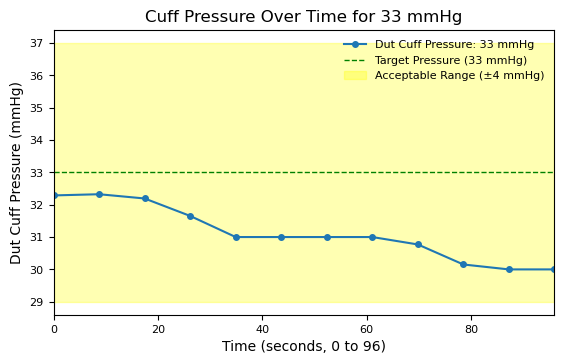

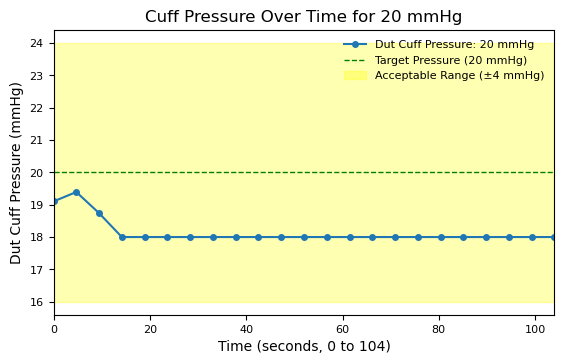

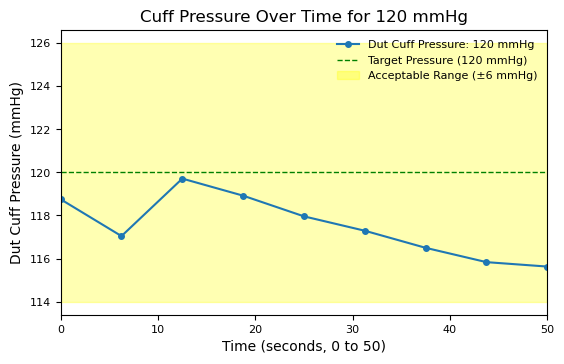

In [89]:
import re
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime, timedelta

# Sample log (as a multi-line string for example purposes)
log_data = """

01:38:54.510	INFO	Changed patient type to PatientType.ADULT	
01:38:54.718	INFO	Host request: Start venous stasis mode (target pressure = 33 mmHg)	
01:38:57.445	INFO	NIBP SPM reached the target pressure	
01:40:30.993	DEBUG	Dut cuff pressure: 33 mmHg	
01:40:30.993	DEBUG	Dut cuff pressure: 33 mmHg	
01:40:30.993	DEBUG	Dut cuff pressure: 33 mmHg	
01:40:30.993	DEBUG	Dut cuff pressure: 30 mmHg	
01:40:30.993	DEBUG	Dut cuff pressure: 35 mmHg	
01:40:30.993	DEBUG	Dut cuff pressure: 33 mmHg	
01:40:30.993	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:30.993	DEBUG	Dut cuff pressure: 29 mmHg	
01:40:30.993	DEBUG	Dut cuff pressure: 35 mmHg	
01:40:30.993	DEBUG	Dut cuff pressure: 33 mmHg	
01:40:30.993	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:30.993	DEBUG	Dut cuff pressure: 30 mmHg	
01:40:30.993	DEBUG	Dut cuff pressure: 30 mmHg	
01:40:30.993	DEBUG	Dut cuff pressure: 36 mmHg	
01:40:30.994	DEBUG	Dut cuff pressure: 34 mmHg	
01:40:30.994	DEBUG	Dut cuff pressure: 33 mmHg	
01:40:30.994	DEBUG	Dut cuff pressure: 32 mmHg	
01:40:30.994	DEBUG	Dut cuff pressure: 32 mmHg	
01:40:30.994	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:30.994	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:30.994	DEBUG	Dut cuff pressure: 30 mmHg	
01:40:30.994	DEBUG	Dut cuff pressure: 30 mmHg	
01:40:30.994	DEBUG	Dut cuff pressure: 30 mmHg	
01:40:30.994	DEBUG	Dut cuff pressure: 30 mmHg	
01:40:30.994	DEBUG	Dut cuff pressure: 30 mmHg	
01:40:30.994	DEBUG	Dut cuff pressure: 30 mmHg	
01:40:30.994	DEBUG	Dut cuff pressure: 30 mmHg	
01:40:30.994	DEBUG	Dut cuff pressure: 33 mmHg	
01:40:30.994	DEBUG	Dut cuff pressure: 35 mmHg	
01:40:30.994	DEBUG	Dut cuff pressure: 34 mmHg	
01:40:30.994	DEBUG	Dut cuff pressure: 34 mmHg	
01:40:30.994	DEBUG	Dut cuff pressure: 34 mmHg	
01:40:30.994	DEBUG	Dut cuff pressure: 33 mmHg	
01:40:30.994	DEBUG	Dut cuff pressure: 33 mmHg	
01:40:30.994	DEBUG	Dut cuff pressure: 33 mmHg	
01:40:30.994	DEBUG	Dut cuff pressure: 33 mmHg	
01:40:30.994	DEBUG	Dut cuff pressure: 33 mmHg	
01:40:30.994	DEBUG	Dut cuff pressure: 33 mmHg	
01:40:30.994	DEBUG	Dut cuff pressure: 33 mmHg	
01:40:30.994	DEBUG	Dut cuff pressure: 33 mmHg	
01:40:30.994	DEBUG	Dut cuff pressure: 33 mmHg	
01:40:30.994	DEBUG	Dut cuff pressure: 33 mmHg	
01:40:30.994	DEBUG	Dut cuff pressure: 33 mmHg	
01:40:30.994	DEBUG	Dut cuff pressure: 33 mmHg	
01:40:30.994	DEBUG	Dut cuff pressure: 33 mmHg	
01:40:30.995	DEBUG	Dut cuff pressure: 33 mmHg	
01:40:30.995	DEBUG	Dut cuff pressure: 33 mmHg	
01:40:30.995	DEBUG	Dut cuff pressure: 33 mmHg	
01:40:30.995	DEBUG	Dut cuff pressure: 33 mmHg	
01:40:30.995	DEBUG	Dut cuff pressure: 33 mmHg	
01:40:30.995	DEBUG	Dut cuff pressure: 33 mmHg	
01:40:30.995	DEBUG	Dut cuff pressure: 33 mmHg	
01:40:30.995	DEBUG	Dut cuff pressure: 33 mmHg	
01:40:30.995	DEBUG	Dut cuff pressure: 33 mmHg	
01:40:30.995	DEBUG	Dut cuff pressure: 32 mmHg	
01:40:30.995	DEBUG	Dut cuff pressure: 32 mmHg	
01:40:30.995	DEBUG	Dut cuff pressure: 32 mmHg	
01:40:30.995	DEBUG	Dut cuff pressure: 32 mmHg	
01:40:30.995	DEBUG	Dut cuff pressure: 32 mmHg	
01:40:30.995	DEBUG	Dut cuff pressure: 32 mmHg	
01:40:30.995	DEBUG	Dut cuff pressure: 32 mmHg	
01:40:30.995	DEBUG	Dut cuff pressure: 32 mmHg	
01:40:30.995	DEBUG	Dut cuff pressure: 32 mmHg	
01:40:30.995	DEBUG	Dut cuff pressure: 32 mmHg	
01:40:30.995	DEBUG	Dut cuff pressure: 32 mmHg	
01:40:30.995	DEBUG	Dut cuff pressure: 32 mmHg	
01:40:30.995	DEBUG	Dut cuff pressure: 32 mmHg	
01:40:30.995	DEBUG	Dut cuff pressure: 32 mmHg	
01:40:30.995	DEBUG	Dut cuff pressure: 32 mmHg	
01:40:30.995	DEBUG	Dut cuff pressure: 32 mmHg	
01:40:30.995	DEBUG	Dut cuff pressure: 32 mmHg	
01:40:30.995	DEBUG	Dut cuff pressure: 32 mmHg	
01:40:30.995	DEBUG	Dut cuff pressure: 32 mmHg	
01:40:30.995	DEBUG	Dut cuff pressure: 32 mmHg	
01:40:30.995	DEBUG	Dut cuff pressure: 32 mmHg	
01:40:30.995	DEBUG	Dut cuff pressure: 32 mmHg	
01:40:30.995	DEBUG	Dut cuff pressure: 32 mmHg	
01:40:30.995	DEBUG	Dut cuff pressure: 32 mmHg	
01:40:30.995	DEBUG	Dut cuff pressure: 32 mmHg	
01:40:30.995	DEBUG	Dut cuff pressure: 32 mmHg	
01:40:30.995	DEBUG	Dut cuff pressure: 32 mmHg	
01:40:30.995	DEBUG	Dut cuff pressure: 32 mmHg	
01:40:30.995	DEBUG	Dut cuff pressure: 32 mmHg	
01:40:30.995	DEBUG	Dut cuff pressure: 32 mmHg	
01:40:30.995	DEBUG	Dut cuff pressure: 32 mmHg	
01:40:30.995	DEBUG	Dut cuff pressure: 32 mmHg	
01:40:30.995	DEBUG	Dut cuff pressure: 32 mmHg	
01:40:30.995	DEBUG	Dut cuff pressure: 32 mmHg	
01:40:30.995	DEBUG	Dut cuff pressure: 32 mmHg	
01:40:30.995	DEBUG	Dut cuff pressure: 32 mmHg	
01:40:30.995	DEBUG	Dut cuff pressure: 32 mmHg	
01:40:30.995	DEBUG	Dut cuff pressure: 32 mmHg	
01:40:30.996	DEBUG	Dut cuff pressure: 32 mmHg	
01:40:30.996	DEBUG	Dut cuff pressure: 32 mmHg	
01:40:30.996	DEBUG	Dut cuff pressure: 32 mmHg	
01:40:30.996	DEBUG	Dut cuff pressure: 32 mmHg	
01:40:30.996	DEBUG	Dut cuff pressure: 32 mmHg	
01:40:30.996	DEBUG	Dut cuff pressure: 32 mmHg	
01:40:30.996	DEBUG	Dut cuff pressure: 32 mmHg	
01:40:30.996	DEBUG	Dut cuff pressure: 32 mmHg	
01:40:30.996	DEBUG	Dut cuff pressure: 32 mmHg	
01:40:30.996	DEBUG	Dut cuff pressure: 32 mmHg	
01:40:30.996	DEBUG	Dut cuff pressure: 32 mmHg	
01:40:30.996	DEBUG	Dut cuff pressure: 32 mmHg	
01:40:30.996	DEBUG	Dut cuff pressure: 32 mmHg	
01:40:30.996	DEBUG	Dut cuff pressure: 32 mmHg	
01:40:30.996	DEBUG	Dut cuff pressure: 32 mmHg	
01:40:30.996	DEBUG	Dut cuff pressure: 32 mmHg	
01:40:30.996	DEBUG	Dut cuff pressure: 32 mmHg	
01:40:30.996	DEBUG	Dut cuff pressure: 32 mmHg	
01:40:30.996	DEBUG	Dut cuff pressure: 32 mmHg	
01:40:30.996	DEBUG	Dut cuff pressure: 32 mmHg	
01:40:30.996	DEBUG	Dut cuff pressure: 32 mmHg	
01:40:30.996	DEBUG	Dut cuff pressure: 32 mmHg	
01:40:30.996	DEBUG	Dut cuff pressure: 32 mmHg	
01:40:30.996	DEBUG	Dut cuff pressure: 32 mmHg	
01:40:30.996	DEBUG	Dut cuff pressure: 32 mmHg	
01:40:30.996	DEBUG	Dut cuff pressure: 32 mmHg	
01:40:30.996	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:30.996	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:30.996	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:30.996	DEBUG	Dut cuff pressure: 32 mmHg	
01:40:30.996	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:30.996	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:30.996	DEBUG	Dut cuff pressure: 32 mmHg	
01:40:30.996	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:30.996	DEBUG	Dut cuff pressure: 32 mmHg	
01:40:30.996	DEBUG	Dut cuff pressure: 32 mmHg	
01:40:30.996	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:30.996	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:30.996	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:30.996	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:30.996	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:30.996	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:30.996	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:30.996	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:30.996	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:30.996	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:30.997	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:30.997	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:30.997	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:30.997	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:30.997	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:30.997	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:30.997	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:30.997	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:30.997	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:30.997	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:30.997	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:30.997	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:30.997	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:30.997	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:30.997	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:30.997	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:30.997	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:30.997	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:30.997	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:30.997	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:30.997	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:30.997	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:30.997	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:30.997	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:30.997	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:30.997	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:30.997	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:30.997	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:30.997	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:30.997	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:30.997	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:30.997	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:30.997	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:30.997	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:30.997	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:30.997	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:30.997	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:30.997	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:30.997	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:30.997	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:30.997	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:30.997	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:30.997	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:30.997	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:30.997	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:30.997	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:30.997	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:30.998	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:30.998	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:30.998	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:30.998	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:30.998	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:30.998	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:30.998	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:30.998	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:30.998	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:30.998	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:30.998	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:30.998	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:30.998	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:30.998	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:30.998	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:30.998	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:30.998	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:30.998	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:30.998	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:30.998	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:30.998	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:30.998	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:30.998	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:30.998	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:30.998	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:30.998	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:30.998	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:30.998	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:30.998	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:30.998	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:30.998	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:30.998	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:30.998	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:30.998	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:30.998	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:30.998	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:30.998	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:30.998	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:30.998	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:30.998	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:30.998	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:30.998	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:30.998	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:30.998	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:30.998	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:30.999	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:30.999	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:30.999	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:30.999	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:30.999	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:30.999	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:30.999	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:30.999	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:30.999	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:30.999	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:30.999	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:30.999	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:30.999	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:30.999	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:30.999	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:30.999	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:30.999	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:30.999	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:30.999	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:30.999	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:30.999	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:30.999	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:30.999	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:30.999	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:30.999	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:30.999	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:30.999	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:30.999	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:30.999	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:30.999	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:30.999	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:30.999	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:30.999	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:30.999	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:30.999	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:30.999	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:30.999	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:30.999	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:30.999	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:30.999	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:30.999	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:30.999	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:30.999	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:30.999	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:30.999	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:30.999	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:30.999	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:30.999	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:31.000	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:31.000	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:31.000	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:31.000	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:31.000	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:31.000	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:31.000	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:31.000	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:31.000	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:31.000	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:31.000	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:31.000	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:31.000	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:31.000	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:31.000	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:31.000	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:31.000	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:31.000	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:31.000	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:31.000	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:31.000	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:31.000	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:31.000	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:31.000	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:31.000	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:31.000	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:31.000	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:31.000	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:31.000	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:31.000	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:31.000	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:31.000	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:31.000	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:31.000	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:31.000	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:31.000	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:31.000	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:31.000	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:31.000	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:31.000	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:31.000	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:31.000	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:31.000	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:31.000	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:31.000	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:31.001	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:31.001	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:31.001	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:31.001	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:31.001	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:31.001	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:31.001	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:31.001	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:31.001	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:31.001	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:31.001	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:31.001	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:31.001	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:31.001	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:31.001	DEBUG	Dut cuff pressure: 30 mmHg	
01:40:31.001	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:31.001	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:31.001	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:31.001	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:31.001	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:31.001	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:31.001	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:31.001	DEBUG	Dut cuff pressure: 30 mmHg	
01:40:31.001	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:31.001	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:31.001	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:31.001	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:31.001	DEBUG	Dut cuff pressure: 30 mmHg	
01:40:31.001	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:31.001	DEBUG	Dut cuff pressure: 30 mmHg	
01:40:31.001	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:31.001	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:31.001	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:31.001	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:31.001	DEBUG	Dut cuff pressure: 30 mmHg	
01:40:31.001	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:31.001	DEBUG	Dut cuff pressure: 30 mmHg	
01:40:31.001	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:31.001	DEBUG	Dut cuff pressure: 30 mmHg	
01:40:31.001	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:31.001	DEBUG	Dut cuff pressure: 30 mmHg	
01:40:31.001	DEBUG	Dut cuff pressure: 30 mmHg	
01:40:31.001	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:31.001	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:31.001	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:31.001	DEBUG	Dut cuff pressure: 30 mmHg	
01:40:31.001	DEBUG	Dut cuff pressure: 30 mmHg	
01:40:31.001	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:31.002	DEBUG	Dut cuff pressure: 30 mmHg	
01:40:31.002	DEBUG	Dut cuff pressure: 30 mmHg	
01:40:31.002	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:31.002	DEBUG	Dut cuff pressure: 30 mmHg	
01:40:31.002	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:31.002	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:31.002	DEBUG	Dut cuff pressure: 30 mmHg	
01:40:31.002	DEBUG	Dut cuff pressure: 30 mmHg	
01:40:31.002	DEBUG	Dut cuff pressure: 30 mmHg	
01:40:31.002	DEBUG	Dut cuff pressure: 30 mmHg	
01:40:31.002	DEBUG	Dut cuff pressure: 30 mmHg	
01:40:31.002	DEBUG	Dut cuff pressure: 30 mmHg	
01:40:31.002	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:31.002	DEBUG	Dut cuff pressure: 30 mmHg	
01:40:31.002	DEBUG	Dut cuff pressure: 30 mmHg	
01:40:31.002	DEBUG	Dut cuff pressure: 30 mmHg	
01:40:31.002	DEBUG	Dut cuff pressure: 30 mmHg	
01:40:31.002	DEBUG	Dut cuff pressure: 30 mmHg	
01:40:31.002	DEBUG	Dut cuff pressure: 30 mmHg	
01:40:31.002	DEBUG	Dut cuff pressure: 30 mmHg	
01:40:31.002	DEBUG	Dut cuff pressure: 30 mmHg	
01:40:31.002	DEBUG	Dut cuff pressure: 30 mmHg	
01:40:31.002	DEBUG	Dut cuff pressure: 30 mmHg	
01:40:31.002	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:31.002	DEBUG	Dut cuff pressure: 30 mmHg	
01:40:31.002	DEBUG	Dut cuff pressure: 30 mmHg	
01:40:31.002	DEBUG	Dut cuff pressure: 30 mmHg	
01:40:31.002	DEBUG	Dut cuff pressure: 30 mmHg	
01:40:31.002	DEBUG	Dut cuff pressure: 30 mmHg	
01:40:31.002	DEBUG	Dut cuff pressure: 30 mmHg	
01:40:31.002	DEBUG	Dut cuff pressure: 30 mmHg	
01:40:31.002	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:31.002	DEBUG	Dut cuff pressure: 31 mmHg	
01:40:31.002	DEBUG	Dut cuff pressure: 30 mmHg	
01:40:31.002	DEBUG	Dut cuff pressure: 30 mmHg	
01:40:31.002	DEBUG	Dut cuff pressure: 30 mmHg	
01:40:31.002	DEBUG	Dut cuff pressure: 30 mmHg	
01:40:31.002	DEBUG	Dut cuff pressure: 30 mmHg	
01:40:31.002	DEBUG	Dut cuff pressure: 30 mmHg	
01:40:31.002	DEBUG	Dut cuff pressure: 30 mmHg	
01:40:31.002	DEBUG	Dut cuff pressure: 30 mmHg	
01:40:31.002	DEBUG	Dut cuff pressure: 30 mmHg	
01:40:31.002	DEBUG	Dut cuff pressure: 30 mmHg	
01:40:31.002	DEBUG	Dut cuff pressure: 30 mmHg	
01:40:31.002	DEBUG	Dut cuff pressure: 30 mmHg	
01:40:31.002	DEBUG	Dut cuff pressure: 30 mmHg	
01:40:31.003	DEBUG	Dut cuff pressure: 30 mmHg	
01:40:31.003	DEBUG	Dut cuff pressure: 30 mmHg	
01:40:31.003	DEBUG	Dut cuff pressure: 30 mmHg	
01:40:31.003	DEBUG	Dut cuff pressure: 30 mmHg	
01:40:31.003	DEBUG	Dut cuff pressure: 30 mmHg	
01:40:31.003	DEBUG	Dut cuff pressure: 30 mmHg	
01:40:31.003	DEBUG	Dut cuff pressure: 30 mmHg	
01:40:31.003	DEBUG	Dut cuff pressure: 30 mmHg	
01:40:31.003	DEBUG	Dut cuff pressure: 30 mmHg	
01:40:31.003	DEBUG	Dut cuff pressure: 30 mmHg	
01:40:31.003	DEBUG	Dut cuff pressure: 30 mmHg	
01:40:31.003	DEBUG	Dut cuff pressure: 30 mmHg	
01:40:31.003	DEBUG	Dut cuff pressure: 30 mmHg	
01:40:31.003	DEBUG	Dut cuff pressure: 30 mmHg	
01:40:31.003	DEBUG	Dut cuff pressure: 30 mmHg	
01:40:31.003	DEBUG	Dut cuff pressure: 30 mmHg	
01:40:31.003	DEBUG	Dut cuff pressure: 30 mmHg	
01:40:31.003	DEBUG	Dut cuff pressure: 30 mmHg	
01:40:31.003	DEBUG	Dut cuff pressure: 30 mmHg	
01:40:31.003	DEBUG	Dut cuff pressure: 30 mmHg	
01:40:31.003	DEBUG	Dut cuff pressure: 30 mmHg	
01:40:31.003	DEBUG	Dut cuff pressure: 30 mmHg	
01:40:31.003	DEBUG	Dut cuff pressure: 30 mmHg	
01:40:31.003	DEBUG	Dut cuff pressure: 30 mmHg	
01:40:31.003	DEBUG	Dut cuff pressure: 30 mmHg	
01:40:31.003	DEBUG	Dut cuff pressure: 30 mmHg	
01:40:31.003	DEBUG	Dut cuff pressure: 30 mmHg	
01:40:31.003	DEBUG	Dut cuff pressure: 30 mmHg	
01:40:31.003	DEBUG	Dut cuff pressure: 30 mmHg	
01:40:31.003	DEBUG	Dut cuff pressure: 30 mmHg	
01:40:31.003	DEBUG	Dut cuff pressure: 30 mmHg	
01:40:31.003	DEBUG	Dut cuff pressure: 30 mmHg	
01:40:31.003	DEBUG	Dut cuff pressure: 30 mmHg	
01:40:31.003	DEBUG	Dut cuff pressure: 30 mmHg	
01:40:31.003	DEBUG	Dut cuff pressure: 30 mmHg	
01:40:31.003	DEBUG	Dut cuff pressure: 30 mmHg	
01:40:31.003	DEBUG	Dut cuff pressure: 30 mmHg	
01:40:31.003	DEBUG	Dut cuff pressure: 30 mmHg	
01:40:31.003	DEBUG	Dut cuff pressure: 30 mmHg	
01:40:31.003	DEBUG	Dut cuff pressure: 30 mmHg	
01:40:31.003	DEBUG	Dut cuff pressure: 30 mmHg	
01:40:31.003	DEBUG	Dut cuff pressure: 30 mmHg	
01:40:31.003	DEBUG	Dut cuff pressure: 30 mmHg	
01:40:31.003	DEBUG	Dut cuff pressure: 30 mmHg	
01:40:31.003	DEBUG	Dut cuff pressure: 30 mmHg	
01:40:31.003	DEBUG	Dut cuff pressure: 30 mmHg	
01:40:31.003	DEBUG	Dut cuff pressure: 30 mmHg	
01:40:31.003	DEBUG	Dut cuff pressure: 30 mmHg	
01:40:31.004	DEBUG	Dut cuff pressure: 30 mmHg	
01:40:31.004	DEBUG	Dut cuff pressure: 30 mmHg	
01:40:31.004	DEBUG	Dut cuff pressure: 30 mmHg	
01:40:31.004	INFO	EXPECTED RESULT: In venous stasis mode, the sensor maintains the host-defined pressure of 33 mmHg (± 4.00 mmHg), for 96 seconds.	
01:40:31.004	INFO	OBSERVED RESULT: In venous stasis mode, the sensor maintained the cuff pressure at 33 mmHg ± 4.00 mmHg for 96 seconds.	
01:40:31.004	INFO	Host request: Stop venous stasis mode	
01:41:01.106	INFO	EXPECTED RESULT: After 30 seconds from stopping venous stasis mode, the cuff has deflated at least to 15 mmHg.	
01:41:01.106	INFO	OBSERVED RESULT: After 30 seconds from stopping venous stasis mode, cuff pressure was 0 mmHg.	
01:41:01.106	DEBUG	Close periodic sync communication	
01:41:01.252	DEBUG	Sent: <SescpTerminateSessionRequest: 38 | {'tag': <SescpTag.TERMINATE_SESSION_REQUEST: 0x38>, 'timestamp': None}>	
01:41:01.258	DEBUG	Received: <SescpTerminateSessionResponse: 39 | {'tag': <SescpTag.TERMINATE_SESSION_RESPONSE: 0x39>, 'timestamp': None}>	
01:41:01.260	DEBUG	Sent: <NwcpRemoveNetworkAddressIndication: 266974277374727565f8 | {'tag': <NwcpIndicationTag.REMOVE_NETWORK_ADDRESS: 38>, 'node_uid': b"it'strue", 'node_lid': 248, 'timestamp': None}>	
01:41:01.261	DEBUG	Sent: <MbancpNodeDisconnectedIndication: 1c01 | {'tag': <MbancpIndicationTag.NODE_DISCONNECTED: 28>, 'disconnect_reason': 1, 'timestamp': None}>	
01:41:01.261	INFO	Sensor disassociated from simulated HUB	
01:41:01.261	DEBUG	PDS: Connecting to patient data simulator	
01:41:01.262	DEBUG	PDS: Connected to Serial<id=0x7fb4b9a48c18, open=True>(port='/dev/resources/2_Prosim/ML895.8429', baudrate=115200, bytesize=8, parity='N', stopbits=1, timeout=10, xonxoff=False, rtscts=True, dsrdtr=False)	
01:41:01.262	INFO	PDS: Connected to patient data simulator (PDS)	
01:41:02.264	DEBUG	PDS <- b'REMOTE\r\n' (8 bytes)	
01:41:02.270	DEBUG	PDS -> b'RMAIN\r\n' (7 bytes)	
01:41:03.271	DEBUG	PDS <- b'IDENT\r\n' (7 bytes)	
01:41:03.277	DEBUG	PDS -> b'PROSIM8,2.09.04\r\n' (17 bytes)	
01:41:04.278	DEBUG	PDS <- b'SN\r\n' (4 bytes)	
01:41:04.284	DEBUG	PDS -> b'6312088\r\n' (9 bytes)	
01:41:04.284	INFO	PDS: Toggle NIBP simulation ON	
01:41:05.285	DEBUG	PDS <- b'NIBPRUN=TRUE\r\n' (14 bytes)	
01:41:05.302	DEBUG	PDS -> b'*\r\n' (3 bytes)	
01:41:05.302	INFO	PDS: Set dynamic systolic/diastolic pressure: 120/80 mmHg	
01:41:06.303	DEBUG	PDS <- b'NIBPP=120,080\r\n' (15 bytes)	
01:41:06.320	DEBUG	PDS -> b'*\r\n' (3 bytes)	
01:41:06.320	INFO	PDS: Set NIBP pulse volume to: 1 mL	
01:41:07.321	DEBUG	PDS <- b'NIBPV=1.00\r\n' (12 bytes)	
01:41:07.343	DEBUG	PDS -> b'*\r\n' (3 bytes)	
01:41:07.343	INFO	PDS: Set normal ECG sinus rhythm to 120 bpm (+/- 1%)	
01:41:08.344	DEBUG	PDS <- b'NSRA=120\r\n' (10 bytes)	
01:41:08.366	DEBUG	PDS -> b'*\r\n' (3 bytes)	
01:41:08.971	DEBUG	Sent: <NwcpNetworkAddressResponse: 2416af1e08b71f3c39001be1 | {'tag': <NwcpResponseTag.NETWORK_ADDRESS: 36>, 'node_uid': b'\x16\xaf\x1e\x08\xb7\x1f<9', 'status': <NwcpStatus.SUCCESS: 0>, 'node_lid': 27, 'hub_client_lid': 225, 'timestamp': None}>	
01:41:08.985	DEBUG	Received: <CdcpNodeJoinedEventMessageIndication: 261b16af1e08b71f3c39e161626300 | {'tag': <CdcpTag.NODE_JOINED_EVENT: 0x26>, 'node_lid': 27, 'device_uid': b'\x16\xaf\x1e\x08\xb7\x1f<9', 'hub_client_lid': 225, 'timestamp': None}>	
01:41:08.987	DEBUG	Sent: <Sescp1EnableMeasurementsRequest: 348008054e300000037031 | {'is_last': 128, 'capability_record_len': 8, 'capability_record': b'\x05N0\x00\x00\x03p1', 'protocol_version': 1, 'tag': <SescpTag.ENABLE_MEASUREMENTS_REQUEST: 0x34>, 'timestamp': None}>	
01:41:09.087	DEBUG	Received: <SescpSetBandwidthAllocationRequest: 311b0000 | {'node_lid': 27, 'stream_id': 0, 'number_of_required_packets': 0, 'tag': <SescpTag.SET_BANDWIDTH_ALLOCATION_REQUEST: 0x31>, 'timestamp': None}>	
01:41:09.089	DEBUG	Sent: <SescpSetBandwidthAllocationResponse: 321b000000 | {'node_lid': 27, 'stream_id': 0, 'number_of_required_packets': 0, 'status': <SescpStatus.SUCCEEDED: 0>, 'tag': <SescpTag.SET_BANDWIDTH_ALLOCATION_RESPONSE: 0x32>, 'timestamp': None}>	
01:41:09.090	DEBUG	Sent: <SescpBandwidthAllocationReadyIndication: 331b000000 | {'node_lid': 27, 'stream_id': 0, 'number_of_required_packets': 0, 'status': <SescpStatus.SUCCEEDED: 0>, 'tag': <SescpTag.SET_BANDWIDTH_ALLOCATION_READY_INDICATION: 0x33>, 'timestamp': None}>	
01:41:09.097	DEBUG	Received: <Sescp1EnableMeasurementsResponse: 3500009008054e300000037031 | {'status': 0, 'number_of_required_packets': 0, 'is_last': 144, 'capability_record_len': 8, 'capability_record': b'\x05N0\x00\x00\x03p1', 'protocol_version': 1, 'tag': <SescpTag.ENABLE_MEASUREMENTS_RESPONSE: 0x35>, 'timestamp': None}>	
01:41:09.097	DEBUG	OutputParameters: 054e300000037031	
01:41:09.099	DEBUG	Sent: <SescpActivateMeasurementRequest: 367061756c636f6f6c | {'stored_hub_uid': b'paulcool', 'tag': <SescpTag.ACTIVATE_MEASUREMENTS_REQUEST: 0x36>, 'timestamp': None}>	
01:41:09.113	DEBUG	Received: <SescpActivateMeasurementsResponse: 377061756c636f6f6c00 | {'stored_hub_uid': b'paulcool', 'status': <SescpStatus.SUCCEEDED: 0>, 'tag': <SescpTag.ACTIVATE_MEASUREMENTS_RESPONSE: 0x37>, 'timestamp': None}>	
01:41:09.113	INFO	Sensor associated to simulated HUB with HUB UID = 0x7061756c636f6f6c	
01:41:09.113	DEBUG	Start periodic sync communication	
01:41:09.129	INFO	Changed patient type to PatientType.ADULT	
01:41:09.337	INFO	Host request: Start venous stasis mode (target pressure = 20 mmHg)	
01:41:11.564	INFO	NIBP SPM reached the target pressure	
01:42:53.724	DEBUG	Dut cuff pressure: 20 mmHg	
01:42:53.724	DEBUG	Dut cuff pressure: 20 mmHg	
01:42:53.724	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.724	DEBUG	Dut cuff pressure: 17 mmHg	
01:42:53.724	DEBUG	Dut cuff pressure: 19 mmHg	
01:42:53.724	DEBUG	Dut cuff pressure: 22 mmHg	
01:42:53.724	DEBUG	Dut cuff pressure: 20 mmHg	
01:42:53.724	DEBUG	Dut cuff pressure: 19 mmHg	
01:42:53.724	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.724	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.725	DEBUG	Dut cuff pressure: 17 mmHg	
01:42:53.725	DEBUG	Dut cuff pressure: 17 mmHg	
01:42:53.725	DEBUG	Dut cuff pressure: 19 mmHg	
01:42:53.725	DEBUG	Dut cuff pressure: 23 mmHg	
01:42:53.725	DEBUG	Dut cuff pressure: 21 mmHg	
01:42:53.725	DEBUG	Dut cuff pressure: 21 mmHg	
01:42:53.725	DEBUG	Dut cuff pressure: 20 mmHg	
01:42:53.725	DEBUG	Dut cuff pressure: 20 mmHg	
01:42:53.725	DEBUG	Dut cuff pressure: 20 mmHg	
01:42:53.725	DEBUG	Dut cuff pressure: 20 mmHg	
01:42:53.725	DEBUG	Dut cuff pressure: 20 mmHg	
01:42:53.725	DEBUG	Dut cuff pressure: 19 mmHg	
01:42:53.725	DEBUG	Dut cuff pressure: 19 mmHg	
01:42:53.725	DEBUG	Dut cuff pressure: 19 mmHg	
01:42:53.725	DEBUG	Dut cuff pressure: 19 mmHg	
01:42:53.725	DEBUG	Dut cuff pressure: 19 mmHg	
01:42:53.725	DEBUG	Dut cuff pressure: 19 mmHg	
01:42:53.725	DEBUG	Dut cuff pressure: 19 mmHg	
01:42:53.725	DEBUG	Dut cuff pressure: 19 mmHg	
01:42:53.725	DEBUG	Dut cuff pressure: 19 mmHg	
01:42:53.725	DEBUG	Dut cuff pressure: 19 mmHg	
01:42:53.725	DEBUG	Dut cuff pressure: 19 mmHg	
01:42:53.725	DEBUG	Dut cuff pressure: 19 mmHg	
01:42:53.726	DEBUG	Dut cuff pressure: 19 mmHg	
01:42:53.726	DEBUG	Dut cuff pressure: 19 mmHg	
01:42:53.726	DEBUG	Dut cuff pressure: 19 mmHg	
01:42:53.726	DEBUG	Dut cuff pressure: 19 mmHg	
01:42:53.726	DEBUG	Dut cuff pressure: 19 mmHg	
01:42:53.726	DEBUG	Dut cuff pressure: 19 mmHg	
01:42:53.726	DEBUG	Dut cuff pressure: 19 mmHg	
01:42:53.726	DEBUG	Dut cuff pressure: 19 mmHg	
01:42:53.726	DEBUG	Dut cuff pressure: 19 mmHg	
01:42:53.726	DEBUG	Dut cuff pressure: 19 mmHg	
01:42:53.726	DEBUG	Dut cuff pressure: 19 mmHg	
01:42:53.726	DEBUG	Dut cuff pressure: 19 mmHg	
01:42:53.726	DEBUG	Dut cuff pressure: 19 mmHg	
01:42:53.726	DEBUG	Dut cuff pressure: 19 mmHg	
01:42:53.726	DEBUG	Dut cuff pressure: 19 mmHg	
01:42:53.726	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.726	DEBUG	Dut cuff pressure: 19 mmHg	
01:42:53.726	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.726	DEBUG	Dut cuff pressure: 19 mmHg	
01:42:53.726	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.726	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.726	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.726	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.727	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.727	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.727	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.727	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.727	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.727	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.727	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.727	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.727	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.727	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.727	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.727	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.727	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.727	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.727	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.727	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.727	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.727	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.727	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.727	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.727	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.727	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.727	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.727	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.728	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.728	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.728	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.728	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.728	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.728	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.728	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.728	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.728	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.728	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.728	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.728	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.728	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.728	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.728	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.728	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.728	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.728	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.728	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.728	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.728	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.728	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.728	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.729	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.729	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.729	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.729	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.729	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.729	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.729	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.729	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.729	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.729	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.729	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.729	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.729	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.729	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.729	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.729	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.729	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.729	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.729	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.729	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.729	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.729	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.729	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.729	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.730	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.730	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.730	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.730	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.730	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.730	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.730	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.730	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.730	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.730	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.730	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.730	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.730	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.730	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.730	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.730	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.730	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.730	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.730	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.730	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.730	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.730	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.730	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.730	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.731	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.731	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.731	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.731	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.731	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.731	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.731	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.731	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.731	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.731	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.731	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.731	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.731	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.731	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.731	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.731	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.731	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.731	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.731	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.731	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.731	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.731	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.731	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.731	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.732	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.732	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.732	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.732	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.732	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.732	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.732	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.732	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.732	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.732	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.732	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.732	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.732	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.732	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.732	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.732	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.732	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.732	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.732	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.732	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.732	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.732	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.732	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.733	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.733	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.733	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.733	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.733	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.733	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.733	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.733	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.733	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.733	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.733	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.733	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.733	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.733	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.733	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.733	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.733	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.733	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.733	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.733	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.733	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.733	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.733	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.734	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.734	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.734	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.734	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.734	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.734	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.734	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.734	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.734	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.734	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.734	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.734	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.734	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.734	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.734	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.734	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.734	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.734	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.734	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.734	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.734	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.734	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.734	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.735	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.735	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.735	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.735	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.735	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.735	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.735	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.735	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.735	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.735	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.735	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.735	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.735	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.735	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.735	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.735	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.735	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.735	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.735	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.735	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.735	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.735	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.735	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.736	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.736	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.736	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.736	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.736	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.736	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.736	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.736	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.736	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.736	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.736	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.736	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.736	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.736	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.736	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.736	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.736	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.736	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.736	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.736	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.736	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.736	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.736	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.736	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.737	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.737	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.737	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.737	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.737	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.737	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.737	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.737	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.737	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.737	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.737	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.737	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.737	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.737	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.737	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.737	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.737	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.737	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.737	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.737	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.737	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.737	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.737	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.738	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.738	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.738	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.738	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.738	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.738	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.738	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.738	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.738	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.738	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.738	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.738	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.738	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.738	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.738	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.738	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.738	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.738	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.738	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.738	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.738	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.738	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.738	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.739	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.739	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.739	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.739	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.739	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.739	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.739	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.739	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.739	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.739	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.739	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.739	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.739	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.739	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.739	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.739	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.739	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.739	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.739	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.739	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.739	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.739	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.739	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.739	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.740	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.740	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.740	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.740	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.740	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.740	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.740	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.740	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.740	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.740	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.740	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.740	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.740	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.740	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.740	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.740	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.740	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.740	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.740	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.740	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.740	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.740	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.740	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.741	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.741	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.741	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.741	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.741	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.741	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.741	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.741	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.741	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.741	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.741	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.741	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.741	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.741	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.741	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.741	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.741	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.741	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.741	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.741	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.741	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.741	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.741	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.742	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.742	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.742	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.742	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.742	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.742	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.742	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.742	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.742	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.742	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.742	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.742	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.742	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.742	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.742	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.742	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.742	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.742	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.742	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.742	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.742	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.742	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.742	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.743	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.743	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.743	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.743	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.743	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.743	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.743	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.743	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.743	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.743	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.743	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.743	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.743	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.743	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.743	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.743	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.743	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.743	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.743	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.743	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.743	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.743	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.743	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.743	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.744	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.744	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.744	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.744	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.744	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.744	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.744	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.744	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.744	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.744	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.744	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.744	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.744	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.744	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.744	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.744	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.744	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.744	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.744	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.744	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.744	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.744	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.744	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.744	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.745	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.745	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.745	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.745	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.745	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.745	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.745	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.745	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.745	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.745	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.745	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.745	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.745	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.745	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.745	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.745	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.745	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.745	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.745	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.745	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.745	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.745	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.745	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.746	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.746	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.746	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.746	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.746	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.746	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.746	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.746	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.746	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.746	DEBUG	Dut cuff pressure: 18 mmHg	
01:42:53.746	INFO	EXPECTED RESULT: In venous stasis mode, the sensor maintains the host-defined pressure of 20 mmHg (± 4.00 mmHg), for 104 seconds.	
01:42:53.746	INFO	OBSERVED RESULT: In venous stasis mode, the sensor maintained the cuff pressure at 20 mmHg ± 4.00 mmHg for 104 seconds.	
01:42:53.746	INFO	Host request: Stop venous stasis mode	
01:43:23.828	INFO	EXPECTED RESULT: After 30 seconds from stopping venous stasis mode, the cuff has deflated at least to 15 mmHg.	
01:43:23.828	INFO	OBSERVED RESULT: After 30 seconds from stopping venous stasis mode, cuff pressure was 0 mmHg.	
01:43:23.828	DEBUG	Close periodic sync communication	
01:43:23.951	DEBUG	Sent: <SescpTerminateSessionRequest: 38 | {'tag': <SescpTag.TERMINATE_SESSION_REQUEST: 0x38>, 'timestamp': None}>	
01:43:23.957	DEBUG	Received: <SescpTerminateSessionResponse: 39 | {'tag': <SescpTag.TERMINATE_SESSION_RESPONSE: 0x39>, 'timestamp': None}>	
01:43:23.958	DEBUG	Sent: <NwcpRemoveNetworkAddressIndication: 266974277374727565f8 | {'tag': <NwcpIndicationTag.REMOVE_NETWORK_ADDRESS: 38>, 'node_uid': b"it'strue", 'node_lid': 248, 'timestamp': None}>	
01:43:23.960	DEBUG	Sent: <MbancpNodeDisconnectedIndication: 1c01 | {'tag': <MbancpIndicationTag.NODE_DISCONNECTED: 28>, 'disconnect_reason': 1, 'timestamp': None}>	
01:43:23.960	INFO	Sensor disassociated from simulated HUB	
01:43:23.960	DEBUG	PDS: Connecting to patient data simulator	
01:43:23.962	DEBUG	PDS: Connected to Serial<id=0x7fb4b9abca90, open=True>(port='/dev/resources/2_Prosim/ML895.8429', baudrate=115200, bytesize=8, parity='N', stopbits=1, timeout=10, xonxoff=False, rtscts=True, dsrdtr=False)	
01:43:23.962	INFO	PDS: Connected to patient data simulator (PDS)	
01:43:24.963	DEBUG	PDS <- b'REMOTE\r\n' (8 bytes)	
01:43:24.978	DEBUG	PDS -> b'RMAIN\r\n' (7 bytes)	
01:43:25.980	DEBUG	PDS <- b'IDENT\r\n' (7 bytes)	
01:43:26.001	DEBUG	PDS -> b'PROSIM8,2.09.04\r\n' (17 bytes)	
01:43:27.003	DEBUG	PDS <- b'SN\r\n' (4 bytes)	
01:43:27.024	DEBUG	PDS -> b'6312088\r\n' (9 bytes)	
01:43:27.025	INFO	PDS: Toggle NIBP simulation ON	
01:43:28.026	DEBUG	PDS <- b'NIBPRUN=TRUE\r\n' (14 bytes)	
01:43:28.043	DEBUG	PDS -> b'*\r\n' (3 bytes)	
01:43:28.043	INFO	PDS: Set dynamic systolic/diastolic pressure: 120/80 mmHg	
01:43:29.045	DEBUG	PDS <- b'NIBPP=120,080\r\n' (15 bytes)	
01:43:29.061	DEBUG	PDS -> b'*\r\n' (3 bytes)	
01:43:29.062	INFO	PDS: Set NIBP pulse volume to: 1 mL	
01:43:30.062	DEBUG	PDS <- b'NIBPV=1.00\r\n' (12 bytes)	
01:43:30.069	DEBUG	PDS -> b'*\r\n' (3 bytes)	
01:43:30.069	INFO	PDS: Set normal ECG sinus rhythm to 120 bpm (+/- 1%)	
01:43:31.070	DEBUG	PDS <- b'NSRA=120\r\n' (10 bytes)	
01:43:31.092	DEBUG	PDS -> b'*\r\n' (3 bytes)	
01:43:31.670	DEBUG	Sent: <NwcpNetworkAddressResponse: 2416af1e08b71f3c39001be1 | {'tag': <NwcpResponseTag.NETWORK_ADDRESS: 36>, 'node_uid': b'\x16\xaf\x1e\x08\xb7\x1f<9', 'status': <NwcpStatus.SUCCESS: 0>, 'node_lid': 27, 'hub_client_lid': 225, 'timestamp': None}>	
01:43:31.684	DEBUG	Received: <CdcpNodeJoinedEventMessageIndication: 261b16af1e08b71f3c39e161626300 | {'tag': <CdcpTag.NODE_JOINED_EVENT: 0x26>, 'node_lid': 27, 'device_uid': b'\x16\xaf\x1e\x08\xb7\x1f<9', 'hub_client_lid': 225, 'timestamp': None}>	
01:43:31.686	DEBUG	Sent: <Sescp1EnableMeasurementsRequest: 348008054e300000037031 | {'is_last': 128, 'capability_record_len': 8, 'capability_record': b'\x05N0\x00\x00\x03p1', 'protocol_version': 1, 'tag': <SescpTag.ENABLE_MEASUREMENTS_REQUEST: 0x34>, 'timestamp': None}>	
01:43:31.786	DEBUG	Received: <SescpSetBandwidthAllocationRequest: 311b0000 | {'node_lid': 27, 'stream_id': 0, 'number_of_required_packets': 0, 'tag': <SescpTag.SET_BANDWIDTH_ALLOCATION_REQUEST: 0x31>, 'timestamp': None}>	
01:43:31.788	DEBUG	Sent: <SescpSetBandwidthAllocationResponse: 321b000000 | {'node_lid': 27, 'stream_id': 0, 'number_of_required_packets': 0, 'status': <SescpStatus.SUCCEEDED: 0>, 'tag': <SescpTag.SET_BANDWIDTH_ALLOCATION_RESPONSE: 0x32>, 'timestamp': None}>	
01:43:31.790	DEBUG	Sent: <SescpBandwidthAllocationReadyIndication: 331b000000 | {'node_lid': 27, 'stream_id': 0, 'number_of_required_packets': 0, 'status': <SescpStatus.SUCCEEDED: 0>, 'tag': <SescpTag.SET_BANDWIDTH_ALLOCATION_READY_INDICATION: 0x33>, 'timestamp': None}>	
01:43:31.796	DEBUG	Received: <Sescp1EnableMeasurementsResponse: 350000a008054e300000037031 | {'status': 0, 'number_of_required_packets': 0, 'is_last': 160, 'capability_record_len': 8, 'capability_record': b'\x05N0\x00\x00\x03p1', 'protocol_version': 1, 'tag': <SescpTag.ENABLE_MEASUREMENTS_RESPONSE: 0x35>, 'timestamp': None}>	
01:43:31.796	DEBUG	OutputParameters: 054e300000037031	
01:43:31.798	DEBUG	Sent: <SescpActivateMeasurementRequest: 367061756c636f6f6c | {'stored_hub_uid': b'paulcool', 'tag': <SescpTag.ACTIVATE_MEASUREMENTS_REQUEST: 0x36>, 'timestamp': None}>	
01:43:31.812	DEBUG	Received: <SescpActivateMeasurementsResponse: 377061756c636f6f6c00 | {'stored_hub_uid': b'paulcool', 'status': <SescpStatus.SUCCEEDED: 0>, 'tag': <SescpTag.ACTIVATE_MEASUREMENTS_RESPONSE: 0x37>, 'timestamp': None}>	
01:43:31.812	INFO	Sensor associated to simulated HUB with HUB UID = 0x7061756c636f6f6c	
01:43:31.812	DEBUG	Start periodic sync communication	
01:43:31.886	INFO	Changed patient type to PatientType.ADULT	
01:43:32.100	INFO	Host request: Start venous stasis mode (target pressure = 120 mmHg)	
01:43:36.330	INFO	NIBP SPM reached the target pressure	
01:44:22.400	DEBUG	Dut cuff pressure: 116 mmHg	
01:44:22.400	DEBUG	Dut cuff pressure: 116 mmHg	
01:44:22.400	DEBUG	Dut cuff pressure: 122 mmHg	
01:44:22.400	DEBUG	Dut cuff pressure: 121 mmHg	
01:44:22.401	DEBUG	Dut cuff pressure: 119 mmHg	
01:44:22.401	DEBUG	Dut cuff pressure: 120 mmHg	
01:44:22.401	DEBUG	Dut cuff pressure: 118 mmHg	
01:44:22.401	DEBUG	Dut cuff pressure: 119 mmHg	
01:44:22.401	DEBUG	Dut cuff pressure: 119 mmHg	
01:44:22.401	DEBUG	Dut cuff pressure: 118 mmHg	
01:44:22.401	DEBUG	Dut cuff pressure: 117 mmHg	
01:44:22.401	DEBUG	Dut cuff pressure: 118 mmHg	
01:44:22.401	DEBUG	Dut cuff pressure: 117 mmHg	
01:44:22.401	DEBUG	Dut cuff pressure: 118 mmHg	
01:44:22.401	DEBUG	Dut cuff pressure: 117 mmHg	
01:44:22.401	DEBUG	Dut cuff pressure: 117 mmHg	
01:44:22.401	DEBUG	Dut cuff pressure: 117 mmHg	
01:44:22.401	DEBUG	Dut cuff pressure: 116 mmHg	
01:44:22.401	DEBUG	Dut cuff pressure: 117 mmHg	
01:44:22.401	DEBUG	Dut cuff pressure: 116 mmHg	
01:44:22.401	DEBUG	Dut cuff pressure: 116 mmHg	
01:44:22.401	DEBUG	Dut cuff pressure: 116 mmHg	
01:44:22.401	DEBUG	Dut cuff pressure: 115 mmHg	
01:44:22.401	DEBUG	Dut cuff pressure: 116 mmHg	
01:44:22.401	DEBUG	Dut cuff pressure: 115 mmHg	
01:44:22.401	DEBUG	Dut cuff pressure: 116 mmHg	
01:44:22.401	DEBUG	Dut cuff pressure: 115 mmHg	
01:44:22.402	DEBUG	Dut cuff pressure: 115 mmHg	
01:44:22.402	DEBUG	Dut cuff pressure: 115 mmHg	
01:44:22.402	DEBUG	Dut cuff pressure: 114 mmHg	
01:44:22.402	DEBUG	Dut cuff pressure: 123 mmHg	
01:44:22.402	DEBUG	Dut cuff pressure: 121 mmHg	
01:44:22.402	DEBUG	Dut cuff pressure: 122 mmHg	
01:44:22.402	DEBUG	Dut cuff pressure: 121 mmHg	
01:44:22.402	DEBUG	Dut cuff pressure: 120 mmHg	
01:44:22.402	DEBUG	Dut cuff pressure: 121 mmHg	
01:44:22.402	DEBUG	Dut cuff pressure: 121 mmHg	
01:44:22.402	DEBUG	Dut cuff pressure: 120 mmHg	
01:44:22.402	DEBUG	Dut cuff pressure: 121 mmHg	
01:44:22.402	DEBUG	Dut cuff pressure: 120 mmHg	
01:44:22.402	DEBUG	Dut cuff pressure: 120 mmHg	
01:44:22.402	DEBUG	Dut cuff pressure: 120 mmHg	
01:44:22.402	DEBUG	Dut cuff pressure: 120 mmHg	
01:44:22.402	DEBUG	Dut cuff pressure: 121 mmHg	
01:44:22.402	DEBUG	Dut cuff pressure: 120 mmHg	
01:44:22.402	DEBUG	Dut cuff pressure: 120 mmHg	
01:44:22.402	DEBUG	Dut cuff pressure: 120 mmHg	
01:44:22.402	DEBUG	Dut cuff pressure: 119 mmHg	
01:44:22.402	DEBUG	Dut cuff pressure: 120 mmHg	
01:44:22.402	DEBUG	Dut cuff pressure: 119 mmHg	
01:44:22.402	DEBUG	Dut cuff pressure: 120 mmHg	
01:44:22.403	DEBUG	Dut cuff pressure: 119 mmHg	
01:44:22.403	DEBUG	Dut cuff pressure: 119 mmHg	
01:44:22.403	DEBUG	Dut cuff pressure: 120 mmHg	
01:44:22.403	DEBUG	Dut cuff pressure: 119 mmHg	
01:44:22.403	DEBUG	Dut cuff pressure: 120 mmHg	
01:44:22.403	DEBUG	Dut cuff pressure: 119 mmHg	
01:44:22.403	DEBUG	Dut cuff pressure: 120 mmHg	
01:44:22.403	DEBUG	Dut cuff pressure: 119 mmHg	
01:44:22.403	DEBUG	Dut cuff pressure: 119 mmHg	
01:44:22.403	DEBUG	Dut cuff pressure: 119 mmHg	
01:44:22.403	DEBUG	Dut cuff pressure: 118 mmHg	
01:44:22.403	DEBUG	Dut cuff pressure: 119 mmHg	
01:44:22.403	DEBUG	Dut cuff pressure: 119 mmHg	
01:44:22.403	DEBUG	Dut cuff pressure: 119 mmHg	
01:44:22.403	DEBUG	Dut cuff pressure: 119 mmHg	
01:44:22.403	DEBUG	Dut cuff pressure: 119 mmHg	
01:44:22.403	DEBUG	Dut cuff pressure: 118 mmHg	
01:44:22.403	DEBUG	Dut cuff pressure: 119 mmHg	
01:44:22.403	DEBUG	Dut cuff pressure: 118 mmHg	
01:44:22.403	DEBUG	Dut cuff pressure: 119 mmHg	
01:44:22.403	DEBUG	Dut cuff pressure: 119 mmHg	
01:44:22.403	DEBUG	Dut cuff pressure: 118 mmHg	
01:44:22.403	DEBUG	Dut cuff pressure: 119 mmHg	
01:44:22.403	DEBUG	Dut cuff pressure: 118 mmHg	
01:44:22.404	DEBUG	Dut cuff pressure: 119 mmHg	
01:44:22.404	DEBUG	Dut cuff pressure: 118 mmHg	
01:44:22.404	DEBUG	Dut cuff pressure: 118 mmHg	
01:44:22.404	DEBUG	Dut cuff pressure: 119 mmHg	
01:44:22.404	DEBUG	Dut cuff pressure: 118 mmHg	
01:44:22.404	DEBUG	Dut cuff pressure: 119 mmHg	
01:44:22.404	DEBUG	Dut cuff pressure: 118 mmHg	
01:44:22.404	DEBUG	Dut cuff pressure: 118 mmHg	
01:44:22.404	DEBUG	Dut cuff pressure: 118 mmHg	
01:44:22.404	DEBUG	Dut cuff pressure: 118 mmHg	
01:44:22.404	DEBUG	Dut cuff pressure: 118 mmHg	
01:44:22.404	DEBUG	Dut cuff pressure: 117 mmHg	
01:44:22.404	DEBUG	Dut cuff pressure: 118 mmHg	
01:44:22.404	DEBUG	Dut cuff pressure: 118 mmHg	
01:44:22.404	DEBUG	Dut cuff pressure: 118 mmHg	
01:44:22.404	DEBUG	Dut cuff pressure: 118 mmHg	
01:44:22.404	DEBUG	Dut cuff pressure: 118 mmHg	
01:44:22.404	DEBUG	Dut cuff pressure: 117 mmHg	
01:44:22.404	DEBUG	Dut cuff pressure: 118 mmHg	
01:44:22.404	DEBUG	Dut cuff pressure: 117 mmHg	
01:44:22.404	DEBUG	Dut cuff pressure: 118 mmHg	
01:44:22.404	DEBUG	Dut cuff pressure: 118 mmHg	
01:44:22.404	DEBUG	Dut cuff pressure: 117 mmHg	
01:44:22.404	DEBUG	Dut cuff pressure: 118 mmHg	
01:44:22.405	DEBUG	Dut cuff pressure: 117 mmHg	
01:44:22.405	DEBUG	Dut cuff pressure: 118 mmHg	
01:44:22.405	DEBUG	Dut cuff pressure: 117 mmHg	
01:44:22.405	DEBUG	Dut cuff pressure: 117 mmHg	
01:44:22.405	DEBUG	Dut cuff pressure: 118 mmHg	
01:44:22.405	DEBUG	Dut cuff pressure: 117 mmHg	
01:44:22.405	DEBUG	Dut cuff pressure: 118 mmHg	
01:44:22.405	DEBUG	Dut cuff pressure: 117 mmHg	
01:44:22.405	DEBUG	Dut cuff pressure: 118 mmHg	
01:44:22.405	DEBUG	Dut cuff pressure: 117 mmHg	
01:44:22.405	DEBUG	Dut cuff pressure: 117 mmHg	
01:44:22.405	DEBUG	Dut cuff pressure: 118 mmHg	
01:44:22.405	DEBUG	Dut cuff pressure: 117 mmHg	
01:44:22.405	DEBUG	Dut cuff pressure: 118 mmHg	
01:44:22.405	DEBUG	Dut cuff pressure: 117 mmHg	
01:44:22.405	DEBUG	Dut cuff pressure: 117 mmHg	
01:44:22.405	DEBUG	Dut cuff pressure: 117 mmHg	
01:44:22.405	DEBUG	Dut cuff pressure: 117 mmHg	
01:44:22.405	DEBUG	Dut cuff pressure: 117 mmHg	
01:44:22.405	DEBUG	Dut cuff pressure: 118 mmHg	
01:44:22.405	DEBUG	Dut cuff pressure: 117 mmHg	
01:44:22.405	DEBUG	Dut cuff pressure: 117 mmHg	
01:44:22.405	DEBUG	Dut cuff pressure: 117 mmHg	
01:44:22.405	DEBUG	Dut cuff pressure: 117 mmHg	
01:44:22.406	DEBUG	Dut cuff pressure: 117 mmHg	
01:44:22.406	DEBUG	Dut cuff pressure: 116 mmHg	
01:44:22.406	DEBUG	Dut cuff pressure: 117 mmHg	
01:44:22.406	DEBUG	Dut cuff pressure: 117 mmHg	
01:44:22.406	DEBUG	Dut cuff pressure: 117 mmHg	
01:44:22.406	DEBUG	Dut cuff pressure: 117 mmHg	
01:44:22.406	DEBUG	Dut cuff pressure: 116 mmHg	
01:44:22.406	DEBUG	Dut cuff pressure: 117 mmHg	
01:44:22.406	DEBUG	Dut cuff pressure: 116 mmHg	
01:44:22.406	DEBUG	Dut cuff pressure: 117 mmHg	
01:44:22.406	DEBUG	Dut cuff pressure: 117 mmHg	
01:44:22.406	DEBUG	Dut cuff pressure: 116 mmHg	
01:44:22.406	DEBUG	Dut cuff pressure: 117 mmHg	
01:44:22.406	DEBUG	Dut cuff pressure: 116 mmHg	
01:44:22.406	DEBUG	Dut cuff pressure: 117 mmHg	
01:44:22.406	DEBUG	Dut cuff pressure: 116 mmHg	
01:44:22.406	DEBUG	Dut cuff pressure: 116 mmHg	
01:44:22.406	DEBUG	Dut cuff pressure: 117 mmHg	
01:44:22.406	DEBUG	Dut cuff pressure: 116 mmHg	
01:44:22.406	DEBUG	Dut cuff pressure: 116 mmHg	
01:44:22.406	DEBUG	Dut cuff pressure: 117 mmHg	
01:44:22.406	DEBUG	Dut cuff pressure: 116 mmHg	
01:44:22.406	DEBUG	Dut cuff pressure: 117 mmHg	
01:44:22.406	DEBUG	Dut cuff pressure: 117 mmHg	
01:44:22.406	DEBUG	Dut cuff pressure: 116 mmHg	
01:44:22.406	DEBUG	Dut cuff pressure: 117 mmHg	
01:44:22.406	DEBUG	Dut cuff pressure: 116 mmHg	
01:44:22.406	DEBUG	Dut cuff pressure: 117 mmHg	
01:44:22.406	DEBUG	Dut cuff pressure: 116 mmHg	
01:44:22.406	DEBUG	Dut cuff pressure: 116 mmHg	
01:44:22.406	DEBUG	Dut cuff pressure: 117 mmHg	
01:44:22.406	DEBUG	Dut cuff pressure: 116 mmHg	
01:44:22.406	DEBUG	Dut cuff pressure: 117 mmHg	
01:44:22.406	DEBUG	Dut cuff pressure: 116 mmHg	
01:44:22.406	DEBUG	Dut cuff pressure: 116 mmHg	
01:44:22.406	DEBUG	Dut cuff pressure: 116 mmHg	
01:44:22.406	DEBUG	Dut cuff pressure: 116 mmHg	
01:44:22.406	DEBUG	Dut cuff pressure: 117 mmHg	
01:44:22.406	DEBUG	Dut cuff pressure: 116 mmHg	
01:44:22.406	DEBUG	Dut cuff pressure: 117 mmHg	
01:44:22.407	DEBUG	Dut cuff pressure: 116 mmHg	
01:44:22.407	DEBUG	Dut cuff pressure: 116 mmHg	
01:44:22.407	DEBUG	Dut cuff pressure: 117 mmHg	
01:44:22.407	DEBUG	Dut cuff pressure: 116 mmHg	
01:44:22.407	DEBUG	Dut cuff pressure: 117 mmHg	
01:44:22.407	DEBUG	Dut cuff pressure: 116 mmHg	
01:44:22.407	DEBUG	Dut cuff pressure: 116 mmHg	
01:44:22.407	DEBUG	Dut cuff pressure: 116 mmHg	
01:44:22.407	DEBUG	Dut cuff pressure: 116 mmHg	
01:44:22.407	DEBUG	Dut cuff pressure: 116 mmHg	
01:44:22.407	DEBUG	Dut cuff pressure: 117 mmHg	
01:44:22.407	DEBUG	Dut cuff pressure: 116 mmHg	
01:44:22.407	DEBUG	Dut cuff pressure: 117 mmHg	
01:44:22.407	DEBUG	Dut cuff pressure: 116 mmHg	
01:44:22.407	DEBUG	Dut cuff pressure: 116 mmHg	
01:44:22.407	DEBUG	Dut cuff pressure: 116 mmHg	
01:44:22.407	DEBUG	Dut cuff pressure: 115 mmHg	
01:44:22.407	DEBUG	Dut cuff pressure: 117 mmHg	
01:44:22.407	DEBUG	Dut cuff pressure: 116 mmHg	
01:44:22.407	DEBUG	Dut cuff pressure: 116 mmHg	
01:44:22.407	DEBUG	Dut cuff pressure: 116 mmHg	
01:44:22.407	DEBUG	Dut cuff pressure: 115 mmHg	
01:44:22.407	DEBUG	Dut cuff pressure: 116 mmHg	
01:44:22.407	DEBUG	Dut cuff pressure: 115 mmHg	
01:44:22.407	DEBUG	Dut cuff pressure: 116 mmHg	
01:44:22.407	DEBUG	Dut cuff pressure: 116 mmHg	
01:44:22.407	DEBUG	Dut cuff pressure: 115 mmHg	
01:44:22.407	DEBUG	Dut cuff pressure: 116 mmHg	
01:44:22.407	DEBUG	Dut cuff pressure: 115 mmHg	
01:44:22.407	DEBUG	Dut cuff pressure: 116 mmHg	
01:44:22.407	DEBUG	Dut cuff pressure: 115 mmHg	
01:44:22.407	DEBUG	Dut cuff pressure: 116 mmHg	
01:44:22.407	DEBUG	Dut cuff pressure: 116 mmHg	
01:44:22.407	DEBUG	Dut cuff pressure: 116 mmHg	
01:44:22.407	DEBUG	Dut cuff pressure: 115 mmHg	
01:44:22.407	DEBUG	Dut cuff pressure: 116 mmHg	
01:44:22.407	DEBUG	Dut cuff pressure: 115 mmHg	
01:44:22.407	DEBUG	Dut cuff pressure: 116 mmHg	
01:44:22.407	DEBUG	Dut cuff pressure: 116 mmHg	
01:44:22.407	DEBUG	Dut cuff pressure: 115 mmHg	
01:44:22.407	DEBUG	Dut cuff pressure: 116 mmHg	
01:44:22.407	DEBUG	Dut cuff pressure: 115 mmHg	
01:44:22.407	DEBUG	Dut cuff pressure: 116 mmHg	
01:44:22.407	DEBUG	Dut cuff pressure: 115 mmHg	
01:44:22.407	DEBUG	Dut cuff pressure: 116 mmHg	
01:44:22.407	DEBUG	Dut cuff pressure: 116 mmHg	
01:44:22.407	DEBUG	Dut cuff pressure: 115 mmHg	
01:44:22.407	DEBUG	Dut cuff pressure: 116 mmHg	
01:44:22.407	DEBUG	Dut cuff pressure: 115 mmHg	
01:44:22.408	DEBUG	Dut cuff pressure: 116 mmHg	
01:44:22.408	DEBUG	Dut cuff pressure: 116 mmHg	
01:44:22.408	DEBUG	Dut cuff pressure: 115 mmHg	
01:44:22.408	DEBUG	Dut cuff pressure: 116 mmHg	
01:44:22.408	DEBUG	Dut cuff pressure: 115 mmHg	
01:44:22.408	DEBUG	Dut cuff pressure: 116 mmHg	
01:44:22.408	DEBUG	Dut cuff pressure: 115 mmHg	
01:44:22.408	DEBUG	Dut cuff pressure: 116 mmHg	
01:44:22.408	DEBUG	Dut cuff pressure: 116 mmHg	
01:44:22.408	DEBUG	Dut cuff pressure: 115 mmHg	
01:44:22.408	DEBUG	Dut cuff pressure: 116 mmHg	
01:44:22.408	DEBUG	Dut cuff pressure: 116 mmHg	
01:44:22.408	DEBUG	Dut cuff pressure: 115 mmHg	
01:44:22.408	DEBUG	Dut cuff pressure: 116 mmHg	
01:44:22.408	DEBUG	Dut cuff pressure: 116 mmHg	
01:44:22.408	DEBUG	Dut cuff pressure: 115 mmHg	
01:44:22.408	DEBUG	Dut cuff pressure: 116 mmHg	
01:44:22.408	DEBUG	Dut cuff pressure: 115 mmHg	
01:44:22.408	DEBUG	Dut cuff pressure: 116 mmHg	
01:44:22.408	INFO	EXPECTED RESULT: In venous stasis mode, the sensor maintains the host-defined pressure of 120 mmHg (± 6.00 mmHg), for 50 seconds.	
01:44:22.408	INFO	OBSERVED RESULT: In venous stasis mode, the sensor maintained the cuff pressure at 120 mmHg ± 6.00 mmHg for 50 seconds.	
01:44:22.408	INFO	Host request: Stop venous stasis mode	
01:44:52.510	INFO	EXPECTED RESULT: After 30 seconds from stopping venous stasis mode, the cuff has deflated at least to 15 mmHg.	
01:44:52.510	INFO	OBSERVED RESULT: After 30 seconds from stopping venous stasis mode, cuff pressure was 0 mmHg.
"""




# Regular expression patterns to extract data
pressure_pattern = r"(\d{2}:\d{2}:\d{2}\.\d{3})\s+DEBUG\s+Dut cuff pressure:\s+(\d+)\s*mmHg"
start_pattern = r"Start venous stasis mode \(target pressure = (\d+) mmHg\)"
stop_pattern = r"Stop venous stasis mode"

# Variables to hold segmented data
segments = []
current_segment = None

# Process the log line by line
for line in log_data.splitlines():
    start_match = re.search(start_pattern, line)
    stop_match = re.search(stop_pattern, line)
    pressure_match = re.search(pressure_pattern, line)
    
    # If we find the start of a new segment
    if start_match:
        target_pressure = int(start_match.group(1))
        if current_segment:
            segments.append(current_segment)

        current_segment = {
            "target_pressure": target_pressure,
            "timestamps": [],
            "pressures": []
        }
    
    # If we find the stop of a segment
    if stop_match and current_segment:
        segments.append(current_segment)
        current_segment = None
    
    # If we are inside a segment and find a pressure value
    if pressure_match and current_segment:
        timestamp = datetime.strptime(pressure_match.group(1), '%H:%M:%S.%f')
        pressure = int(pressure_match.group(2))
        current_segment["timestamps"].append(timestamp)
        current_segment["pressures"].append(pressure)

# Add last segment if not already added
if current_segment:
    segments.append(current_segment)

# Function to convert timestamps to relative time (in seconds)
def convert_to_relative_time(df):
    df['relative_time'] = (df['timestamp'] - df['timestamp'].min()).dt.total_seconds()
    return df

# Plot each segment separately with compact layout handling
for segment in segments:
    target_pressure = segment["target_pressure"]
    timestamps = segment["timestamps"]
    pressures = segment["pressures"]
    
    # Create DataFrame for plotting
    df = pd.DataFrame({
        'timestamp': timestamps,
        'Dut cuff pressure': pressures
    })
    
    # Convert timestamps to relative time
    df = convert_to_relative_time(df)
    
    # Define segment duration based on target pressure
    if target_pressure == 33:
        segment_duration = 96
    elif target_pressure == 20:
        segment_duration = 104
    elif target_pressure == 120:
        segment_duration = 50
    else:
        segment_duration = None
    
    # Only keep data within the segment duration
    df = df[df['relative_time'] <= segment_duration]
    
    # Group by relative time (if needed) and calculate the mean pressure
    df_grouped = df.groupby('relative_time').mean().reset_index()
    
    # Rescale relative time to match the segment duration
    df_grouped['relative_time'] = df_grouped['relative_time'] / df_grouped['relative_time'].max() * segment_duration
    
    # Plotting the data with reduced figure size
    plt.figure(figsize=(6, 4))
    plt.plot(df_grouped['relative_time'], df_grouped['Dut cuff pressure'], marker='o', label=f'Dut Cuff Pressure: {target_pressure} mmHg', markersize=4)
    
    # Define acceptable range based on target pressure
    acceptable_range = 4 if target_pressure in [20, 33] else 6
    
    # Add target line and range
    plt.axhline(target_pressure, color='green', linestyle='--', label=f'Target Pressure ({target_pressure} mmHg)', linewidth=1)
    plt.fill_between(df_grouped['relative_time'], target_pressure - acceptable_range, target_pressure + acceptable_range,
                     color='yellow', alpha=0.3, label=f'Acceptable Range (±{acceptable_range} mmHg)')
    
    # Beautify the plot
    plt.xlabel(f'Time (seconds, 0 to {segment_duration})', fontsize=10)
    plt.ylabel('Dut Cuff Pressure (mmHg)', fontsize=10)
    plt.xlim(0, segment_duration)
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)
    plt.title(f'Cuff Pressure Over Time for {target_pressure} mmHg', fontsize=12)
    
    # Legend inside the plot
    plt.legend(loc='upper right', fontsize=8, frameon=False)
    
    # Use tight layout to save space
    plt.tight_layout(pad=2.0)

    # Show plot
    plt.show()


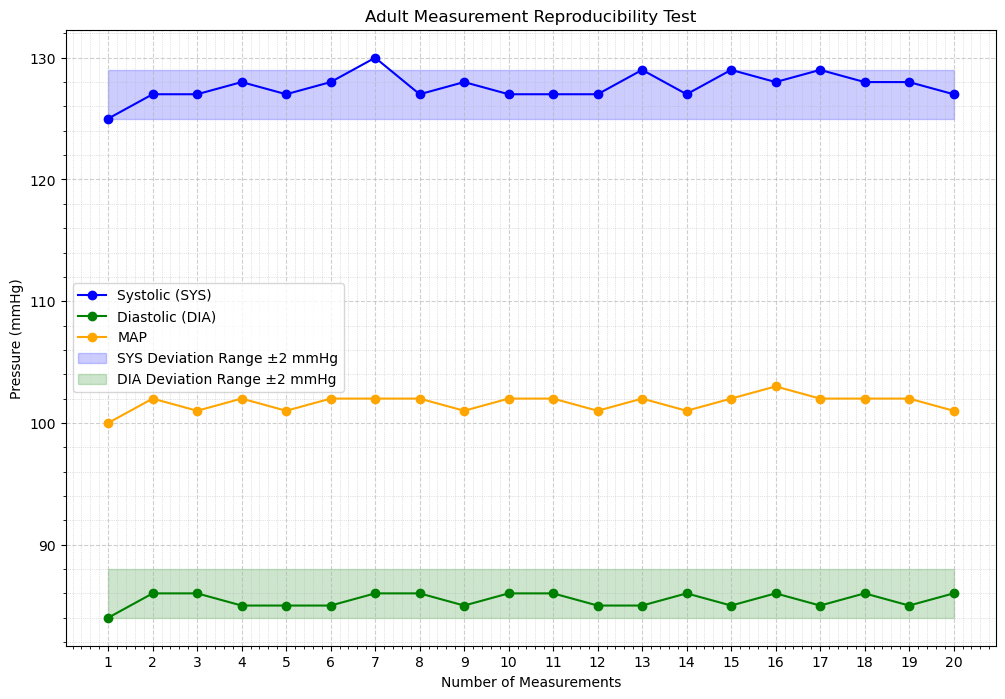

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Time series data for systolic, diastolic, and MAP
times = [
    "01:50:57", "01:51:18", "01:51:38", "01:51:59", "01:52:20", "01:52:41",
    "01:53:01", "01:53:25", "01:53:46", "01:54:07", "01:54:29", "01:54:50",
    "01:55:12", "01:55:33", "01:55:54", "01:56:14", "01:56:34", "01:56:54",
    "01:57:15", "01:57:37"
]

# Convert times to more plot-friendly numerical indices
time_indices = np.arange(len(times))

# Systolic, Diastolic, and MAP values
sys_values = [125, 127, 127, 128, 127, 128, 130, 127, 128, 127, 127, 127, 129, 127, 129, 128, 129, 128, 128, 127]
dia_values = [84, 86, 86, 85, 85, 85, 86, 86, 85, 86, 86, 85, 85, 86, 85, 86, 85, 86, 85, 86]
map_values = [100, 102, 101, 102, 101, 102, 102, 102, 101, 102, 102, 101, 102, 101, 102, 103, 102, 102, 102, 101]

# Deviation thresholds for systolic and diastolic
sys_deviation = 2.0
dia_deviation = 2.0

# Expected baseline values (using a typical adult measurement as reference)
baseline_sys = 127
baseline_dia = 86
baseline_map = 102

# Re-plotting with whole numbers for measurement counts on the x-axis
# Making the visualization more granular and refined for better clarity

plt.figure(figsize=(12, 8))

# Plot Systolic, Diastolic, and MAP as time series
plt.plot(time_indices, sys_values, label='Systolic (SYS)', marker='o', linestyle='-', color='blue')
plt.plot(time_indices, dia_values, label='Diastolic (DIA)', marker='o', linestyle='-', color='green')
plt.plot(time_indices, map_values, label='MAP', marker='o', linestyle='-', color='orange')

# Add shaded areas for acceptable deviation for SYS and DIA
plt.fill_between(time_indices, baseline_sys - sys_deviation, baseline_sys + sys_deviation, color='blue', alpha=0.2, label='SYS Deviation Range ±2 mmHg')
plt.fill_between(time_indices, baseline_dia - dia_deviation, baseline_dia + dia_deviation, color='green', alpha=0.2, label='DIA Deviation Range ±2 mmHg')

# Improving readability of x-axis by setting whole numbers
plt.xticks(time_indices, labels=[str(i+1) for i in time_indices])

# Adding labels and titles
plt.title('Adult Measurement Reproducibility Test')
plt.xlabel('Number of Measurements')
plt.ylabel('Pressure (mmHg)')

# Show grid for better readability and make the grid finer for more granularity
plt.grid(True, linestyle='--', alpha=0.6)
plt.minorticks_on()
plt.grid(which='minor', linestyle=':', linewidth='0.5', alpha=0.7)

# Add legend
plt.legend()

# Show the refined plot
plt.show()


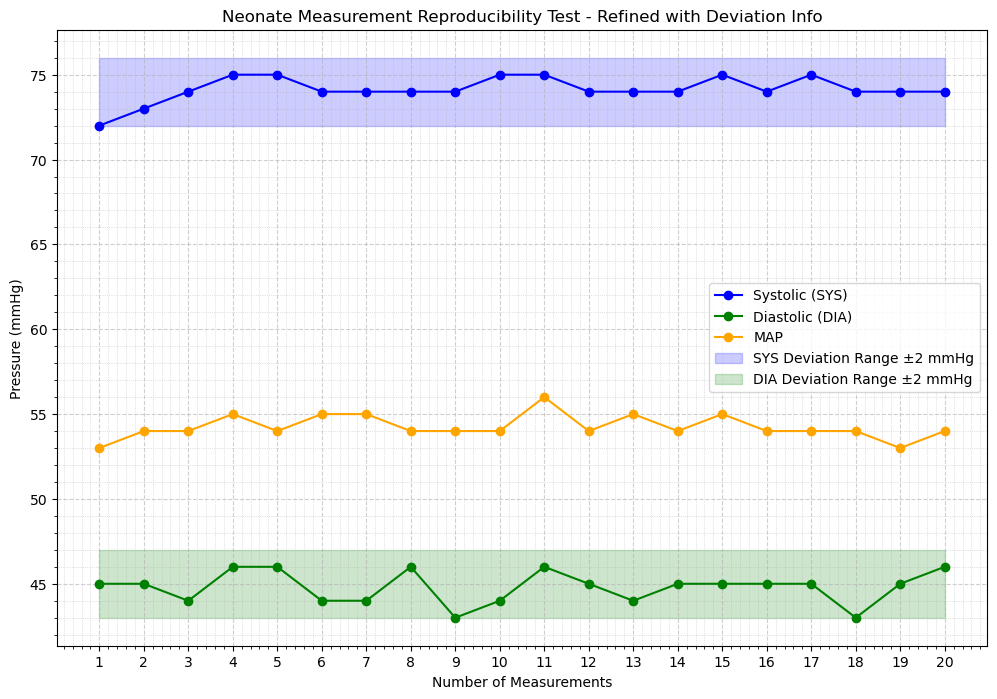

In [12]:
# Neonate measurement data extracted from the logs
times_new = np.arange(1, 21)  # Number of measurements (1 to 20)

# Systolic, Diastolic, and MAP values for the neonate
sys_values_new = [72, 73, 74, 75, 75, 74, 74, 74, 74, 75, 75, 74, 74, 74, 75, 74, 75, 74, 74, 74]
dia_values_new = [45, 45, 44, 46, 46, 44, 44, 46, 43, 44, 46, 45, 44, 45, 45, 45, 45, 43, 45, 46]
map_values_new = [53, 54, 54, 55, 54, 55, 55, 54, 54, 54, 56, 54, 55, 54, 55, 54, 54, 54, 53, 54]

# Deviation thresholds for systolic and diastolic for neonate
sys_deviation_new = 2.0
dia_deviation_new = 2.0

# Expected baseline values (using a typical neonate measurement as reference)
baseline_sys_new = 74
baseline_dia_new = 45
baseline_map_new = 54

# Calculating overall deviation for Systolic (SYS) and Diastolic (DIA) for neonate
sys_deviation_value_new = np.mean(np.abs(np.array(sys_values_new) - baseline_sys_new))
dia_deviation_value_new = np.mean(np.abs(np.array(dia_values_new) - baseline_dia_new))

# Plotting Neonate Systolic, Diastolic, and MAP values over time with deviation information
plt.figure(figsize=(12, 8))

# Plot Systolic, Diastolic, and MAP as time series
plt.plot(times_new, sys_values_new, label='Systolic (SYS)', marker='o', linestyle='-', color='blue')
plt.plot(times_new, dia_values_new, label='Diastolic (DIA)', marker='o', linestyle='-', color='green')
plt.plot(times_new, map_values_new, label='MAP', marker='o', linestyle='-', color='orange')

# Add shaded areas for acceptable deviation for SYS and DIA
plt.fill_between(times_new, baseline_sys_new - sys_deviation_new, baseline_sys_new + sys_deviation_new, color='blue', alpha=0.2, label='SYS Deviation Range ±2 mmHg')
plt.fill_between(times_new, baseline_dia_new - dia_deviation_new, baseline_dia_new + dia_deviation_new, color='green', alpha=0.2, label='DIA Deviation Range ±2 mmHg')

# Improving readability of x-axis by setting whole numbers
plt.xticks(times_new)

# Adding labels and titles
plt.title('Neonate Measurement Reproducibility Test')
plt.xlabel('Number of Measurements')
plt.ylabel('Pressure (mmHg)')

# Show grid for better readability and make the grid finer for more granularity
plt.grid(True, linestyle='--', alpha=0.6)
plt.minorticks_on()
plt.grid(which='minor', linestyle=':', linewidth='0.5', alpha=0.7)

# Add legend
plt.legend()

# Show the refined plot with deviation information for neonate
plt.show()


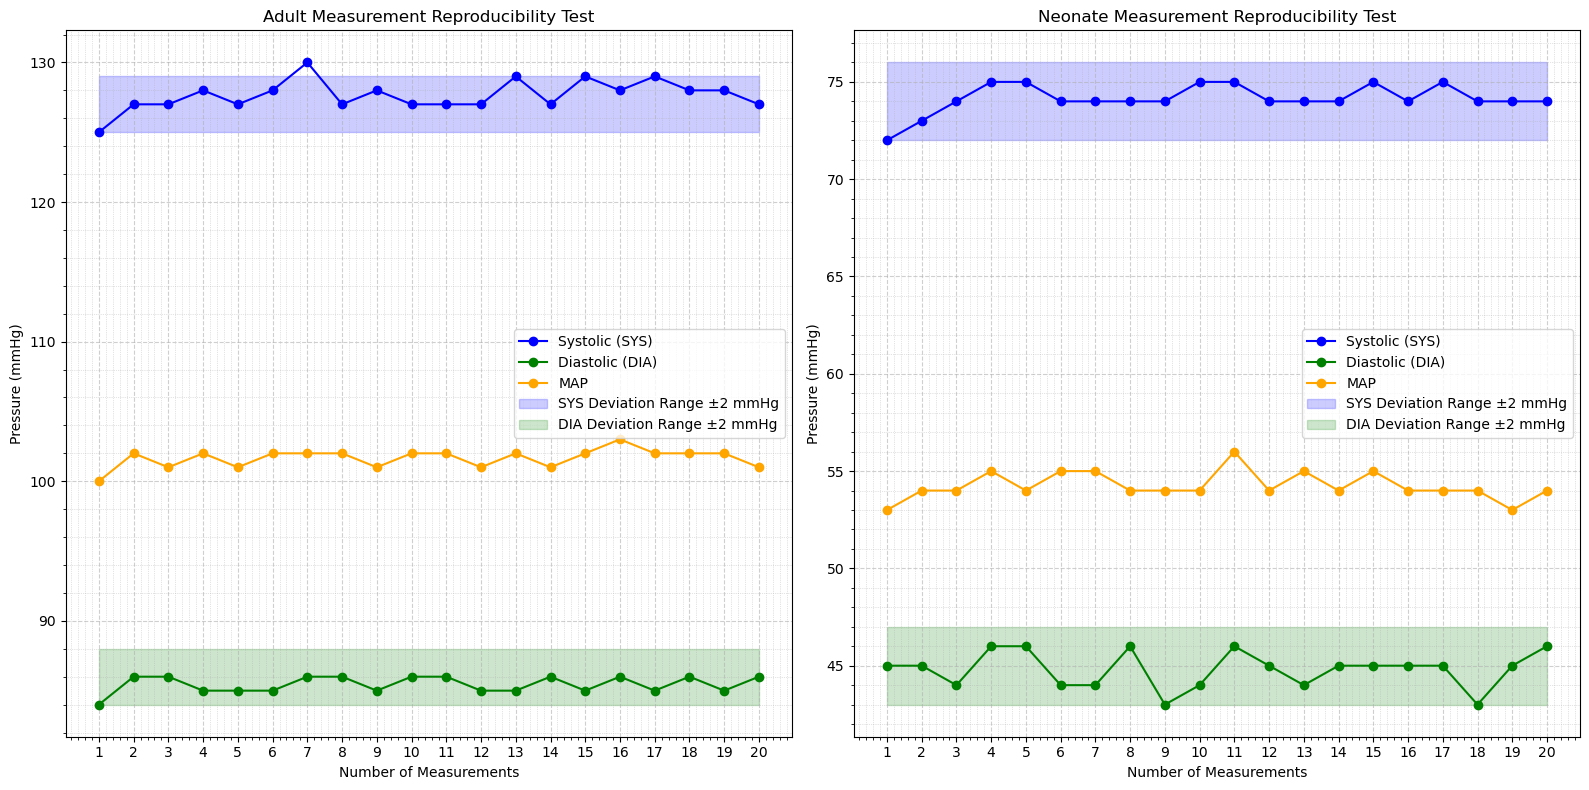

In [14]:
# Re-plotting with clear indication of the number of measurements as whole numbers (1 to 20) on the x-axis

fig, axs = plt.subplots(1, 2, figsize=(16, 8))

# Adult plot
axs[0].plot(times, sys_values, label='Systolic (SYS)', marker='o', linestyle='-', color='blue')
axs[0].plot(times, dia_values, label='Diastolic (DIA)', marker='o', linestyle='-', color='green')
axs[0].plot(times, map_values, label='MAP', marker='o', linestyle='-', color='orange')
axs[0].fill_between(times, baseline_sys - sys_deviation, baseline_sys + sys_deviation, color='blue', alpha=0.2, label='SYS Deviation Range ±2 mmHg')
axs[0].fill_between(times, baseline_dia - dia_deviation, baseline_dia + dia_deviation, color='green', alpha=0.2, label='DIA Deviation Range ±2 mmHg')
axs[0].set_xticks(np.arange(1, 21))
axs[0].set_title('Adult Measurement Reproducibility Test')
axs[0].set_xlabel('Number of Measurements')
axs[0].set_ylabel('Pressure (mmHg)')
axs[0].grid(True, linestyle='--', alpha=0.6)
axs[0].minorticks_on()
axs[0].grid(which='minor', linestyle=':', linewidth='0.5', alpha=0.7)
axs[0].legend()

# Neonate plot
axs[1].plot(times_new, sys_values_new, label='Systolic (SYS)', marker='o', linestyle='-', color='blue')
axs[1].plot(times_new, dia_values_new, label='Diastolic (DIA)', marker='o', linestyle='-', color='green')
axs[1].plot(times_new, map_values_new, label='MAP', marker='o', linestyle='-', color='orange')
axs[1].fill_between(times_new, baseline_sys_new - sys_deviation_new, baseline_sys_new + sys_deviation_new, color='blue', alpha=0.2, label='SYS Deviation Range ±2 mmHg')
axs[1].fill_between(times_new, baseline_dia_new - dia_deviation_new, baseline_dia_new + dia_deviation_new, color='green', alpha=0.2, label='DIA Deviation Range ±2 mmHg')
axs[1].set_xticks(np.arange(1, 21))
axs[1].set_title('Neonate Measurement Reproducibility Test')
axs[1].set_xlabel('Number of Measurements')
axs[1].set_ylabel('Pressure (mmHg)')
axs[1].grid(True, linestyle='--', alpha=0.6)
axs[1].minorticks_on()
axs[1].grid(which='minor', linestyle=':', linewidth='0.5', alpha=0.7)
axs[1].legend()

# Show side by side plots with clear x-axis labels for each measurement
plt.tight_layout()
plt.show()


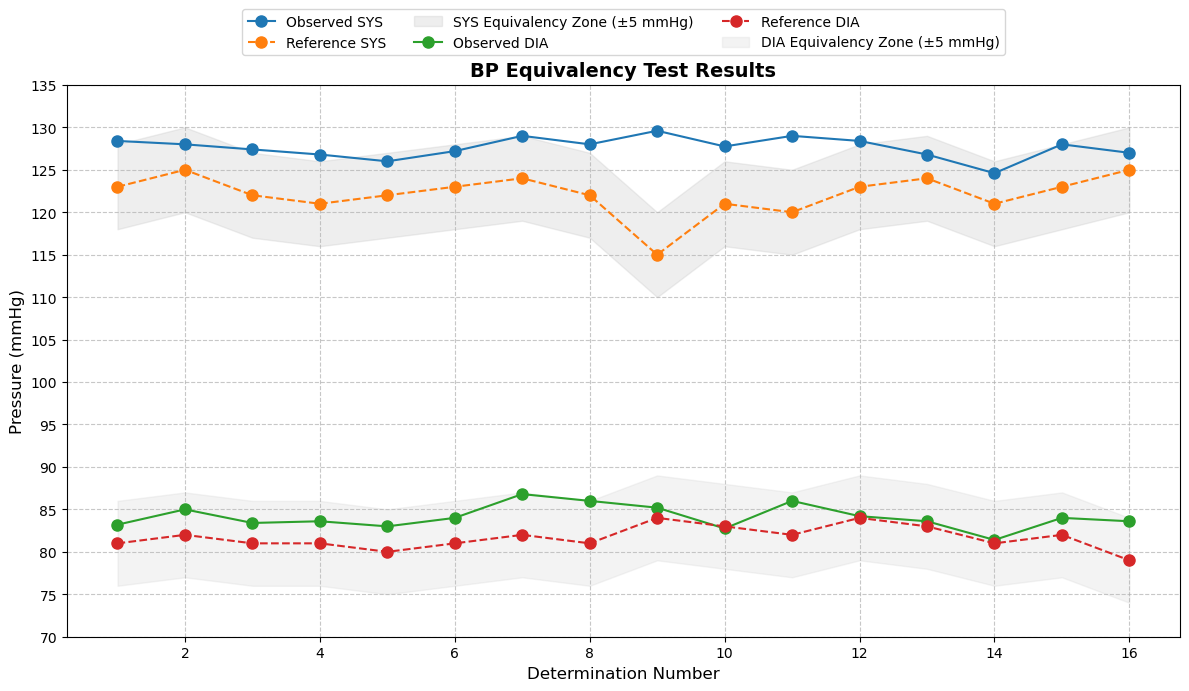

In [34]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data: Errors and standard deviations from the log
observed_sys = [128.4, 128, 127.4, 126.8, 126, 127.2, 129, 128, 129.6, 127.75, 129, 128.4, 126.8, 124.6, 128, 127]
observed_dia = [83.2, 85, 83.4, 83.6, 83, 84, 86.8, 86, 85.2, 82.75, 86, 84.2, 83.6, 81.4, 84, 83.6]
reference_sys = [123, 125, 122, 121, 122, 123, 124, 122, 115, 121, 120, 123, 124, 121, 123, 125]
reference_dia = [81, 82, 81, 81, 80, 81, 82, 81, 84, 83, 82, 84, 83, 81, 82, 79]

# Number of determinations
determinations = np.arange(1, len(observed_sys) + 1)

# Create the plot
plt.figure(figsize=(12, 7))

# Plot SYS
plt.plot(determinations, observed_sys, label='Observed SYS', marker='o', linestyle='-', color='#1f77b4', markersize=8)
plt.plot(determinations, reference_sys, label='Reference SYS', marker='o', linestyle='--', color='#ff7f0e', markersize=8)
plt.fill_between(determinations, np.array(reference_sys) - 5, np.array(reference_sys) + 5, color='#c7c7c7', alpha=0.3, label='SYS Equivalency Zone (±5 mmHg)')

# Plot DIA
plt.plot(determinations, observed_dia, label='Observed DIA', marker='o', linestyle='-', color='#2ca02c', markersize=8)
plt.plot(determinations, reference_dia, label='Reference DIA', marker='o', linestyle='--', color='#d62728', markersize=8)
plt.fill_between(determinations, np.array(reference_dia) - 5, np.array(reference_dia) + 5, color='#c7c7c7', alpha=0.2, label='DIA Equivalency Zone (±5 mmHg)')

# Customize labels and titles
plt.xlabel('Determination Number', fontsize=12)
plt.ylabel('Pressure (mmHg)', fontsize=12)
plt.title('BP Equivalency Test Results', fontsize=14, weight='bold')
plt.grid(True, linestyle='--', alpha=0.7)

# Customize y-axis ticks to be whole numbers
plt.yticks(np.arange(70, 140, 5))

# Show legend outside the plot
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=3, fontsize=10)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


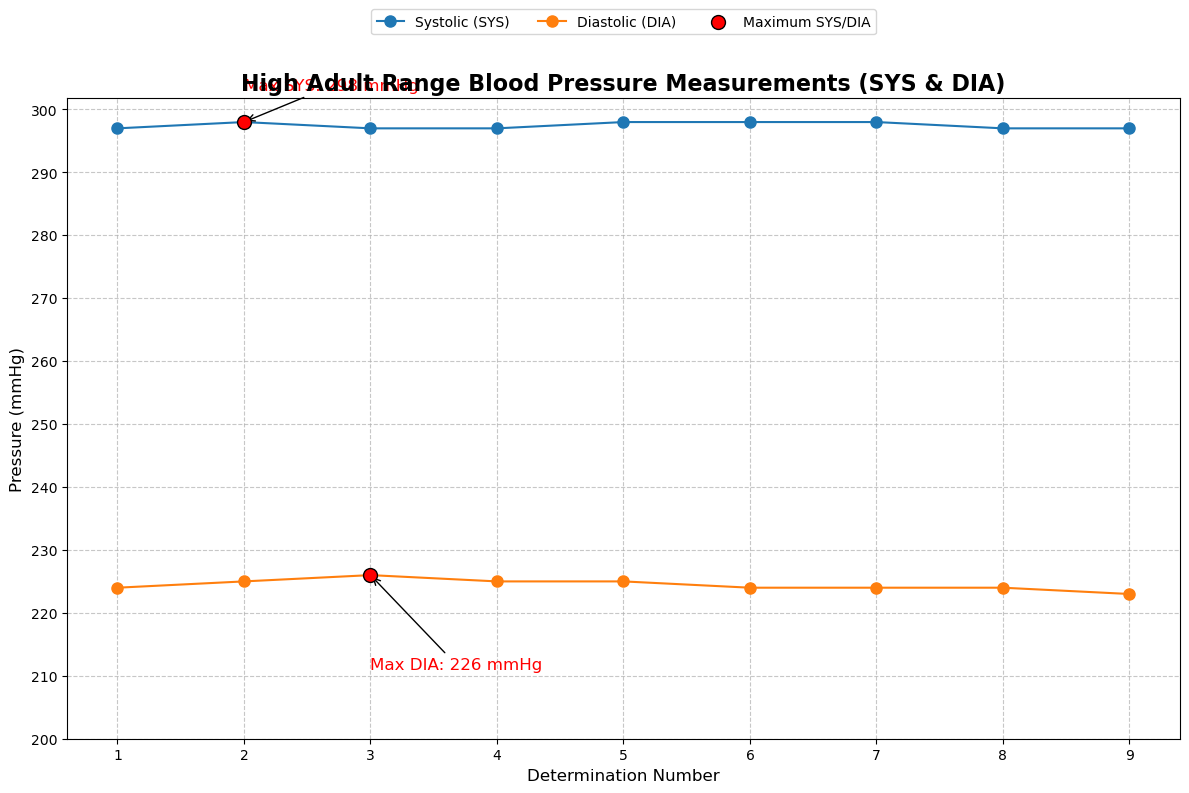

In [35]:
import matplotlib.pyplot as plt
import numpy as np

# Data from the log for SYS, DIA, and MAP
determinations = np.arange(1, 10)
sys_measurements = [297, 298, 297, 297, 298, 298, 298, 297, 297]
dia_measurements = [224, 225, 226, 225, 225, 224, 224, 224, 223]
map_measurements = [252, 253, 254, 253, 253, 254, 253, 253, 254]
pr_measurements = [236, 240, 240, 240, 240, 240, 240, 240, 240]

# Maximum values for highlighting
max_sys = 298
max_dia = 226
max_map = 254

# Create the plot
plt.figure(figsize=(12, 8))

# Plotting SYS and DIA
plt.plot(determinations, sys_measurements, label='Systolic (SYS)', marker='o', linestyle='-', color='#1f77b4', markersize=8)
plt.plot(determinations, dia_measurements, label='Diastolic (DIA)', marker='o', linestyle='-', color='#ff7f0e', markersize=8)

# Highlight the maximum points
plt.scatter([2, 3], [max_sys, max_dia], color='red', label='Maximum SYS/DIA', s=100, edgecolor='black', zorder=5)

# Annotate the maximum points
plt.annotate(f'Max SYS: {max_sys} mmHg', (2, max_sys), xytext=(2, max_sys+5),
             arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=12, color='red')
plt.annotate(f'Max DIA: {max_dia} mmHg', (3, max_dia), xytext=(3, max_dia-15),
             arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=12, color='red')

# Labels, title, and grid
plt.xlabel('Determination Number', fontsize=12)
plt.ylabel('Pressure (mmHg)', fontsize=12)
plt.title('High Adult Range Blood Pressure Measurements (SYS & DIA)', fontsize=16, weight='bold')
plt.grid(True, linestyle='--', alpha=0.7)

# Customize y-axis ticks to be whole numbers
plt.yticks(np.arange(200, 310, 10))

# Legend placement above the plot
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=3, fontsize=10)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


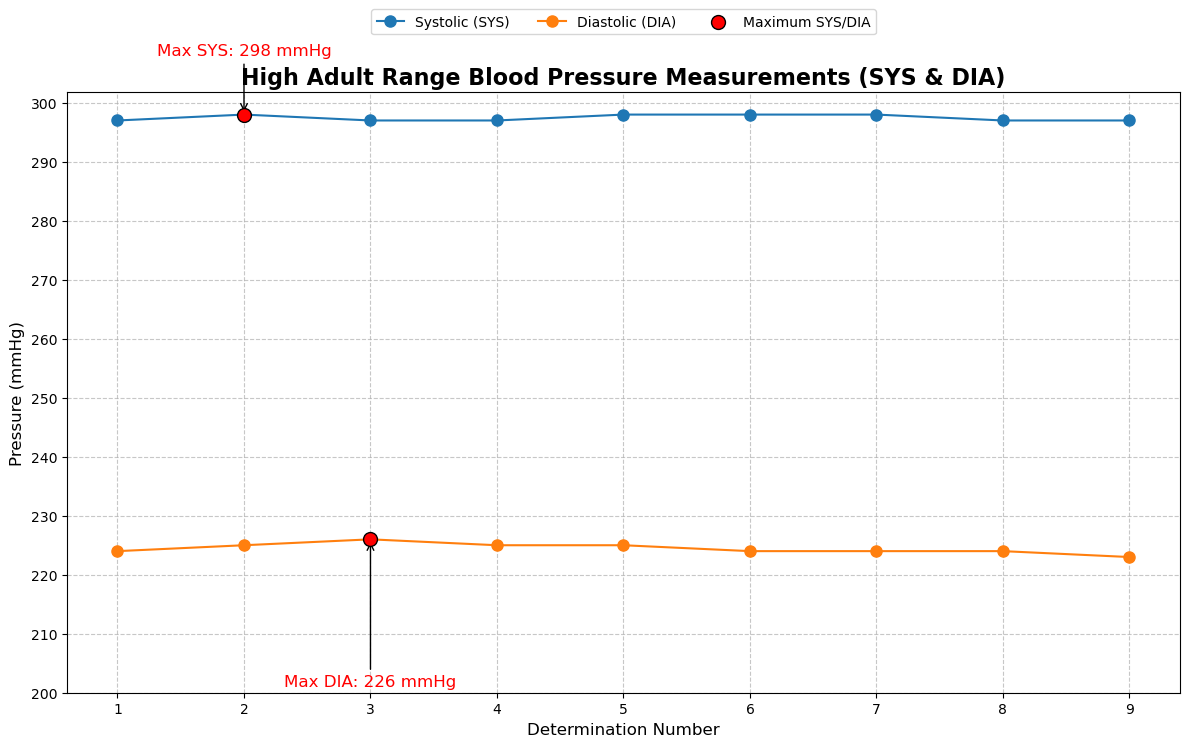

In [40]:
import matplotlib.pyplot as plt
import numpy as np

# Data from the log for SYS, DIA, and MAP
determinations = np.arange(1, 10)
sys_measurements = [297, 298, 297, 297, 298, 298, 298, 297, 297]
dia_measurements = [224, 225, 226, 225, 225, 224, 224, 224, 223]
map_measurements = [252, 253, 254, 253, 253, 254, 253, 253, 254]
pr_measurements = [236, 240, 240, 240, 240, 240, 240, 240, 240]

# Maximum values for highlighting
max_sys = 298
max_dia = 226

# Create the plot
plt.figure(figsize=(12, 8))

# Plotting SYS and DIA
plt.plot(determinations, sys_measurements, label='Systolic (SYS)', marker='o', linestyle='-', color='#1f77b4', markersize=8)
plt.plot(determinations, dia_measurements, label='Diastolic (DIA)', marker='o', linestyle='-', color='#ff7f0e', markersize=8)

# Highlight the maximum points
plt.scatter([2, 3], [max_sys, max_dia], color='red', label='Maximum SYS/DIA', s=100, edgecolor='black', zorder=5)

# Annotate the maximum points, adjusted to avoid going out of bounds
plt.annotate(f'Max SYS: {max_sys} mmHg', (2, max_sys), xytext=(2, max_sys + 10),
             arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=12, color='red', ha='center')

plt.annotate(f'Max DIA: {max_dia} mmHg', (3, max_dia), xytext=(3, max_dia - 25),
             arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=12, color='red', ha='center')

# Labels, title, and grid
plt.xlabel('Determination Number', fontsize=12)
plt.ylabel('Pressure (mmHg)', fontsize=12)
plt.title('High Adult Range Blood Pressure Measurements (SYS & DIA)', fontsize=16, weight='bold')
plt.grid(True, linestyle='--', alpha=0.7)

# Customize y-axis ticks to be whole numbers
plt.yticks(np.arange(200, 310, 10))

# Legend placement above the plot
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=3, fontsize=10)

# Adjust layout to keep everything within bounds
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Show the plot
plt.show()


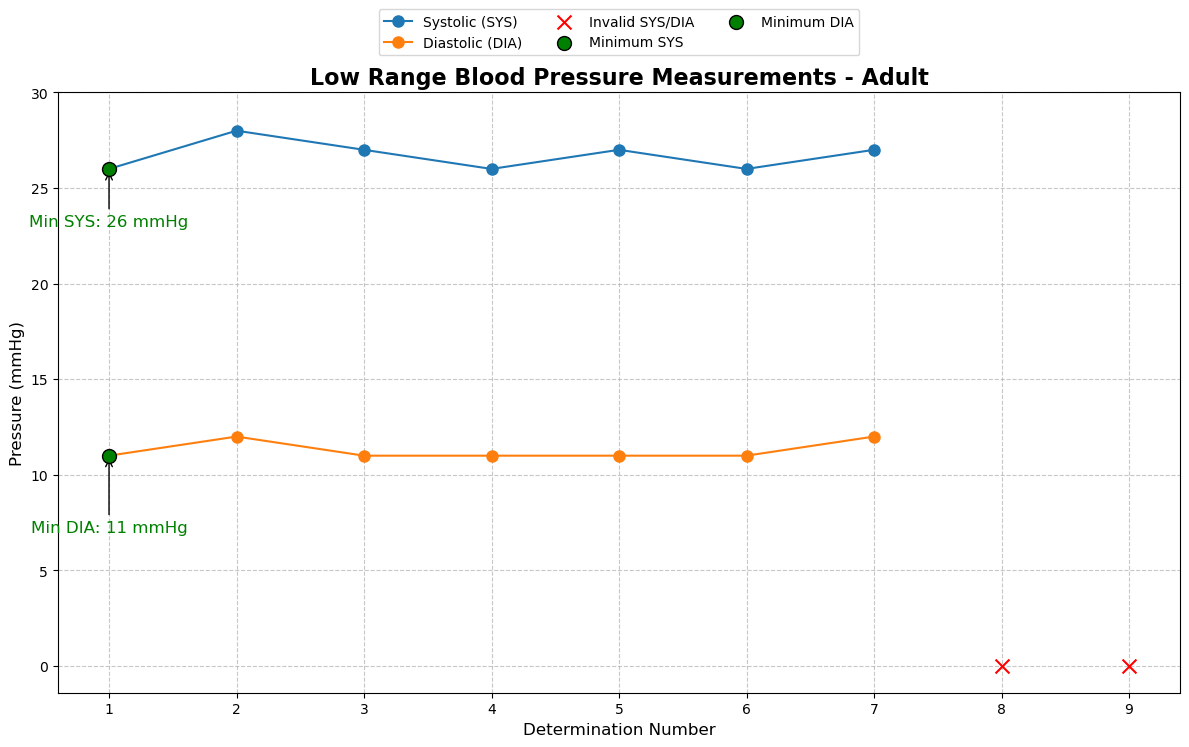

In [50]:
import matplotlib.pyplot as plt
import numpy as np

# Data from the log for SYS, DIA, and MAP
determinations = np.arange(1, 10)
sys_measurements = [26, 28, 27, 26, 27, 26, 27, 0, 0]
dia_measurements = [11, 12, 11, 11, 11, 11, 12, 0, 0]
map_measurements = [16, 17, 16, 16, 16, 16, 17, 0, 0]

# Identifying valid and invalid determinations
valid_determinations = [i+1 for i, sys in enumerate(sys_measurements) if sys != 0]
invalid_determinations = [i+1 for i, sys in enumerate(sys_measurements) if sys == 0]

valid_sys_measurements = [sys for sys in sys_measurements if sys != 0]
invalid_sys_measurements = [sys for sys in sys_measurements if sys == 0]

valid_dia_measurements = [dia for dia in dia_measurements if dia != 0]
invalid_dia_measurements = [dia for dia in dia_measurements if dia == 0]

# Create the plot
plt.figure(figsize=(12, 8))

# Plotting valid SYS and DIA
plt.plot(valid_determinations, valid_sys_measurements, label='Systolic (SYS)', marker='o', linestyle='-', color='#1f77b4', markersize=8)
plt.plot(valid_determinations, valid_dia_measurements, label='Diastolic (DIA)', marker='o', linestyle='-', color='#ff7f0e', markersize=8)

# Plotting invalid SYS and DIA
plt.scatter(invalid_determinations, invalid_sys_measurements, color='red', label='Invalid SYS/DIA', s=100, marker='x', zorder=5)

# Highlight the minimum points
min_sys = min(valid_sys_measurements)
min_dia = min(valid_dia_measurements)

plt.scatter([1], [min_sys], color='green', label='Minimum SYS', s=100, edgecolor='black', zorder=5)
plt.scatter([1], [min_dia], color='green', label='Minimum DIA', s=100, edgecolor='black', zorder=5)

# Annotate the minimum points
plt.annotate(f'Min SYS: {min_sys} mmHg', (1, min_sys), xytext=(1, min_sys - 3),
             arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=12, color='green', ha='center')

plt.annotate(f'Min DIA: {min_dia} mmHg', (1, min_dia), xytext=(1, min_dia - 4),
             arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=12, color='green', ha='center')

# Labels, title, and grid
plt.xlabel('Determination Number', fontsize=12)
plt.ylabel('Pressure (mmHg)', fontsize=12)
plt.title('Low Range Blood Pressure Measurements - Adult', fontsize=16, weight='bold')
plt.grid(True, linestyle='--', alpha=0.7)

# Customize y-axis ticks to be whole numbers
plt.yticks(np.arange(0, 35, 5))

# Legend placement above the plot
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=3, fontsize=10)

# Adjust layout to keep everything within bounds
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Show the plot
plt.show()


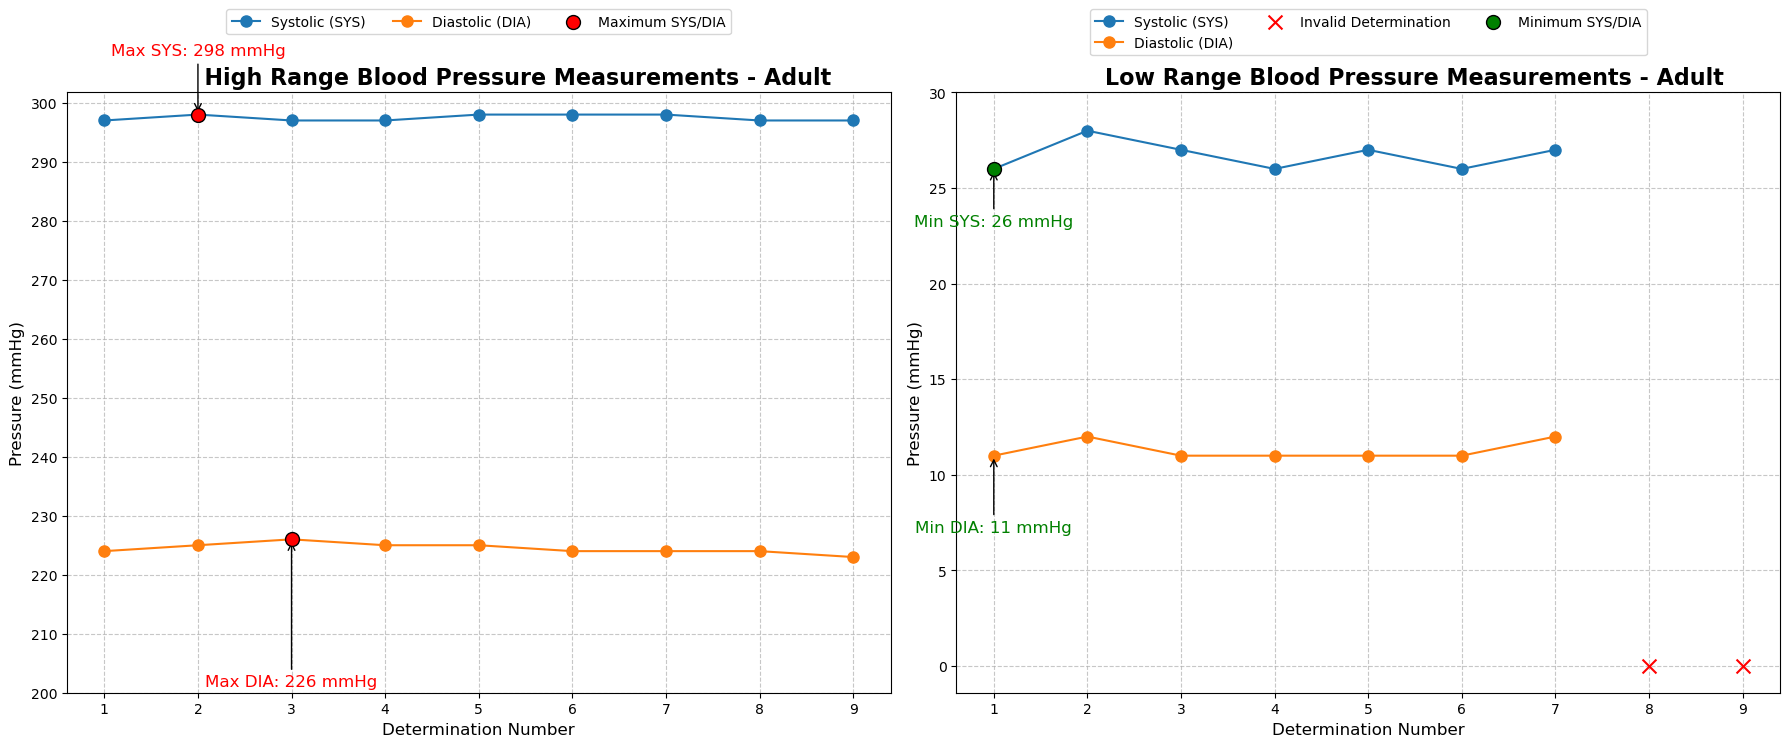

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Data for the high adult range
determinations_high = np.arange(1, 10)
sys_measurements_high = [297, 298, 297, 297, 298, 298, 298, 297, 297]
dia_measurements_high = [224, 225, 226, 225, 225, 224, 224, 224, 223]

# Maximum values for highlighting
max_sys = 298
max_dia = 226

# Data for the low adult range with invalid determinations
determinations_low = np.arange(1, 10)
sys_measurements_low = [26, 28, 27, 26, 27, 26, 27, 0, 0]
dia_measurements_low = [11, 12, 11, 11, 11, 11, 12, 0, 0]

valid_determinations_low = [i+1 for i, sys in enumerate(sys_measurements_low) if sys != 0]
invalid_determinations_low = [i+1 for i, sys in enumerate(sys_measurements_low) if sys == 0]
valid_sys_measurements_low = [sys for sys in sys_measurements_low if sys != 0]
invalid_sys_measurements_low = [sys for sys in sys_measurements_low if sys == 0]
valid_dia_measurements_low = [dia for dia in dia_measurements_low if dia != 0]
invalid_dia_measurements_low = [dia for dia in dia_measurements_low if dia == 0]

min_sys = min(valid_sys_measurements_low)
min_dia = min(valid_dia_measurements_low)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Plot for high adult range
axes[0].plot(determinations_high, sys_measurements_high, label='Systolic (SYS)', marker='o', linestyle='-', color='#1f77b4', markersize=8)
axes[0].plot(determinations_high, dia_measurements_high, label='Diastolic (DIA)', marker='o', linestyle='-', color='#ff7f0e', markersize=8)
axes[0].scatter([2, 3], [max_sys, max_dia], color='red', label='Maximum SYS/DIA', s=100, edgecolor='black', zorder=5)

# Annotate maximum points
axes[0].annotate(f'Max SYS: {max_sys} mmHg', (2, max_sys), xytext=(2, max_sys + 10),
                 arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=12, color='red', ha='center')
axes[0].annotate(f'Max DIA: {max_dia} mmHg', (3, max_dia), xytext=(3, max_dia - 25),
                 arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=12, color='red', ha='center')

# Customize plot
axes[0].set_xlabel('Determination Number', fontsize=12)
axes[0].set_ylabel('Pressure (mmHg)', fontsize=12)
axes[0].set_title('          High Range Blood Pressure Measurements - Adult', fontsize=16, weight='bold')
axes[0].grid(True, linestyle='--', alpha=0.7)
axes[0].set_yticks(np.arange(200, 310, 10))
axes[0].legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=3, fontsize=10)

# Plot for low adult range with invalid determinations
axes[1].plot(valid_determinations_low, valid_sys_measurements_low, label='Systolic (SYS)', marker='o', linestyle='-', color='#1f77b4', markersize=8)
axes[1].plot(valid_determinations_low, valid_dia_measurements_low, label='Diastolic (DIA)', marker='o', linestyle='-', color='#ff7f0e', markersize=8)
axes[1].scatter(invalid_determinations_low, invalid_sys_measurements_low, color='red', label='Invalid Determination', s=100, marker='x', zorder=5)
axes[1].scatter([1], [min_sys], color='green', label='Minimum SYS/DIA', s=100, edgecolor='black', zorder=5)

# Annotate minimum points
axes[1].annotate(f'Min SYS: {min_sys} mmHg', (1, min_sys), xytext=(1, min_sys - 3),
                 arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=12, color='green', ha='center')
axes[1].annotate(f'Min DIA: {min_dia} mmHg', (1, min_dia), xytext=(1, min_dia - 4),
                 arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=12, color='green', ha='center')

# Customize plot
axes[1].set_xlabel('Determination Number', fontsize=12)
axes[1].set_ylabel('Pressure (mmHg)', fontsize=12)
axes[1].set_title('            Low Range Blood Pressure Measurements - Adult', fontsize=16, weight='bold')
axes[1].grid(True, linestyle='--', alpha=0.7)
axes[1].set_yticks(np.arange(0, 35, 5))
axes[1].legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=3, fontsize=10)

# Adjust layout to keep everything within bounds
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Show the plot
plt.show()


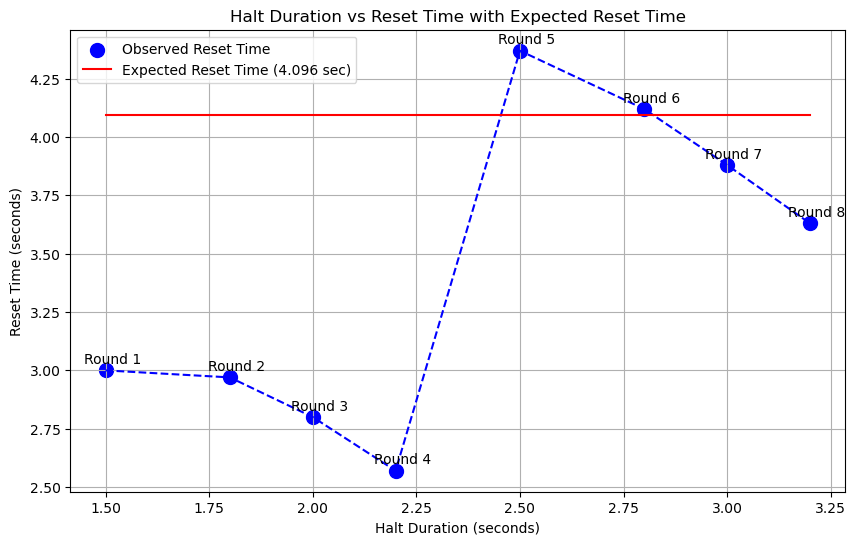

In [9]:
import matplotlib.pyplot as plt

# Data for the plot: Iterations (rounds), Halt Times (in seconds), Observed Reset Times (in seconds), and Expected Reset Time
iterations = list(range(1, 9))  # Round 1 to Round 8
halt_times = [1.5, 1.8, 2.0, 2.2, 2.5, 2.8, 3.0, 3.2]
observed_reset_times = [3.0, 2.97, 2.8, 2.57, 4.37, 4.12, 3.88, 3.63]
expected_reset_time = [4.096] * len(halt_times)  # Constant expected reset time of 4.096 seconds

# Create the scatter plot
plt.figure(figsize=(10, 6))

# Plot observed reset times as scatter and line
plt.scatter(halt_times, observed_reset_times, color='blue', label="Observed Reset Time", s=100)
plt.plot(halt_times, observed_reset_times, color='blue', linestyle='dashed')

# Plot expected reset time as a straight line
plt.plot(halt_times, expected_reset_time, color='red', linestyle='solid', label="Expected Reset Time (4.096 sec)")

# Adding labels and title
plt.xlabel("Halt Duration (seconds)")
plt.ylabel("Reset Time (seconds)")
plt.title("Halt Duration vs Reset Time with Expected Reset Time")

# Adding grid
plt.grid(True)

# Annotating each point with round number
for i, txt in enumerate(iterations):
    plt.annotate(f"Round {txt}", (halt_times[i], observed_reset_times[i]), textcoords="offset points", xytext=(5,5), ha='center')

# Displaying the legend
plt.legend()

# Show plot
plt.show()


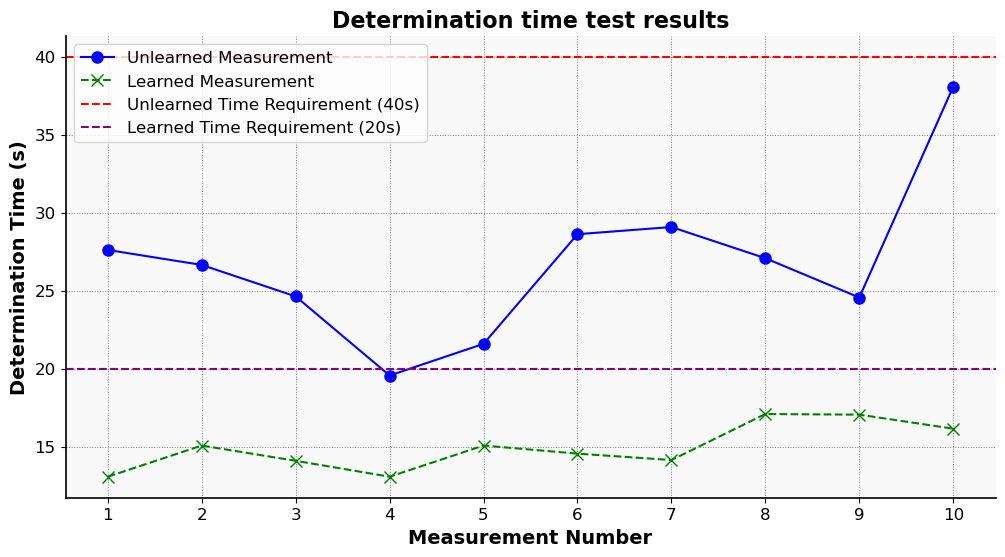

In [4]:
import matplotlib.pyplot as plt
import re

# Sample log data
log_data = """
01:59:40.198 INFO Determination time of unlearned measurement (Simulated blood pressure conditions: SYS=80 mmHg, DIA=50 mmHg,PR=120 bpm,Pulse Volume=1.0 ml) was 27.61 seconds
01:59:58.440 INFO Determination time of learned measurement (Simulated blood pressure conditions: SYS=80 mmHg, DIA=50 mmHg,PR=120 bpm,Pulse Volume=1.0 ml) was 13.07 seconds
02:00:33.544 INFO Determination time of unlearned measurement (Simulated blood pressure conditions: SYS=100 mmHg, DIA=65 mmHg,PR=60 bpm,Pulse Volume=1.0 ml) was 26.65 seconds
02:00:53.720 INFO Determination time of learned measurement (Simulated blood pressure conditions: SYS=100 mmHg, DIA=65 mmHg,PR=60 bpm,Pulse Volume=1.0 ml) was 15.07 seconds
02:01:26.854 INFO Determination time of unlearned measurement (Simulated blood pressure conditions: SYS=110 mmHg, DIA=70 mmHg,PR=90 bpm,Pulse Volume=1.0 ml) was 24.63 seconds
02:01:46.086 INFO Determination time of learned measurement (Simulated blood pressure conditions: SYS=110 mmHg, DIA=70 mmHg,PR=90 bpm,Pulse Volume=1.0 ml) was 14.09 seconds
02:02:14.100 INFO Determination time of unlearned measurement (Simulated blood pressure conditions: SYS=120 mmHg, DIA=80 mmHg,PR=120 bpm,Pulse Volume=1.0 ml) was 19.56 seconds
02:02:32.195 INFO Determination time of learned measurement (Simulated blood pressure conditions: SYS=120 mmHg, DIA=80 mmHg,PR=120 bpm,Pulse Volume=1.0 ml) was 13.07 seconds
02:03:02.243 INFO Determination time of unlearned measurement (Simulated blood pressure conditions: SYS=130 mmHg, DIA=90 mmHg,PR=60 bpm,Pulse Volume=1.0 ml) was 21.59 seconds
02:03:22.418 INFO Determination time of learned measurement (Simulated blood pressure conditions: SYS=130 mmHg, DIA=90 mmHg,PR=60 bpm,Pulse Volume=1.0 ml) was 15.07 seconds
02:03:59.558 INFO Determination time of unlearned measurement (Simulated blood pressure conditions: SYS=140 mmHg, DIA=100 mmHg,PR=90 bpm,Pulse Volume=1.0 ml) was 28.62 seconds
02:04:19.303 INFO Determination time of learned measurement (Simulated blood pressure conditions: SYS=140 mmHg, DIA=100 mmHg,PR=90 bpm,Pulse Volume=1.0 ml) was 14.55 seconds
02:04:56.897 INFO Determination time of unlearned measurement (Simulated blood pressure conditions: SYS=150 mmHg, DIA=105 mmHg,PR=120 bpm,Pulse Volume=1.0 ml) was 29.08 seconds
02:05:16.267 INFO Determination time of learned measurement (Simulated blood pressure conditions: SYS=150 mmHg, DIA=105 mmHg,PR=120 bpm,Pulse Volume=1.0 ml) was 14.14 seconds
02:05:51.757 INFO Determination time of unlearned measurement (Simulated blood pressure conditions: SYS=160 mmHg, DIA=115 mmHg,PR=60 bpm,Pulse Volume=1.0 ml) was 27.08 seconds
02:06:14.032 INFO Determination time of learned measurement (Simulated blood pressure conditions: SYS=160 mmHg, DIA=115 mmHg,PR=60 bpm,Pulse Volume=1.0 ml) was 17.09 seconds
02:06:47.150 INFO Determination time of unlearned measurement (Simulated blood pressure conditions: SYS=180 mmHg, DIA=130 mmHg,PR=90 bpm,Pulse Volume=1.0 ml) was 24.56 seconds
02:07:09.351 INFO Determination time of learned measurement (Simulated blood pressure conditions: SYS=180 mmHg, DIA=130 mmHg,PR=90 bpm,Pulse Volume=1.0 ml) was 17.05 seconds
02:07:55.489 INFO Determination time of unlearned measurement (Simulated blood pressure conditions: SYS=200 mmHg, DIA=150 mmHg,PR=120 bpm,Pulse Volume=1.0 ml) was 38.08 seconds
02:08:17.138 INFO Determination time of learned measurement (Simulated blood pressure conditions: SYS=200 mmHg, DIA=150 mmHg,PR=120 bpm,Pulse Volume=1.0 ml) was 16.15 seconds
"""

# Regular expression to match determination times
unlearned_pattern = re.compile(r"Determination time of unlearned measurement.*?was (\d+\.\d+) seconds")
learned_pattern = re.compile(r"Determination time of learned measurement.*?was (\d+\.\d+) seconds")

# Extract data points
unlearned_times = [float(match) for match in unlearned_pattern.findall(log_data)]
learned_times = [float(match) for match in learned_pattern.findall(log_data)]

# Generate x-axis indices for plotting
unlearned_indices = list(range(1, len(unlearned_times) + 1))
learned_indices = list(range(1, len(learned_times) + 1))

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(unlearned_indices, unlearned_times, marker='o', linestyle='-', color='b', label='Unlearned Measurement', markersize=8)
plt.plot(learned_indices, learned_times, marker='x', linestyle='--', color='g', label='Learned Measurement', markersize=8)
plt.axhline(40, color='r', linestyle='--', linewidth=1.5, label='Unlearned Time Requirement (40s)')
plt.axhline(20, color='purple', linestyle='--', linewidth=1.5, label='Learned Time Requirement (20s)')

# Adding labels and title with enhanced styling
plt.xlabel('Measurement Number', fontsize=14, fontweight='bold')
plt.ylabel('Determination Time (s)', fontsize=14, fontweight='bold')
plt.title('Determination time test results', fontsize=16, fontweight='bold')
plt.legend(loc='upper left', fontsize=12)
plt.grid(True, linestyle=':', linewidth=0.7, color='gray')

# Improving x and y-axis ticks
plt.xticks(ticks=unlearned_indices, fontsize=12)
plt.yticks(fontsize=12)

# Adding background color for the plot area
plt.gca().set_facecolor('#f9f9f9')

# Adding a light border around the plot
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_linewidth(1.2)
plt.gca().spines['bottom'].set_linewidth(1.2)

# Show plot
plt.show()


Statistical Summary:
                           Timestamp         SYS        DIA         MAP  \
count                             79   79.000000  79.000000   79.000000   
mean   2024-08-03 06:57:09.700012800  124.139241  83.962025   99.443038   
min       2024-08-02 21:03:00.837000  121.000000  79.000000   98.000000   
25%    2024-08-03 01:59:41.358000128  124.000000  84.000000   99.000000   
50%    2024-08-03 06:57:44.004999936  124.000000  84.000000   99.000000   
75%    2024-08-03 11:54:17.159500032  125.000000  85.000000  100.000000   
max       2024-08-03 16:50:53.471000  125.000000  86.000000  101.000000   
std                              NaN    0.858355   1.137282    0.548818   

              PR   MQI  Determination Time  Elapsed Time (hours)  
count  79.000000  79.0           79.000000             79.000000  
mean   60.012658   0.0           12.846835              9.902462  
min    60.000000   0.0           11.000000              0.000000  
25%    60.000000   0.0           11

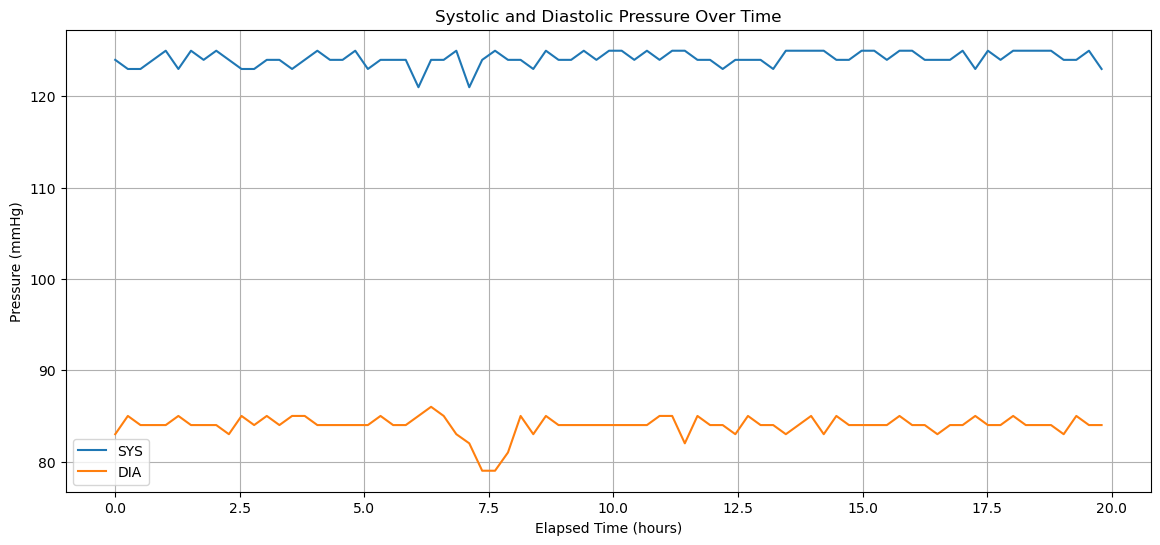

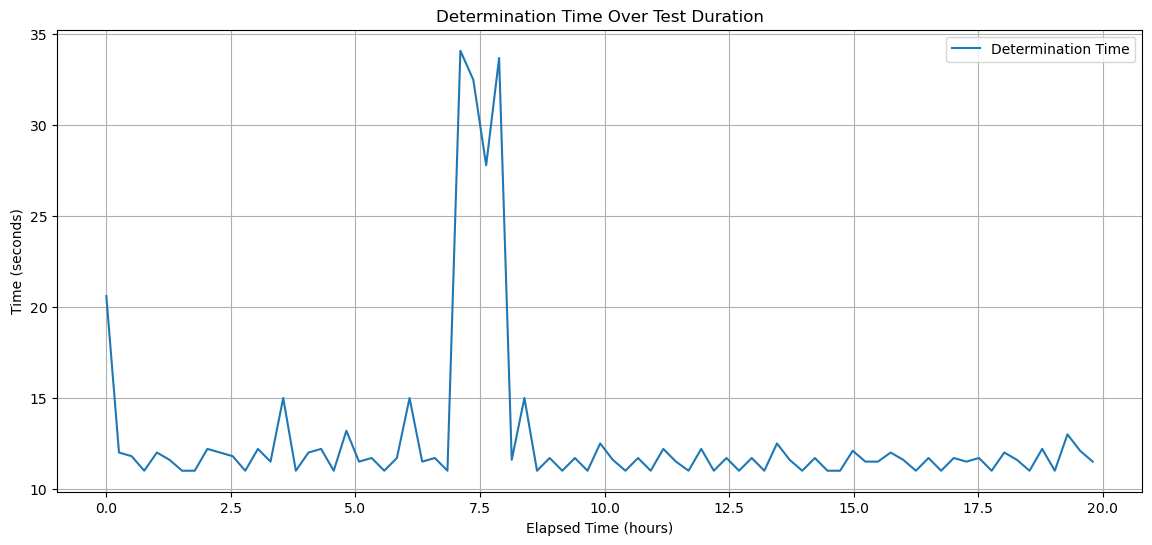

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import re

# Raw data as a multi-line string (for demonstration purposes)
data = '''
21:02:30.647 	INFO 	PDS: Connected to patient data simulator (PDS) 	
21:02:33.701 	INFO 	PDS: Toggle NIBP simulation ON 	
21:02:34.720 	INFO 	PDS: Set dynamic systolic/diastolic pressure: 120/80 mmHg 	
21:02:35.739 	INFO 	PDS: Set normal ECG sinus rhythm to 60 bpm (+/- 1%) 	
21:02:36.761 	INFO 	PDS: Set NIBP pulse volume to: 1 mL 	
21:02:40.277 	INFO 	Sensor associated to simulated HUB with HUB UID = 0x7061756c636f6f6c 	
21:02:40.293 	INFO 	Host request: Start manual measurement 	
21:03:00.837 	INFO 	Measurement completed: DeterminationResult(ESYS=0, SYS=124, DIA=83, MAP=99, PR=60, MQI=0) 	
21:03:00.838 	INFO 	DeterminationResult(ESYS=0, SYS=124, DIA=83, MAP=99, PR=60, MQI=0) 	
21:03:00.838 	INFO 	Determination time: 20.6 	
21:18:01.813 	INFO 	Host request: Start manual measurement 	
21:18:13.828 	INFO 	Measurement completed: DeterminationResult(ESYS=0, SYS=123, DIA=85, MAP=99, PR=60, MQI=0) 	
21:18:13.829 	INFO 	DeterminationResult(ESYS=0, SYS=123, DIA=85, MAP=99, PR=60, MQI=0) 	
21:18:13.829 	INFO 	Determination time: 12.0 	
21:33:14.828 	INFO 	Host request: Start manual measurement 	
21:33:26.590 	INFO 	Measurement completed: DeterminationResult(ESYS=0, SYS=123, DIA=84, MAP=99, PR=60, MQI=0) 	
21:33:26.590 	INFO 	DeterminationResult(ESYS=0, SYS=123, DIA=84, MAP=99, PR=60, MQI=0) 	
21:33:26.590 	INFO 	Determination time: 11.8 	
21:48:27.593 	INFO 	Host request: Start manual measurement 	
21:48:38.606 	INFO 	Measurement completed: DeterminationResult(ESYS=0, SYS=124, DIA=84, MAP=99, PR=60, MQI=0) 	
21:48:38.606 	INFO 	DeterminationResult(ESYS=0, SYS=124, DIA=84, MAP=99, PR=60, MQI=0) 	
21:48:38.606 	INFO 	Determination time: 11.0 	
22:03:39.604 	INFO 	Host request: Start manual measurement 	
22:03:51.626 	INFO 	Measurement completed: DeterminationResult(ESYS=0, SYS=125, DIA=84, MAP=99, PR=60, MQI=0) 	
22:03:51.626 	INFO 	DeterminationResult(ESYS=0, SYS=125, DIA=84, MAP=99, PR=60, MQI=0) 	
22:03:51.626 	INFO 	Determination time: 12.0 	
22:18:52.626 	INFO 	Host request: Start manual measurement 	
22:19:04.196 	INFO 	Measurement completed: DeterminationResult(ESYS=0, SYS=123, DIA=85, MAP=99, PR=60, MQI=0) 	
22:19:04.196 	INFO 	DeterminationResult(ESYS=0, SYS=123, DIA=85, MAP=99, PR=60, MQI=0) 	
22:19:04.196 	INFO 	Determination time: 11.6 	
22:34:05.158 	INFO 	Host request: Start manual measurement 	
22:34:16.172 	INFO 	Measurement completed: DeterminationResult(ESYS=0, SYS=125, DIA=84, MAP=100, PR=60, MQI=0) 	
22:34:16.172 	INFO 	DeterminationResult(ESYS=0, SYS=125, DIA=84, MAP=100, PR=60, MQI=0) 	
22:34:16.172 	INFO 	Determination time: 11.0 	
22:49:17.170 	INFO 	Host request: Start manual measurement 	
22:49:28.183 	INFO 	Measurement completed: DeterminationResult(ESYS=0, SYS=124, DIA=84, MAP=100, PR=60, MQI=0) 	
22:49:28.184 	INFO 	DeterminationResult(ESYS=0, SYS=124, DIA=84, MAP=100, PR=60, MQI=0) 	
22:49:28.184 	INFO 	Determination time: 11.0 	
23:04:29.179 	INFO 	Host request: Start manual measurement 	
23:04:41.339 	INFO 	Measurement completed: DeterminationResult(ESYS=0, SYS=125, DIA=84, MAP=100, PR=60, MQI=0) 	
23:04:41.340 	INFO 	DeterminationResult(ESYS=0, SYS=125, DIA=84, MAP=100, PR=60, MQI=0) 	
23:04:41.340 	INFO 	Determination time: 12.2 	
23:19:42.328 	INFO 	Host request: Start manual measurement 	
23:19:54.343 	INFO 	Measurement completed: DeterminationResult(ESYS=0, SYS=124, DIA=83, MAP=99, PR=60, MQI=0) 	
23:19:54.344 	INFO 	DeterminationResult(ESYS=0, SYS=124, DIA=83, MAP=99, PR=60, MQI=0) 	
23:19:54.344 	INFO 	Determination time: 12.0 	
23:34:55.336 	INFO 	Host request: Start manual measurement 	
23:35:07.094 	INFO 	Measurement completed: DeterminationResult(ESYS=0, SYS=123, DIA=85, MAP=100, PR=60, MQI=0) 	
23:35:07.094 	INFO 	DeterminationResult(ESYS=0, SYS=123, DIA=85, MAP=100, PR=60, MQI=0) 	
23:35:07.095 	INFO 	Determination time: 11.8 	
23:50:08.089 	INFO 	Host request: Start manual measurement 	
23:50:19.103 	INFO 	Measurement completed: DeterminationResult(ESYS=0, SYS=123, DIA=84, MAP=99, PR=60, MQI=0) 	
23:50:19.103 	INFO 	DeterminationResult(ESYS=0, SYS=123, DIA=84, MAP=99, PR=60, MQI=0) 	
23:50:19.104 	INFO 	Determination time: 11.0 	
00:05:20.050 	INFO 	Host request: Start manual measurement 	
00:05:32.222 	INFO 	Measurement completed: DeterminationResult(ESYS=0, SYS=124, DIA=85, MAP=100, PR=60, MQI=0) 	
00:05:32.223 	INFO 	DeterminationResult(ESYS=0, SYS=124, DIA=85, MAP=100, PR=60, MQI=0) 	
00:05:32.223 	INFO 	Determination time: 12.2 	
00:20:33.162 	INFO 	Host request: Start manual measurement 	
00:20:44.702 	INFO 	Measurement completed: DeterminationResult(ESYS=0, SYS=124, DIA=84, MAP=99, PR=60, MQI=0) 	
00:20:44.702 	INFO 	DeterminationResult(ESYS=0, SYS=124, DIA=84, MAP=99, PR=60, MQI=0) 	
00:20:44.702 	INFO 	Determination time: 11.5 	
00:35:45.675 	INFO 	Host request: Start manual measurement 	
00:36:00.693 	INFO 	Measurement completed: DeterminationResult(ESYS=0, SYS=123, DIA=85, MAP=99, PR=60, MQI=0) 	
00:36:00.693 	INFO 	DeterminationResult(ESYS=0, SYS=123, DIA=85, MAP=99, PR=60, MQI=0) 	
00:36:00.693 	INFO 	Determination time: 15.0 	
00:51:01.675 	INFO 	Host request: Start manual measurement 	
00:51:12.689 	INFO 	Measurement completed: DeterminationResult(ESYS=0, SYS=124, DIA=85, MAP=100, PR=60, MQI=0) 	
00:51:12.689 	INFO 	DeterminationResult(ESYS=0, SYS=124, DIA=85, MAP=100, PR=60, MQI=0) 	
00:51:12.689 	INFO 	Determination time: 11.0 	
01:06:13.668 	INFO 	Host request: Start manual measurement 	
01:06:25.705 	INFO 	Measurement completed: DeterminationResult(ESYS=0, SYS=125, DIA=84, MAP=100, PR=60, MQI=0) 	
01:06:25.706 	INFO 	DeterminationResult(ESYS=0, SYS=125, DIA=84, MAP=100, PR=60, MQI=0) 	
01:06:25.706 	INFO 	Determination time: 12.0 	
01:21:26.700 	INFO 	Host request: Start manual measurement 	
01:21:38.865 	INFO 	Measurement completed: DeterminationResult(ESYS=0, SYS=124, DIA=84, MAP=99, PR=60, MQI=0) 	
01:21:38.866 	INFO 	DeterminationResult(ESYS=0, SYS=124, DIA=84, MAP=99, PR=60, MQI=0) 	
01:21:38.866 	INFO 	Determination time: 12.2 	
01:36:39.875 	INFO 	Host request: Start manual measurement 	
01:36:50.889 	INFO 	Measurement completed: DeterminationResult(ESYS=0, SYS=124, DIA=84, MAP=99, PR=60, MQI=0) 	
01:36:50.889 	INFO 	DeterminationResult(ESYS=0, SYS=124, DIA=84, MAP=99, PR=60, MQI=0) 	
01:36:50.889 	INFO 	Determination time: 11.0 	
01:51:51.884 	INFO 	Host request: Start manual measurement 	
01:52:05.097 	INFO 	Measurement completed: DeterminationResult(ESYS=0, SYS=125, DIA=84, MAP=99, PR=60, MQI=0) 	
01:52:05.097 	INFO 	DeterminationResult(ESYS=0, SYS=125, DIA=84, MAP=99, PR=60, MQI=0) 	
01:52:05.097 	INFO 	Determination time: 13.2 	
02:07:06.105 	INFO 	Host request: Start manual measurement 	
02:07:17.619 	INFO 	Measurement completed: DeterminationResult(ESYS=0, SYS=123, DIA=84, MAP=99, PR=60, MQI=0) 	
02:07:17.620 	INFO 	DeterminationResult(ESYS=0, SYS=123, DIA=84, MAP=99, PR=60, MQI=0) 	
02:07:17.620 	INFO 	Determination time: 11.5 	
02:22:18.637 	INFO 	Host request: Start manual measurement 	
02:22:30.372 	INFO 	Measurement completed: DeterminationResult(ESYS=0, SYS=124, DIA=85, MAP=100, PR=60, MQI=0) 	
02:22:30.373 	INFO 	DeterminationResult(ESYS=0, SYS=124, DIA=85, MAP=100, PR=60, MQI=0) 	
02:22:30.373 	INFO 	Determination time: 11.7 	
02:37:31.380 	INFO 	Host request: Start manual measurement 	
02:37:42.394 	INFO 	Measurement completed: DeterminationResult(ESYS=0, SYS=124, DIA=84, MAP=99, PR=60, MQI=0) 	
02:37:42.394 	INFO 	DeterminationResult(ESYS=0, SYS=124, DIA=84, MAP=99, PR=60, MQI=0) 	
02:37:42.394 	INFO 	Determination time: 11.0 	
02:52:43.388 	INFO 	Host request: Start manual measurement 	
02:52:55.101 	INFO 	Measurement completed: DeterminationResult(ESYS=0, SYS=124, DIA=84, MAP=100, PR=60, MQI=0) 	
02:52:55.102 	INFO 	DeterminationResult(ESYS=0, SYS=124, DIA=84, MAP=100, PR=60, MQI=0) 	
02:52:55.102 	INFO 	Determination time: 11.7 	
03:07:56.103 	INFO 	Host request: Start manual measurement 	
03:08:11.122 	INFO 	Measurement completed: DeterminationResult(ESYS=0, SYS=121, DIA=85, MAP=99, PR=60, MQI=0) 	
03:08:11.122 	INFO 	DeterminationResult(ESYS=0, SYS=121, DIA=85, MAP=99, PR=60, MQI=0) 	
03:08:11.122 	INFO 	Determination time: 15.0 	
03:23:12.125 	INFO 	Host request: Start manual measurement 	
03:23:23.640 	INFO 	Measurement completed: DeterminationResult(ESYS=0, SYS=124, DIA=86, MAP=100, PR=60, MQI=0) 	
03:23:23.640 	INFO 	DeterminationResult(ESYS=0, SYS=124, DIA=86, MAP=100, PR=60, MQI=0) 	
03:23:23.640 	INFO 	Determination time: 11.5 	
03:38:24.640 	INFO 	Host request: Start manual measurement 	
03:38:36.339 	INFO 	Measurement completed: DeterminationResult(ESYS=0, SYS=124, DIA=85, MAP=101, PR=60, MQI=0) 	
03:38:36.339 	INFO 	DeterminationResult(ESYS=0, SYS=124, DIA=85, MAP=101, PR=60, MQI=0) 	
03:38:36.339 	INFO 	Determination time: 11.7 	
03:53:37.347 	INFO 	Host request: Start manual measurement 	
03:53:48.361 	INFO 	Measurement completed: DeterminationResult(ESYS=0, SYS=125, DIA=83, MAP=99, PR=60, MQI=0) 	
03:53:48.361 	INFO 	DeterminationResult(ESYS=0, SYS=125, DIA=83, MAP=99, PR=60, MQI=0) 	
03:53:48.361 	INFO 	Determination time: 11.0 	
04:08:49.359 	INFO 	Host request: Start manual measurement 	
04:09:23.414 	INFO 	Measurement completed: DeterminationResult(ESYS=0, SYS=121, DIA=82, MAP=98, PR=60, MQI=0) 	
04:09:23.414 	INFO 	DeterminationResult(ESYS=0, SYS=121, DIA=82, MAP=98, PR=60, MQI=0) 	
04:09:23.414 	INFO 	Determination time: 34.1 	
04:24:24.416 	INFO 	Host request: Start manual measurement 	
04:24:56.964 	INFO 	Measurement completed: DeterminationResult(ESYS=0, SYS=124, DIA=79, MAP=99, PR=60, MQI=0) 	
04:24:56.964 	INFO 	DeterminationResult(ESYS=0, SYS=124, DIA=79, MAP=99, PR=60, MQI=0) 	
04:24:56.964 	INFO 	Determination time: 32.5 	
04:39:57.969 	INFO 	Host request: Start manual measurement 	
04:40:25.749 	INFO 	Measurement completed: DeterminationResult(ESYS=0, SYS=125, DIA=79, MAP=99, PR=60, MQI=0) 	
04:40:25.749 	INFO 	DeterminationResult(ESYS=0, SYS=125, DIA=79, MAP=99, PR=60, MQI=0) 	
04:40:25.749 	INFO 	Determination time: 27.8 	
04:55:26.758 	INFO 	Host request: Start manual measurement 	
04:56:00.436 	INFO 	Measurement completed: DeterminationResult(ESYS=0, SYS=124, DIA=81, MAP=99, PR=60, MQI=0) 	
04:56:00.436 	INFO 	DeterminationResult(ESYS=0, SYS=124, DIA=81, MAP=99, PR=60, MQI=0) 	
04:56:00.436 	INFO 	Determination time: 33.7 	
05:11:01.430 	INFO 	Host request: Start manual measurement 	
05:11:13.006 	INFO 	Measurement completed: DeterminationResult(ESYS=0, SYS=124, DIA=85, MAP=100, PR=60, MQI=0) 	
05:11:13.006 	INFO 	DeterminationResult(ESYS=0, SYS=124, DIA=85, MAP=100, PR=60, MQI=0) 	
05:11:13.006 	INFO 	Determination time: 11.6 	
05:26:13.992 	INFO 	Host request: Start manual measurement 	
05:26:29.010 	INFO 	Measurement completed: DeterminationResult(ESYS=0, SYS=123, DIA=83, MAP=99, PR=60, MQI=0) 	
05:26:29.010 	INFO 	DeterminationResult(ESYS=0, SYS=123, DIA=83, MAP=99, PR=60, MQI=0) 	
05:26:29.010 	INFO 	Determination time: 15.0 	
05:41:30.010 	INFO 	Host request: Start manual measurement 	
05:41:41.024 	INFO 	Measurement completed: DeterminationResult(ESYS=0, SYS=125, DIA=85, MAP=100, PR=60, MQI=0) 	
05:41:41.025 	INFO 	DeterminationResult(ESYS=0, SYS=125, DIA=85, MAP=100, PR=60, MQI=0) 	
05:41:41.025 	INFO 	Determination time: 11.0 	
05:56:42.031 	INFO 	Host request: Start manual measurement 	
05:56:53.749 	INFO 	Measurement completed: DeterminationResult(ESYS=0, SYS=124, DIA=84, MAP=99, PR=60, MQI=0) 	
05:56:53.749 	INFO 	DeterminationResult(ESYS=0, SYS=124, DIA=84, MAP=99, PR=60, MQI=0) 	
05:56:53.749 	INFO 	Determination time: 11.7 	
06:11:54.755 	INFO 	Host request: Start manual measurement 	
06:12:05.769 	INFO 	Measurement completed: DeterminationResult(ESYS=0, SYS=124, DIA=84, MAP=99, PR=60, MQI=0) 	
06:12:05.769 	INFO 	DeterminationResult(ESYS=0, SYS=124, DIA=84, MAP=99, PR=60, MQI=0) 	
06:12:05.769 	INFO 	Determination time: 11.0 	
06:27:06.774 	INFO 	Host request: Start manual measurement 	
06:27:18.479 	INFO 	Measurement completed: DeterminationResult(ESYS=0, SYS=125, DIA=84, MAP=99, PR=60, MQI=0) 	
06:27:18.479 	INFO 	DeterminationResult(ESYS=0, SYS=125, DIA=84, MAP=99, PR=60, MQI=0) 	
06:27:18.479 	INFO 	Determination time: 11.7 	
06:42:19.473 	INFO 	Host request: Start manual measurement 	
06:42:30.487 	INFO 	Measurement completed: DeterminationResult(ESYS=0, SYS=124, DIA=84, MAP=99, PR=60, MQI=0) 	
06:42:30.487 	INFO 	DeterminationResult(ESYS=0, SYS=124, DIA=84, MAP=99, PR=60, MQI=0) 	
06:42:30.487 	INFO 	Determination time: 11.0 	
06:57:31.487 	INFO 	Host request: Start manual measurement 	
06:57:44.005 	INFO 	Measurement completed: DeterminationResult(ESYS=0, SYS=125, DIA=84, MAP=100, PR=60, MQI=0) 	
06:57:44.006 	INFO 	DeterminationResult(ESYS=0, SYS=125, DIA=84, MAP=100, PR=60, MQI=0) 	
06:57:44.006 	INFO 	Determination time: 12.5 	
07:12:45.009 	INFO 	Host request: Start manual measurement 	
07:12:56.598 	INFO 	Measurement completed: DeterminationResult(ESYS=0, SYS=125, DIA=84, MAP=99, PR=60, MQI=0) 	
07:12:56.598 	INFO 	DeterminationResult(ESYS=0, SYS=125, DIA=84, MAP=99, PR=60, MQI=0) 	
07:12:56.598 	INFO 	Determination time: 11.6 	
07:27:57.599 	INFO 	Host request: Start manual measurement 	
07:28:08.613 	INFO 	Measurement completed: DeterminationResult(ESYS=0, SYS=124, DIA=84, MAP=100, PR=60, MQI=0) 	
07:28:08.613 	INFO 	DeterminationResult(ESYS=0, SYS=124, DIA=84, MAP=100, PR=60, MQI=0) 	
07:28:08.613 	INFO 	Determination time: 11.0 	
07:43:09.615 	INFO 	Host request: Start manual measurement 	
07:43:21.327 	INFO 	Measurement completed: DeterminationResult(ESYS=0, SYS=125, DIA=84, MAP=100, PR=60, MQI=0) 	
07:43:21.328 	INFO 	DeterminationResult(ESYS=0, SYS=125, DIA=84, MAP=100, PR=60, MQI=0) 	
07:43:21.328 	INFO 	Determination time: 11.7 	
07:58:22.318 	INFO 	Host request: Start manual measurement 	
07:58:33.332 	INFO 	Measurement completed: DeterminationResult(ESYS=0, SYS=124, DIA=85, MAP=100, PR=60, MQI=0) 	
07:58:33.332 	INFO 	DeterminationResult(ESYS=0, SYS=124, DIA=85, MAP=100, PR=60, MQI=0) 	
07:58:33.332 	INFO 	Determination time: 11.0 	
08:13:34.325 	INFO 	Host request: Start manual measurement 	
08:13:46.512 	INFO 	Measurement completed: DeterminationResult(ESYS=0, SYS=125, DIA=85, MAP=100, PR=60, MQI=0) 	
08:13:46.512 	INFO 	DeterminationResult(ESYS=0, SYS=125, DIA=85, MAP=100, PR=60, MQI=0) 	
08:13:46.512 	INFO 	Determination time: 12.2 	
08:28:47.521 	INFO 	Host request: Start manual measurement 	
08:28:59.035 	INFO 	Measurement completed: DeterminationResult(ESYS=0, SYS=125, DIA=82, MAP=99, PR=60, MQI=0) 	
08:28:59.036 	INFO 	DeterminationResult(ESYS=0, SYS=125, DIA=82, MAP=99, PR=60, MQI=0) 	
08:28:59.036 	INFO 	Determination time: 11.5 	
08:44:00.045 	INFO 	Host request: Start manual measurement 	
08:44:11.058 	INFO 	Measurement completed: DeterminationResult(ESYS=0, SYS=124, DIA=85, MAP=100, PR=60, MQI=0) 	
08:44:11.059 	INFO 	DeterminationResult(ESYS=0, SYS=124, DIA=85, MAP=100, PR=60, MQI=0) 	
08:44:11.059 	INFO 	Determination time: 11.0 	
08:59:12.056 	INFO 	Host request: Start manual measurement 	
08:59:24.287 	INFO 	Measurement completed: DeterminationResult(ESYS=0, SYS=124, DIA=84, MAP=99, PR=60, MQI=0) 	
08:59:24.287 	INFO 	DeterminationResult(ESYS=0, SYS=124, DIA=84, MAP=99, PR=60, MQI=0) 	
08:59:24.288 	INFO 	Determination time: 12.2 	
09:14:25.293 	INFO 	Host request: Start manual measurement 	
09:14:36.307 	INFO 	Measurement completed: DeterminationResult(ESYS=0, SYS=123, DIA=84, MAP=99, PR=60, MQI=0) 	
09:14:36.307 	INFO 	DeterminationResult(ESYS=0, SYS=123, DIA=84, MAP=99, PR=60, MQI=0) 	
09:14:36.307 	INFO 	Determination time: 11.0 	
09:29:37.303 	INFO 	Host request: Start manual measurement 	
09:29:49.017 	INFO 	Measurement completed: DeterminationResult(ESYS=0, SYS=124, DIA=83, MAP=99, PR=60, MQI=0) 	
09:29:49.017 	INFO 	DeterminationResult(ESYS=0, SYS=124, DIA=83, MAP=99, PR=60, MQI=0) 	
09:29:49.017 	INFO 	Determination time: 11.7 	
09:44:50.017 	INFO 	Host request: Start manual measurement 	
09:45:01.031 	INFO 	Measurement completed: DeterminationResult(ESYS=0, SYS=124, DIA=85, MAP=100, PR=60, MQI=0) 	
09:45:01.031 	INFO 	DeterminationResult(ESYS=0, SYS=124, DIA=85, MAP=100, PR=60, MQI=0) 	
09:45:01.031 	INFO 	Determination time: 11.0 	
10:00:02.031 	INFO 	Host request: Start manual measurement 	
10:00:13.747 	INFO 	Measurement completed: DeterminationResult(ESYS=0, SYS=124, DIA=84, MAP=99, PR=61, MQI=0) 	
10:00:13.747 	INFO 	DeterminationResult(ESYS=0, SYS=124, DIA=84, MAP=99, PR=61, MQI=0) 	
10:00:13.747 	INFO 	Determination time: 11.7 	
10:15:14.744 	INFO 	Host request: Start manual measurement 	
10:15:25.757 	INFO 	Measurement completed: DeterminationResult(ESYS=0, SYS=123, DIA=84, MAP=99, PR=60, MQI=0) 	
10:15:25.757 	INFO 	DeterminationResult(ESYS=0, SYS=123, DIA=84, MAP=99, PR=60, MQI=0) 	
10:15:25.757 	INFO 	Determination time: 11.0 	
10:30:26.744 	INFO 	Host request: Start manual measurement 	
10:30:39.260 	INFO 	Measurement completed: DeterminationResult(ESYS=0, SYS=125, DIA=83, MAP=99, PR=60, MQI=0) 	
10:30:39.260 	INFO 	DeterminationResult(ESYS=0, SYS=125, DIA=83, MAP=99, PR=60, MQI=0) 	
10:30:39.260 	INFO 	Determination time: 12.5 	
10:45:40.238 	INFO 	Host request: Start manual measurement 	
10:45:51.865 	INFO 	Measurement completed: DeterminationResult(ESYS=0, SYS=125, DIA=84, MAP=100, PR=60, MQI=0) 	
10:45:51.866 	INFO 	DeterminationResult(ESYS=0, SYS=125, DIA=84, MAP=100, PR=60, MQI=0) 	
10:45:51.866 	INFO 	Determination time: 11.6 	
11:00:52.844 	INFO 	Host request: Start manual measurement 	
11:01:03.857 	INFO 	Measurement completed: DeterminationResult(ESYS=0, SYS=125, DIA=85, MAP=100, PR=60, MQI=0) 	
11:01:03.857 	INFO 	DeterminationResult(ESYS=0, SYS=125, DIA=85, MAP=100, PR=60, MQI=0) 	
11:01:03.857 	INFO 	Determination time: 11.0 	
11:16:04.857 	INFO 	Host request: Start manual measurement 	
11:16:16.595 	INFO 	Measurement completed: DeterminationResult(ESYS=0, SYS=125, DIA=83, MAP=99, PR=60, MQI=0) 	
11:16:16.595 	INFO 	DeterminationResult(ESYS=0, SYS=125, DIA=83, MAP=99, PR=60, MQI=0) 	
11:16:16.596 	INFO 	Determination time: 11.7 	
11:31:17.587 	INFO 	Host request: Start manual measurement 	
11:31:28.601 	INFO 	Measurement completed: DeterminationResult(ESYS=0, SYS=124, DIA=85, MAP=100, PR=60, MQI=0) 	
11:31:28.601 	INFO 	DeterminationResult(ESYS=0, SYS=124, DIA=85, MAP=100, PR=60, MQI=0) 	
11:31:28.601 	INFO 	Determination time: 11.0 	
11:46:29.608 	INFO 	Host request: Start manual measurement 	
11:46:40.622 	INFO 	Measurement completed: DeterminationResult(ESYS=0, SYS=124, DIA=84, MAP=100, PR=60, MQI=0) 	
11:46:40.622 	INFO 	DeterminationResult(ESYS=0, SYS=124, DIA=84, MAP=100, PR=60, MQI=0) 	
11:46:40.622 	INFO 	Determination time: 11.0 	
12:01:41.621 	INFO 	Host request: Start manual measurement 	
12:01:53.697 	INFO 	Measurement completed: DeterminationResult(ESYS=0, SYS=125, DIA=84, MAP=99, PR=60, MQI=0) 	
12:01:53.697 	INFO 	DeterminationResult(ESYS=0, SYS=125, DIA=84, MAP=99, PR=60, MQI=0) 	
12:01:53.697 	INFO 	Determination time: 12.1 	
12:16:54.703 	INFO 	Host request: Start manual measurement 	
12:17:06.218 	INFO 	Measurement completed: DeterminationResult(ESYS=0, SYS=125, DIA=84, MAP=99, PR=60, MQI=0) 	
12:17:06.218 	INFO 	DeterminationResult(ESYS=0, SYS=125, DIA=84, MAP=99, PR=60, MQI=0) 	
12:17:06.218 	INFO 	Determination time: 11.5 	
12:32:07.207 	INFO 	Host request: Start manual measurement 	
12:32:18.720 	INFO 	Measurement completed: DeterminationResult(ESYS=0, SYS=124, DIA=84, MAP=100, PR=60, MQI=0) 	
12:32:18.721 	INFO 	DeterminationResult(ESYS=0, SYS=124, DIA=84, MAP=100, PR=60, MQI=0) 	
12:32:18.721 	INFO 	Determination time: 11.5 	
12:47:19.713 	INFO 	Host request: Start manual measurement 	
12:47:31.733 	INFO 	Measurement completed: DeterminationResult(ESYS=0, SYS=125, DIA=85, MAP=100, PR=60, MQI=0) 	
12:47:31.733 	INFO 	DeterminationResult(ESYS=0, SYS=125, DIA=85, MAP=100, PR=60, MQI=0) 	
12:47:31.734 	INFO 	Determination time: 12.0 	
13:02:32.723 	INFO 	Host request: Start manual measurement 	
13:02:44.350 	INFO 	Measurement completed: DeterminationResult(ESYS=0, SYS=125, DIA=84, MAP=100, PR=60, MQI=0) 	
13:02:44.350 	INFO 	DeterminationResult(ESYS=0, SYS=125, DIA=84, MAP=100, PR=60, MQI=0) 	
13:02:44.350 	INFO 	Determination time: 11.6 	
13:17:45.349 	INFO 	Host request: Start manual measurement 	
13:17:56.363 	INFO 	Measurement completed: DeterminationResult(ESYS=0, SYS=124, DIA=84, MAP=99, PR=60, MQI=0) 	
13:17:56.363 	INFO 	DeterminationResult(ESYS=0, SYS=124, DIA=84, MAP=99, PR=60, MQI=0) 	
13:17:56.363 	INFO 	Determination time: 11.0 	
13:32:57.361 	INFO 	Host request: Start manual measurement 	
13:33:09.080 	INFO 	Measurement completed: DeterminationResult(ESYS=0, SYS=124, DIA=83, MAP=99, PR=60, MQI=0) 	
13:33:09.080 	INFO 	DeterminationResult(ESYS=0, SYS=124, DIA=83, MAP=99, PR=60, MQI=0) 	
13:33:09.080 	INFO 	Determination time: 11.7 	
13:48:10.074 	INFO 	Host request: Start manual measurement 	
13:48:21.088 	INFO 	Measurement completed: DeterminationResult(ESYS=0, SYS=124, DIA=84, MAP=100, PR=60, MQI=0) 	
13:48:21.088 	INFO 	DeterminationResult(ESYS=0, SYS=124, DIA=84, MAP=100, PR=60, MQI=0) 	
13:48:21.088 	INFO 	Determination time: 11.0 	
14:03:22.076 	INFO 	Host request: Start manual measurement 	
14:03:33.810 	INFO 	Measurement completed: DeterminationResult(ESYS=0, SYS=125, DIA=84, MAP=100, PR=60, MQI=0) 	
14:03:33.810 	INFO 	DeterminationResult(ESYS=0, SYS=125, DIA=84, MAP=100, PR=60, MQI=0) 	
14:03:33.810 	INFO 	Determination time: 11.7 	
14:18:34.804 	INFO 	Host request: Start manual measurement 	
14:18:46.318 	INFO 	Measurement completed: DeterminationResult(ESYS=0, SYS=123, DIA=85, MAP=100, PR=60, MQI=0) 	
14:18:46.319 	INFO 	DeterminationResult(ESYS=0, SYS=123, DIA=85, MAP=100, PR=60, MQI=0) 	
14:18:46.319 	INFO 	Determination time: 11.5 	
14:33:47.319 	INFO 	Host request: Start manual measurement 	
14:33:59.051 	INFO 	Measurement completed: DeterminationResult(ESYS=0, SYS=125, DIA=84, MAP=100, PR=60, MQI=0) 	
14:33:59.052 	INFO 	DeterminationResult(ESYS=0, SYS=125, DIA=84, MAP=100, PR=60, MQI=0) 	
14:33:59.052 	INFO 	Determination time: 11.7 	
14:49:00.052 	INFO 	Host request: Start manual measurement 	
14:49:11.065 	INFO 	Measurement completed: DeterminationResult(ESYS=0, SYS=124, DIA=84, MAP=99, PR=60, MQI=0) 	
14:49:11.066 	INFO 	DeterminationResult(ESYS=0, SYS=124, DIA=84, MAP=99, PR=60, MQI=0) 	
14:49:11.066 	INFO 	Determination time: 11.0 	
15:04:12.053 	INFO 	Host request: Start manual measurement 	
15:04:24.076 	INFO 	Measurement completed: DeterminationResult(ESYS=0, SYS=125, DIA=85, MAP=100, PR=60, MQI=0) 	
15:04:24.076 	INFO 	DeterminationResult(ESYS=0, SYS=125, DIA=85, MAP=100, PR=60, MQI=0) 	
15:04:24.077 	INFO 	Determination time: 12.0 	
15:19:25.063 	INFO 	Host request: Start manual measurement 	
15:19:36.658 	INFO 	Measurement completed: DeterminationResult(ESYS=0, SYS=125, DIA=84, MAP=100, PR=60, MQI=0) 	
15:19:36.659 	INFO 	DeterminationResult(ESYS=0, SYS=125, DIA=84, MAP=100, PR=60, MQI=0) 	
15:19:36.659 	INFO 	Determination time: 11.6 	
15:34:37.674 	INFO 	Host request: Start manual measurement 	
15:34:48.688 	INFO 	Measurement completed: DeterminationResult(ESYS=0, SYS=125, DIA=84, MAP=100, PR=60, MQI=0) 	
15:34:48.689 	INFO 	DeterminationResult(ESYS=0, SYS=125, DIA=84, MAP=100, PR=60, MQI=0) 	
15:34:48.689 	INFO 	Determination time: 11.0 	
15:49:49.676 	INFO 	Host request: Start manual measurement 	
15:50:01.901 	INFO 	Measurement completed: DeterminationResult(ESYS=0, SYS=125, DIA=84, MAP=99, PR=60, MQI=0) 	
15:50:01.901 	INFO 	DeterminationResult(ESYS=0, SYS=125, DIA=84, MAP=99, PR=60, MQI=0) 	
15:50:01.901 	INFO 	Determination time: 12.2 	
16:05:02.890 	INFO 	Host request: Start manual measurement 	
16:05:13.904 	INFO 	Measurement completed: DeterminationResult(ESYS=0, SYS=124, DIA=83, MAP=99, PR=60, MQI=0) 	
16:05:13.904 	INFO 	DeterminationResult(ESYS=0, SYS=124, DIA=83, MAP=99, PR=60, MQI=0) 	
16:05:13.904 	INFO 	Determination time: 11.0 	
16:20:14.883 	INFO 	Host request: Start manual measurement 	
16:20:27.905 	INFO 	Measurement completed: DeterminationResult(ESYS=0, SYS=124, DIA=85, MAP=100, PR=60, MQI=0) 	
16:20:27.905 	INFO 	DeterminationResult(ESYS=0, SYS=124, DIA=85, MAP=100, PR=60, MQI=0) 	
16:20:27.906 	INFO 	Determination time: 13.0 	
16:35:28.909 	INFO 	Host request: Start manual measurement 	
16:35:40.965 	INFO 	Measurement completed: DeterminationResult(ESYS=0, SYS=125, DIA=84, MAP=99, PR=60, MQI=0) 	
16:35:40.965 	INFO 	DeterminationResult(ESYS=0, SYS=125, DIA=84, MAP=99, PR=60, MQI=0) 	
16:35:40.966 	INFO 	Determination time: 12.1 	
16:50:41.956 	INFO 	Host request: Start manual measurement 	
16:50:53.471 	INFO 	Measurement completed: DeterminationResult(ESYS=0, SYS=123, DIA=84, MAP=99, PR=60, MQI=0) 	
16:50:53.471 	INFO 	DeterminationResult(ESYS=0, SYS=123, DIA=84, MAP=99, PR=60, MQI=0) 	
16:50:53.471 	INFO 	Determination time: 11.5
'''

# Initialize variables
measurements = []
current_date = datetime(2024, 8, 2)
prev_time = None

# Process each line
for line in data.strip().split('\n'):
    # Match timestamp and content
    match = re.match(r'(\d{2}:\d{2}:\d{2}\.\d{3})\s+INFO\s+(.*)', line)
    if match:
        time_str, content = match.groups()
        time_obj = datetime.strptime(time_str, '%H:%M:%S.%f')
        # Handle date rollover
        if prev_time and time_obj.time() < prev_time.time():
            current_date += timedelta(days=1)
        timestamp = datetime.combine(current_date.date(), time_obj.time())
        prev_time = time_obj

        # Check for measurement completion
        if 'Measurement completed' in content:
            # Extract measurement data
            result_match = re.search(r'DeterminationResult\(.*?SYS=(\d+), DIA=(\d+), MAP=(\d+), PR=(\d+), MQI=(\d+)', content)
            if result_match:
                SYS, DIA, MAP, PR, MQI = map(int, result_match.groups())
                measurement = {
                    'Timestamp': timestamp,
                    'SYS': SYS,
                    'DIA': DIA,
                    'MAP': MAP,
                    'PR': PR,
                    'MQI': MQI,
                }
        # Check for determination time
        elif 'Determination time' in content:
            det_time_match = re.search(r'Determination time: ([\d\.]+)', content)
            if det_time_match:
                determination_time = float(det_time_match.group(1))
                # Add determination time to the last measurement
                if 'measurement' in locals():
                    measurement['Determination Time'] = determination_time
                    measurements.append(measurement)
                    del measurement  # Reset for next measurement

# Create DataFrame
df = pd.DataFrame(measurements)

# Calculate elapsed time in hours
start_time = df['Timestamp'].iloc[0]
df['Elapsed Time (hours)'] = (df['Timestamp'] - start_time).dt.total_seconds() / 3600

# Compute statistics
stats = df.describe()

# Print statistics
print("Statistical Summary:")
print(stats)

# Plotting
plt.figure(figsize=(14, 6))
plt.plot(df['Elapsed Time (hours)'], df['SYS'], label='SYS')
plt.plot(df['Elapsed Time (hours)'], df['DIA'], label='DIA')
plt.title('Systolic and Diastolic Pressure Over Time')
plt.xlabel('Elapsed Time (hours)')
plt.ylabel('Pressure (mmHg)')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(14, 6))
plt.plot(df['Elapsed Time (hours)'], df['Determination Time'], label='Determination Time')
plt.title('Determination Time Over Test Duration')
plt.xlabel('Elapsed Time (hours)')
plt.ylabel('Time (seconds)')
plt.legend()
plt.grid(True)
plt.show()